## 0. Introduction

The aim of this lab is to get familiar with **regression problems**, the concepts of **under/over-fitting**, and **regularization**.


1.   This lab is the first course-work activity **Assignment 1 part 1: Regression (10%)**
2. The Assignment is due on **Friday, 27th October, 11:59pm**
2.   A report answering the <font color = 'red'>**questions in</font><font color = "maroon"> red**</font> should be submitted on QMplus along with the completed Notebook.
3. The report should be a separate file in **pdf format** (so **NOT** *doc, docx, notebook* etc.), well identified with your name, student number, assignment number (for instance, Assignment 1), module code.
4. Make sure that **any figures or code** you comment on, are **included in the report**.
5. No other means of submission other than the appropriate QM+ link is acceptable at any time (so NO email attachments, etc.)
6. **PLAGIARISM** <ins>is an irreversible non-negotiable failure in the course</ins> (if in doubt of what constitutes plagiarism, ask!).


For this lab we will use the [diabetes](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html) dataset.

In [44]:
import torch
from torch import nn
from sklearn import model_selection

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from IPython import display

import typing
%matplotlib inline

In [46]:
diabetes_db = pd.read_csv('https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt', sep='\t', header=0)

# We obtain the database via an URL given, this is seperated by tab.
print(diabetes_db)

# CSV file has the following columns, Age, Sex, Body Mass Index, Blood Pressure, S1, S2, S3,4,5,6 Y
# disease progression one year after baseline

# datapandas.DataFrame  Tidy (long-form) dataframe where each column is a variable and each row is an observation.


#sn.pairplot(diabetes_db)

# So this gives plots 11 rows, 10 rows. We get 10 examples, with 11 attributes.



     AGE  SEX   BMI      BP   S1     S2    S3    S4      S5   S6    Y
0     59    2  32.1  101.00  157   93.2  38.0  4.00  4.8598   87  151
1     48    1  21.6   87.00  183  103.2  70.0  3.00  3.8918   69   75
2     72    2  30.5   93.00  156   93.6  41.0  4.00  4.6728   85  141
3     24    1  25.3   84.00  198  131.4  40.0  5.00  4.8903   89  206
4     50    1  23.0  101.00  192  125.4  52.0  4.00  4.2905   80  135
..   ...  ...   ...     ...  ...    ...   ...   ...     ...  ...  ...
437   60    2  28.2  112.00  185  113.8  42.0  4.00  4.9836   93  178
438   47    2  24.9   75.00  225  166.0  42.0  5.00  4.4427  102  104
439   60    2  24.9   99.67  162  106.6  43.0  3.77  4.1271   95  132
440   36    1  30.0   95.00  201  125.2  42.0  4.79  5.1299   85  220
441   36    1  19.6   71.00  250  133.2  97.0  3.00  4.5951   92   57

[442 rows x 11 columns]


In [43]:
diabetes_db.head(10)

 # We get the first 10 rows of data.

AGE  SEX   BMI     BP   S1     S2    S3    S4      S5  S6    Y
0   59    2  32.1  101.0  157   93.2  38.0  4.00  4.8598  87  151
1   48    1  21.6   87.0  183  103.2  70.0  3.00  3.8918  69   75
2   72    2  30.5   93.0  156   93.6  41.0  4.00  4.6728  85  141
3   24    1  25.3   84.0  198  131.4  40.0  5.00  4.8903  89  206
4   50    1  23.0  101.0  192  125.4  52.0  4.00  4.2905  80  135
5   23    1  22.6   89.0  139   64.8  61.0  2.00  4.1897  68   97
6   36    2  22.0   90.0  160   99.6  50.0  3.00  3.9512  82  138
7   66    2  26.2  114.0  255  185.0  56.0  4.55  4.2485  92   63
8   60    2  32.1   83.0  179  119.4  42.0  4.00  4.4773  94  110
9   29    1  30.0   85.0  180   93.4  43.0  4.00  5.3845  88  310

We first split the data into test and training sets. For consistency and to allow for meaningful comparison the same splits are maintained in the remainder of the lab.

In [47]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    diabetes_db.loc[:, diabetes_db.columns != 'Y'],
    diabetes_db['Y'],
    test_size=0.2,
    random_state=42
    )

print(diabetes_db.shape)
print(X_train.shape, y_train.shape)
print(y_train)

x_train = torch.from_numpy(X_train.values).float()
x_test = torch.from_numpy(X_test.values).float()

y_train = torch.from_numpy(y_train.values).float()
y_train = y_train.reshape(-1, 1)

y_test = torch.from_numpy(y_test.values).float()
y_test = y_test.reshape(-1, 1)

print(X_train.shape, y_train.shape)

(442, 11)
(353, 10) (353,)
17     144
66     150
137    280
245    125
31      59
      ... 
106    134
270    202
348    148
435     64
102    302
Name: Y, Length: 353, dtype: int64
(353, 10) torch.Size([353, 1])


We can see that all the independent variables are on different scales. This can affect gradient descent, we therefore need to normalize all features to zero mean, and unit standard deviation. The normalized value $z_i$ of $x_i$ is obtained through $z_i = \frac{x_i - μ}{σ}$ where $μ$ is the mean and $σ$ is the standard deviation of $X$ and $x_i, μ, σ ∈ \mathbb{R}^D$.

**Q1.** Complete the method and normalize `x_train, x_test` [2 marks]

In [48]:
def norm_set(x: torch.Tensor, mu: torch.Tensor, sigma: torch.Tensor) -> torch.tensor:
    # account for shapes, but we will most likely have different 

    # x has shape, [353, 10]
    # mean~ mu shape, [1, 10]
    # sigma shape, [1, 10]
    return (x - mu) / sigma

###your code here

# we need to normalise based on the mean, sigma of the distribution.
# Obtain mean value from the x_train data distribution of values. 
# Obtain the sigma value of the x_train data distrubtion of values.
print(f"Before normalised shape {x_train.shape}")
print(f"Before normalised input:\n {x_train[:10][:]}")


#print(x_train.shape)  # 353 record and 10 attributes.
# Mean would be with shape 10, 1.  
mean_of_values = x_train.mean(dim=0)
sigma_of_values = x_train.std(dim=0)

print("mean of values shape", mean_of_values.shape)
print("mean of values:", mean_of_values)
print("sigma of values shape", sigma_of_values.shape)

x_train = norm_set(x_train, mean_of_values, sigma_of_values)
x_test = norm_set(x_test, mean_of_values, sigma_of_values)

print(f"Normalised train shape: {x_train.shape}")
print(f"Normalised train input: \n {x_train[:10][:]}")

print(f"Normalised test shape: {x_test.shape}")
print(f"Normalised test input: \n {x_test[:10][:]}")

print("Normalised values look small and all normalised with respect to mean 0 and standard deviation 1")
# Plot 


Before normalised shape torch.Size([353, 10])
Before normalised input:
 tensor([[ 68.0000,   2.0000,  27.5000, 111.0000, 214.0000, 147.0000,  39.0000,
           5.0000,   4.9416,  91.0000],
        [ 46.0000,   2.0000,  24.7000,  85.0000, 174.0000, 123.2000,  30.0000,
           6.0000,   4.6444,  96.0000],
        [ 50.0000,   1.0000,  31.0000, 123.0000, 178.0000, 105.0000,  48.0000,
           4.0000,   4.8283,  88.0000],
        [ 41.0000,   1.0000,  23.1000,  86.0000, 148.0000,  78.0000,  58.0000,
           3.0000,   4.0943,  60.0000],
        [ 42.0000,   1.0000,  20.3000,  71.0000, 161.0000,  81.2000,  66.0000,
           2.0000,   4.2341,  81.0000],
        [ 49.0000,   1.0000,  22.7000,  65.3300, 168.0000,  96.2000,  62.0000,
           2.7100,   3.8918,  60.0000],
        [ 53.0000,   1.0000,  28.3000, 101.0000, 179.0000, 107.0000,  48.0000,
           4.0000,   4.7875, 101.0000],
        [ 51.0000,   2.0000,  32.8000, 112.0000, 202.0000, 100.6000,  37.0000,
           5.000

## 1.1 Linear Regression

We will building the linear regression model in pytorch using a custom layer.

Refering back to the lecture notes, we define $ y = f(x) = w^T x$, so we need to learn weight vector $w$.

**Q2.** Fill in the forward method of the LinearRegression class. [2 marks]

In [49]:
class LinearRegression(nn.Module):
  def __init__(self, num_features):
    super().__init__()
    self.weight = nn.Parameter(torch.zeros(1, num_features), requires_grad=False)
    # weights shape, 1, d, transposed is d,1. 
    # But x is sample s, d. 

  def forward(self, x):
    y = 0
    ### your code here
    # print(self.weight.T.shape, x.shape)
    # print("forward x", x[:10])
    # print("forward weight", self.weight)
    # print("forward x shape", x.shape, self.weight.shape)
    y = torch.mm(x, self.weight.T)  
    # n,d * d,1  -> n,1
    
    return y


As we need to account for the bias, we add a column of ones to the `x_data`

In [50]:
# add a feature for bias
x_train = torch.cat([x_train, torch.ones(x_train.shape[0], 1)], dim=1)
x_test = torch.cat([x_test, torch.ones(x_test.shape[0], 1)], dim=1)

In [51]:
## test the custom layer
print("x train shape", x_train.shape[1])
model = LinearRegression(x_train.shape[1])
prediction = model(x_train)
prediction.shape # the output should be Nx1

x train shape 11


torch.Size([353, 1])

The next step is to calculate the cost. For this we will use the mean squared error $E(w) = \frac{1}{N} Σ_{i=0}^N (f(x_i) - y_i)^2$

**Q3.** Fill in the method to calculate the squared error of for any set of labels $y$ and predictions [2 marks]

In [52]:
def mean_squared_error(y_pred: torch.Tensor, y_true: torch.Tensor) -> torch.Tensor:
    # Calculating error based on the equation given.  Shape: torch.Size([353, 1])
    samples = len(y_true)
    #print(samples)
    error = torch.sum((y_pred - y_true) **2 ) / samples
    # print(y_pred[:10])
    # print(y_true[:20])
    # print(error[:10])
    return error

In [53]:
cost = mean_squared_error(y_train, prediction)
print(cost)

tensor(29711.3223)


We see that using a random set of initial parameters for bias and weight, yields a relatively high error. As such, we will update the values for $w$ using gradient descent. We will implement a custom method for gradient descent.

**Q4.** In the method below, add your code to update bias and weight using learning rate $α$. [2 marks]

First you need to calculate the partial derivative of the loss function with respect to the weights.

We then update the weights vector using the following equation:

$ weight = weight - α * ∂_{weight}$

In [54]:
# Testing code
a = torch.tensor([[ 0.0569, -0.2475,  0.0737, -0.3429],
        [-0.2993,  0.9138,  0.9337, -1.6864],
        [ 0.1132,  0.7892, -0.1003,  0.5688]])

torch.sum(a, 0)

tensor([-0.1292,  1.4555,  0.9071, -1.4605])

In [55]:
def gradient_descent_step(model: nn.Module, X: torch.Tensor, y: torch.Tensor, y_pred: torch.Tensor, lr: float) -> None:
    weight = model.weight
    N = X.shape[0]
    # X has the shape, n, d, n samples, d inputs.
    #print("weights", weight.shape)
    #print("X", X.shape)  # [353, 11]
    # print("weights shape", weight.shape)  # 1, 13.
    ### your code here
    #print(y[:10], y_pred[:10])
    y = y_pred - y  # 353, 1  n, 1
    #print("y shape", y.shape, y[:10], X[:10]) # 353, 1     
    
    gradients = torch.mm(X.T, y)
    # d,1 * n, 1
    
    
    #print("gradients", gradients.shape, gradients[:10])
    # calculate the partial derivative of the loss function with respect to w
    
#     weight_gradients = 2*(torch.sum((),0)) / N
#     print(weight_gradients, weight_gradients.T.shape, "weight gradients")
#     print("weight with alpha", (lr * weight_gradients), (lr * weight_gradients).shape)
#     # Suppose to have a shape of 11 vector.
    
#     # calculate the new values the weights

    grad_vector = (lr * (1/N) * gradients)  # d,1
    #print("grad:", grad_vector.shape)
    #print("initial weights:", weight.shape, weight[:10])
    weight = weight - grad_vector.T  # 1,d - 1,d
    #print("updated weights: ", weight.shape, weight[:10])
    model.weight = nn.Parameter(weight, requires_grad=False)

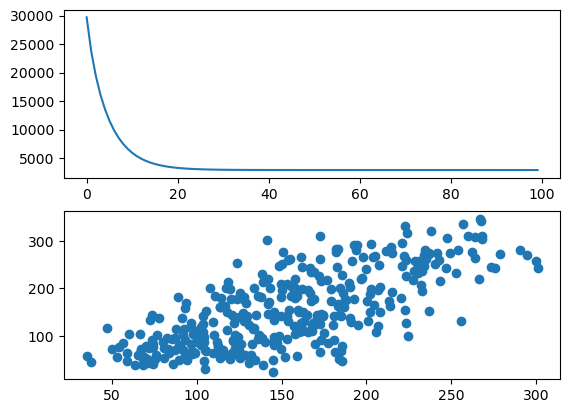

Minimum cost: 2894.800048828125


In [95]:
#### cost_lst = list()
model = LinearRegression(x_train.shape[1])
alpha = 0.1
cost_lst = []


for it in range(100):
    #print("x_train shape", x_train.shape)
    prediction = model(x_train)
    cost = mean_squared_error(y_train, prediction)
    #print("cost:", cost)
    cost_lst.append(cost)
    gradient_descent_step(model, x_train, y_train, prediction, alpha)
fig, axs = plt.subplots(2)
axs[0].plot(list(range(it+1)), cost_lst)
#print(y_train.shape, prediction.shape)
axs[1].scatter(prediction, y_train)
plt.show()
#print(model.weight)
print('Minimum cost: {}'.format(min(cost_lst)))

-------

<font color="maroon">**Q5.** What conclusion if any can be drawn from the weight values? How does gender and BMI affect blood sugar levels?

In [99]:
# Gender and BMI affect sugar levels Y. 
# We can simply analyse the model weights that the training has came up with, and find the importance of each weights that obtain the predictions.
model.weight
# From the readings, we can see that age, has the largest negative effect on the blood sugar level with value -11, whereas, BMI is the second largest positive weight affecting, compared to S6. 

Parameter containing:
tensor([[  1.9484, -11.4389,  26.3563,  16.5998,  -6.5293,  -4.8259,  -9.3081,
           7.5340,  20.7292,   2.6660, 153.7325]])

<font>What are the estimated blood sugar levels for the below examples? [2 marks] </font>

| AGE | SEX | BMI | BP  | S1  | S2    | S3 | S4  | S5     | S6  |
|-----|-----|-----|-----|-----|-------|----|-----|--------|-----|
| 25  | F   | 18  | 79  | 130 | 64.8  | 61 | 2   | 4.1897 | 68  |
| 50  | M   | 28  | 103 | 229 | 162.2 | 60 | 4.5 | 6.107  | 124 |

In [61]:
### your code here
sample = torch.tensor([[25, 2, 18, 79, 130, 64.8, 61, 2, 4.1897, 68],
                      [50, 1, 28, 103, 229, 162.2, 60, 4.5, 6.107, 124]]).float()


mean_of_values = sample.mean(dim=0)
sigma_of_values = sample.std(dim=0)

sample = norm_set(sample, mean_of_values, sigma_of_values)

sample = torch.cat([sample, torch.ones(sample.shape[0], 1)], dim=1)


print("sample shape", sample.shape)
prediction = model(sample)


print(f"Prediction of sample: {prediction}")

sample shape torch.Size([2, 11])
Prediction of sample: tensor([[ 93.4689],
        [213.9960]])


Now estimate the error on the test set. Is the error on the test set comparable to that of the train set? What can be said about the fit of the model? When does a model over/under fits?


We can say the model is fitting well, and not over or under fitting, this is due to it the error being just below the train data.

If it were underfitting the test cost would be considerably higher, compared to the train cost.

If it were underfitting, the train cost would be closer to 0 and the test cost would be considerable higher, even through it is closer to 0.

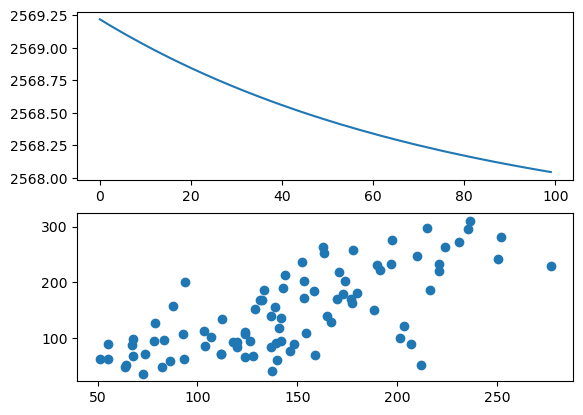

Minimum cost: 2568.04345703125


In [65]:
### your code here
cost_lst = []


for it in range(100):
    #print("x_train shape", x_train.shape)
    prediction = model(x_test)
    cost = mean_squared_error(y_test, prediction)
    #print("cost:", cost)
    cost_lst.append(cost)
    gradient_descent_step(model, x_test, y_test, prediction, alpha)
fig, axs = plt.subplots(2)
axs[0].plot(list(range(it+1)), cost_lst)
#print(y_train.shape, prediction.shape)
axs[1].scatter(prediction, y_test)
plt.show()
#print(model.weight)
print('Minimum cost: {}'.format(min(cost_lst)))

<font color="maroon">**Q6.** Try the code with a number of learning rates that differ by orders of magnitude and record the error of the training and test sets. What do you observe on the training error? What about the error on the test set? [3 marks]</font>


Based on results found, on the training and test data at different learning rates, we obtain different costs, however generally speaking with the epochs constant, we can view a better (lower) cost overall when using lower magnitudes of learning rate (alpha). Possible as we are not jumping around the minimum and actually reaching the closer to the minimum in smaller steps rather than jumping around.

In [72]:
### Question 6

def run_epochs(learning_rate, x, y):
    cost_lst = []
    for it in range(100):
        #print("x_train shape", x_train.shape)
        prediction = model(x)
        cost = mean_squared_error(y, prediction)
        #print("cost:", cost)
        cost_lst.append(cost)
        gradient_descent_step(model, x, y, prediction, alpha)
    return min(cost_lst)


# Testing x_train data on different learning rates, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001 
learning_rates = [10**-x for x in range(0, 10)]

_ = [print(f"100 Epochs | Min Cost: {run_epochs(lr, x_train, y_train)} | LR: {lr} | Training Data ") for lr in learning_rates]
print("-"*20)
_ = [print(f"100 Epochs | Min Cost: {run_epochs(lr, x_test, y_test)} | LR: {lr} | Test Data ") for lr in learning_rates]

100 Epochs | Min Cost: 2886.81689453125 | LR: 1 | Training Data 
100 Epochs | Min Cost: 2878.946533203125 | LR: 0.1 | Training Data 
100 Epochs | Min Cost: 2876.142333984375 | LR: 0.01 | Training Data 
100 Epochs | Min Cost: 2874.633056640625 | LR: 0.001 | Training Data 
100 Epochs | Min Cost: 2873.55810546875 | LR: 0.0001 | Training Data 
100 Epochs | Min Cost: 2872.70458984375 | LR: 1e-05 | Training Data 
100 Epochs | Min Cost: 2872.0029296875 | LR: 1e-06 | Training Data 
100 Epochs | Min Cost: 2871.42138671875 | LR: 1e-07 | Training Data 
100 Epochs | Min Cost: 2870.9384765625 | LR: 1e-08 | Training Data 
100 Epochs | Min Cost: 2870.536376953125 | LR: 1e-09 | Training Data 
--------------------
100 Epochs | Min Cost: 2587.477294921875 | LR: 1 | Test Data 
100 Epochs | Min Cost: 2580.051513671875 | LR: 0.1 | Test Data 
100 Epochs | Min Cost: 2577.6865234375 | LR: 0.01 | Test Data 
100 Epochs | Min Cost: 2576.5458984375 | LR: 0.001 | Test Data 
100 Epochs | Min Cost: 2575.7333984375 |

# 1.2 Regularized Linear Regression
In this exercise, we will be trying to create a model that fits data that is clearly not linear. We will be attempting to fit the data points seen in the graph below:

torch.Size([7]) torch.Size([7, 1])


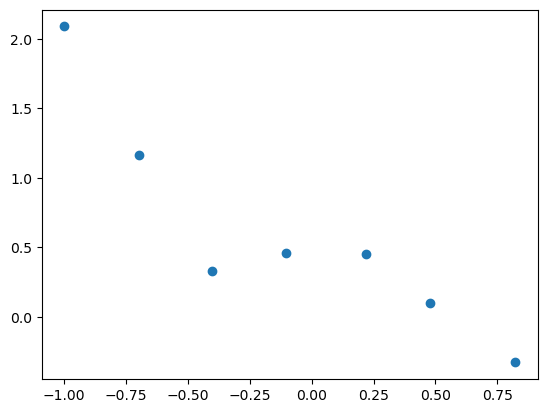

In [152]:
x = torch.tensor([-0.99768, -0.69574, -0.40373, -0.10236, 0.22024, 0.47742, 0.82229])
y = torch.tensor([2.0885, 1.1646, 0.3287, 0.46013, 0.44808, 0.10013, -0.32952]).reshape(-1, 1)  # 7, 1
print(x.shape, y.shape)
plt.scatter(x, y)
plt.show()

In order to fit this data we will create a new hypothesis function, which uses a fifth-order polynomial:

$
 h_{\theta}(x) = \theta_{0} x_{0} + \theta_{1} x_{1} + \theta_{2} x_{1} ^2 + \theta_{3} x_{1} ^3 + \theta_{4} x_{1} ^4 + \theta_{5} x_{1} ^5
$

As we are fitting a small number of points with a high order model, there is a danger of overfitting.  \\

To attempt to avoid this we will use regularization. Our cost function becomes:

$
 J(\theta) = \frac{1}{2m}  \left[ \sum_{i=1}^m ( h_{\theta}(x^{(i)}) - y^{(i)})^2 + \lambda    \sum_{j=1}^n \theta_{j}^2 \right]
$

Adjust variable `x` to include the higher order polynomials

In [130]:
### your code here

# Defining model hyperparameters
learning_rate = 0.01
weight_decay  = 0.001



x_0 = 1  # Made bais part of phi (x) generation.
def phi_mat(x_mat): return torch.tensor([[x_0, x, x**2, x**3, x**4, x**5] for x in list(x_mat)])
### hint: remember to add x_0 for the bias

x3 = phi_mat(x)


# 7, 6, sample x features.

# Now with weights, 
# We need 6 weights. 
# model = LinearRegression(X.shape[1])
# prediction = model(X)
# print(prediction, prediction.shape)  # 7, 1

# # Time to understand loss and backpropagate, with the addition of 
# cost = mean_squared_error(y, prediction)
# print("Cost", cost)


**Q7.** Update the cost and gradient descent methods to use the regularised cost, as shown above. [4 marks]

Note that the punishment for having more terms is not applied to the bias. This means that we use a different update technique for the partial derivative of $\theta_{0}$, and add the regularization to all of the others:



$
 \theta_{j} =  \theta_{j} - \alpha \frac{1}{m} \sum_{i=1}^m ( h_{\theta}(x^{(i)}) - y^{(i)})x^{(i)}_{j} , j=0
$



$
 \theta_{j} =  \theta_{j} (1 - \alpha \frac{\lambda}{m}) -
 \alpha \frac{1}{m} \sum_{i=1}^m ( h_{\theta}(x^{(i)}) - y^{(i)})x^{(i)}_{j} , j>0
$

In [192]:
def mean_squared_error(y_true: torch.Tensor, y_pred: torch.Tensor, lam: float, theta: torch.tensor) -> torch.Tensor:
    """ Important we get the error function correct for this, or the backpropogation will not work, theta is weights in the examples below, we are not going to use matrix shortcuts instead do it manually with loops.."""
    
    # we are not going to use any torch function or matrix multiplication instead v simple.
    m = y_true.shape[0]  # 7 samples
    sum_m = 0
    
    # y_pred = phi(x) [m,d] dot W.T [d,1] which gives shape, [m,1]
    for i in range(m):
        sum_m += ((y_true[i] - y_pred[i]) **2)
    
    # E(w) = sum_m + lambda * W.T*W
    decay = lam * (torch.mm(theta, theta.T))
                   
    cost = sum_m + decay
    # print("cost:", cost.item())
    return 1/m * cost.item()


def gradient_descent_step(model: nn.Module, X: torch.Tensor, y: torch.Tensor, y_pred: torch.Tensor, lr: float, lam: float) -> None:
    weight = model.weight
    N = X.shape[0]
    ### your code here
    y_val = y_pred - y  # s,1
    # print(X.shape, "x shape")  # s, d
    lamdba_weights = lam * weight
    # print(lamdba_weights.shape, "lambda weights")
    lamdba_weights[0][0] = 0  # First weight is always 0, due to rules for w k>0.
    # print(lamdba_weights.shape, "lambda weights", lamdba_weights)
    grad_eq = torch.mm(y_val.T, X) + lamdba_weights
        


    weight = weight - lr * (1/N) * grad_eq
    ###
    model.weight = nn.Parameter(weight, requires_grad=False)

<font color="maroon"> **Q8.** First of all, find the best value of alpha to use in order to optimize best.
Next, experiment with different values of $\lambda$ and see how this affects the shape of the hypothesis. [3 marks]</font>

torch.Size([7, 6]) x3 shape


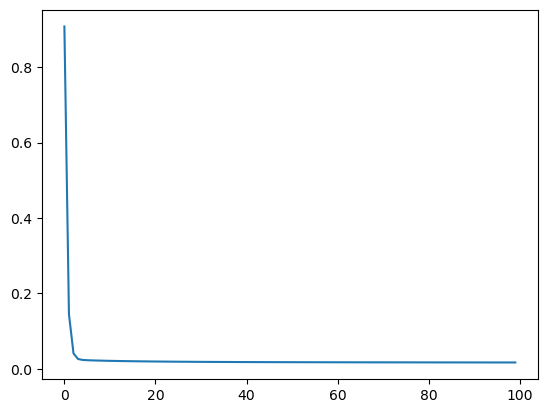

Parameter containing:
tensor([[ 0.3817, -0.2919,  0.0907, -0.7664,  0.1417, -0.4623]])
Minimum cost: 0.01652375715119498


In [193]:
cost_lst = list()
model = LinearRegression(x3.shape[1])
alpha = 1 # select an appropriate alpha
lam = 0 # select an appropriate lambda
print(x3.shape, "x3 shape")
for it in range(100):
    prediction = model(x3)
    cost = mean_squared_error(y, prediction, lam, model.weight)
    if not cost:
        print(cost, "cost is none")
    cost_lst.append(cost)
    gradient_descent_step(model, x3, y, prediction, alpha, lam)
#display.clear_output(wait=True)
plt.plot(list(range(it+1)), cost_lst)
plt.show()
print(model.weight)
print('Minimum cost: {}'.format(min(cost_lst)))


tensor([[ 2.1216],
        [ 0.9953],
        [ 0.5735],
        [ 0.4133],
        [ 0.3137],
        [ 0.1754],
        [-0.3322]])


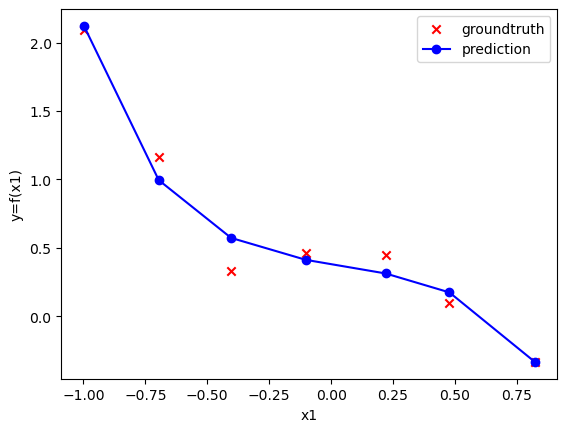

In [196]:
plt.scatter(x[:], y, c='red', marker='x', label='groundtruth')
outputs = model(x3)
print(outputs)
plt.plot(x[:], outputs, c='blue', marker='o', label='prediction')
plt.xlabel('x1')
plt.ylabel('y=f(x1)')
plt.legend()
plt.show()

Testing Linear Test
Minimum cost: 0.12577622277396064
Testing model with LR 1 and weight decay: 1
tensor([[ 1.8501],
        [ 0.9832],
        [ 0.6230],
        [ 0.4425],
        [ 0.3072],
        [ 0.1837],
        [-0.1292]])


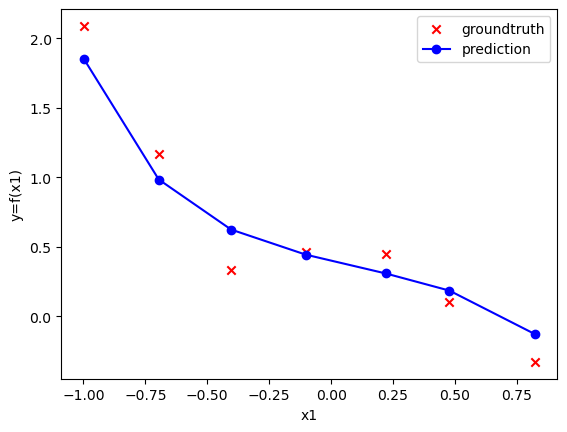

Minimum cost: 0.03079962730407715
Testing model with LR 1 and weight decay: 0.1
tensor([[ 2.0825],
        [ 1.0072],
        [ 0.5938],
        [ 0.4181],
        [ 0.2966],
        [ 0.1565],
        [-0.2941]])


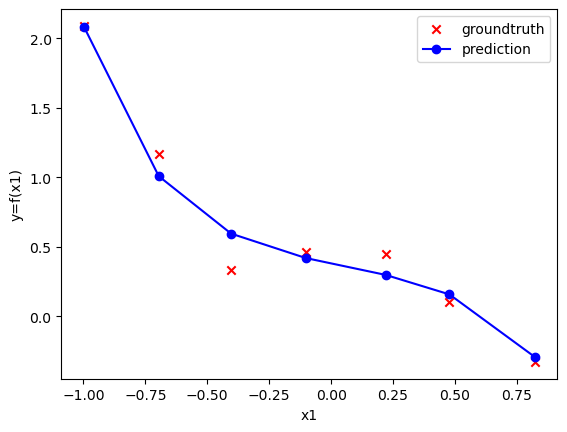

Minimum cost: 0.01810305459158761
Testing model with LR 1 and weight decay: 0.01
tensor([[ 2.1173],
        [ 0.9970],
        [ 0.5762],
        [ 0.4140],
        [ 0.3112],
        [ 0.1726],
        [-0.3277]])


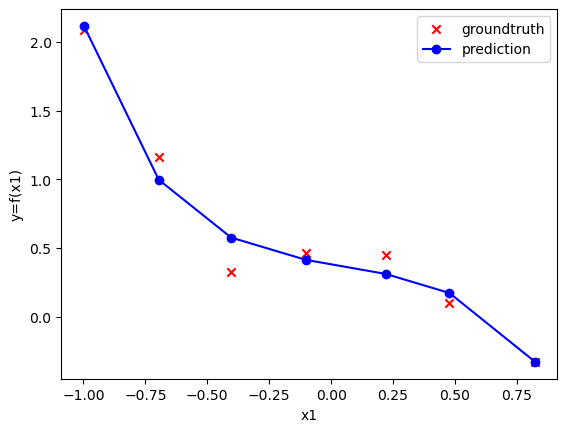

Minimum cost: 0.01668403297662735
Testing model with LR 1 and weight decay: 0.001
tensor([[ 2.1211],
        [ 0.9955],
        [ 0.5737],
        [ 0.4134],
        [ 0.3134],
        [ 0.1751],
        [-0.3318]])


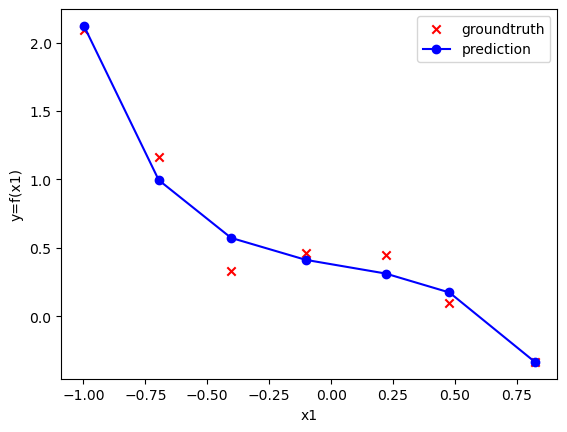

Minimum cost: 0.0165398046374321
Testing model with LR 1 and weight decay: 0.0001
tensor([[ 2.1215],
        [ 0.9953],
        [ 0.5735],
        [ 0.4133],
        [ 0.3136],
        [ 0.1754],
        [-0.3322]])


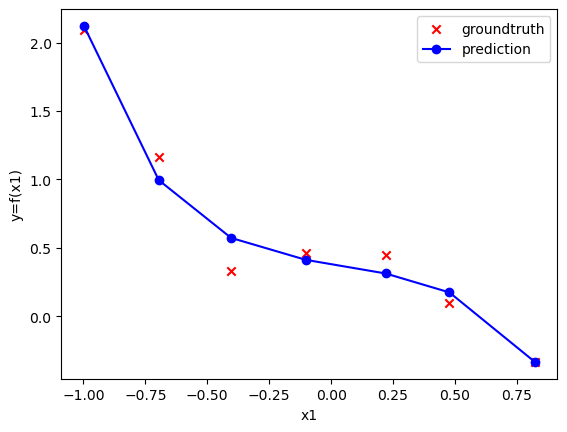

Minimum cost: 0.01652536541223526
Testing model with LR 1 and weight decay: 1e-05
tensor([[ 2.1216],
        [ 0.9953],
        [ 0.5735],
        [ 0.4133],
        [ 0.3137],
        [ 0.1754],
        [-0.3322]])


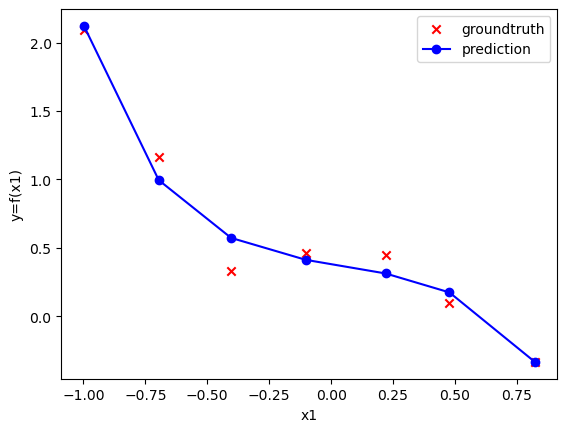

Minimum cost: 0.016523926385811395
Testing model with LR 1 and weight decay: 1e-06
tensor([[ 2.1216],
        [ 0.9953],
        [ 0.5735],
        [ 0.4133],
        [ 0.3137],
        [ 0.1754],
        [-0.3322]])


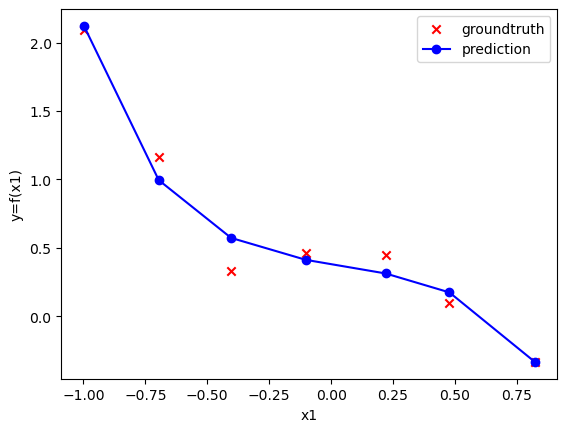

Minimum cost: 0.016523775245462145
Testing model with LR 1 and weight decay: 1e-07
tensor([[ 2.1216],
        [ 0.9953],
        [ 0.5735],
        [ 0.4133],
        [ 0.3137],
        [ 0.1754],
        [-0.3322]])


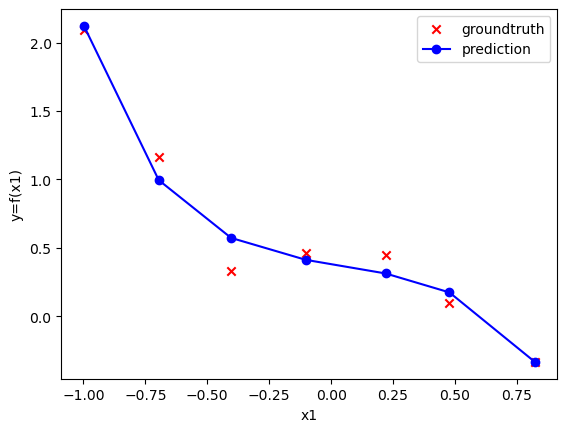

Minimum cost: 0.016523756086826324
Testing model with LR 1 and weight decay: 1e-08
tensor([[ 2.1216],
        [ 0.9953],
        [ 0.5735],
        [ 0.4133],
        [ 0.3137],
        [ 0.1754],
        [-0.3322]])


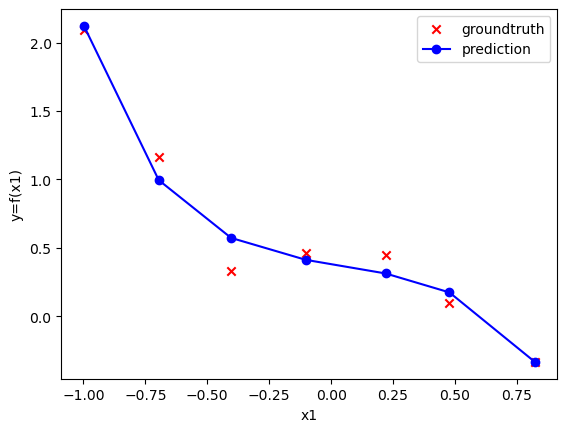

Minimum cost: 0.01652375715119498
Testing model with LR 1 and weight decay: 1e-09
tensor([[ 2.1216],
        [ 0.9953],
        [ 0.5735],
        [ 0.4133],
        [ 0.3137],
        [ 0.1754],
        [-0.3322]])


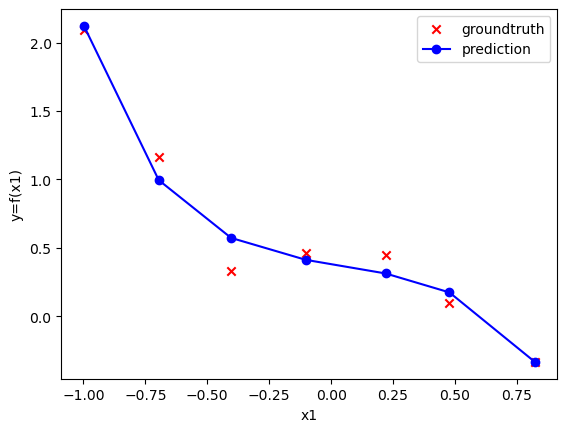

Minimum cost: 0.01652375715119498
Testing model with LR 1 and weight decay: 1e-10
tensor([[ 2.1216],
        [ 0.9953],
        [ 0.5735],
        [ 0.4133],
        [ 0.3137],
        [ 0.1754],
        [-0.3322]])


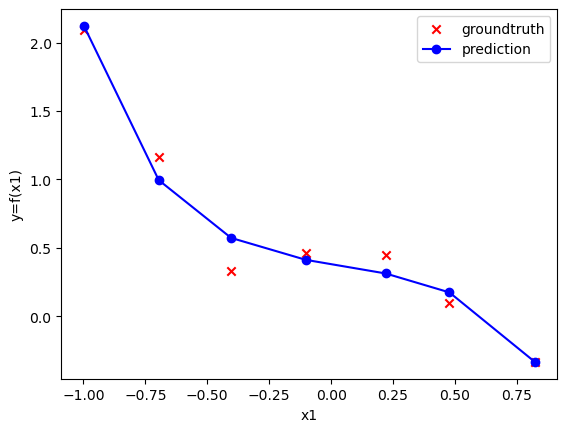

Minimum cost: 0.01652375715119498
Testing model with LR 1 and weight decay: 1e-11
tensor([[ 2.1216],
        [ 0.9953],
        [ 0.5735],
        [ 0.4133],
        [ 0.3137],
        [ 0.1754],
        [-0.3322]])


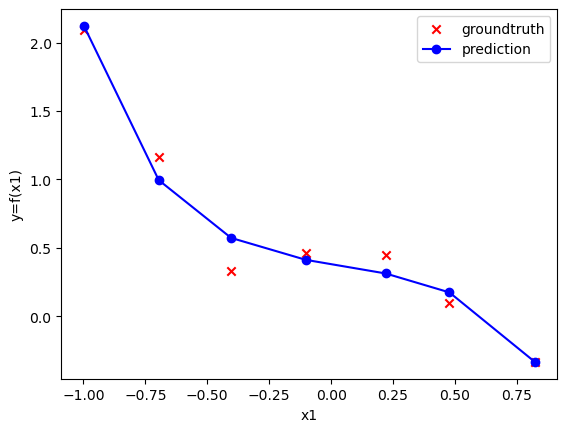

Minimum cost: 0.01652375715119498
Testing model with LR 1 and weight decay: 1e-12
tensor([[ 2.1216],
        [ 0.9953],
        [ 0.5735],
        [ 0.4133],
        [ 0.3137],
        [ 0.1754],
        [-0.3322]])


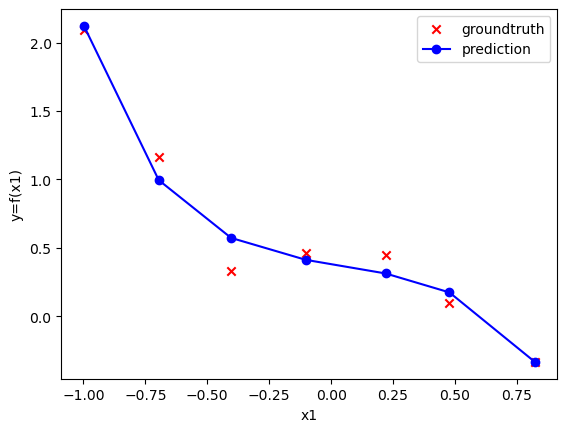

Minimum cost: 0.01652375715119498
Testing model with LR 1 and weight decay: 1e-13
tensor([[ 2.1216],
        [ 0.9953],
        [ 0.5735],
        [ 0.4133],
        [ 0.3137],
        [ 0.1754],
        [-0.3322]])


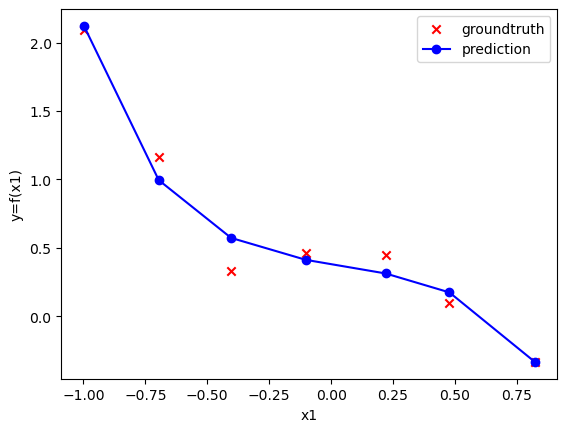

Minimum cost: 0.01652375715119498
Testing model with LR 1 and weight decay: 1e-14
tensor([[ 2.1216],
        [ 0.9953],
        [ 0.5735],
        [ 0.4133],
        [ 0.3137],
        [ 0.1754],
        [-0.3322]])


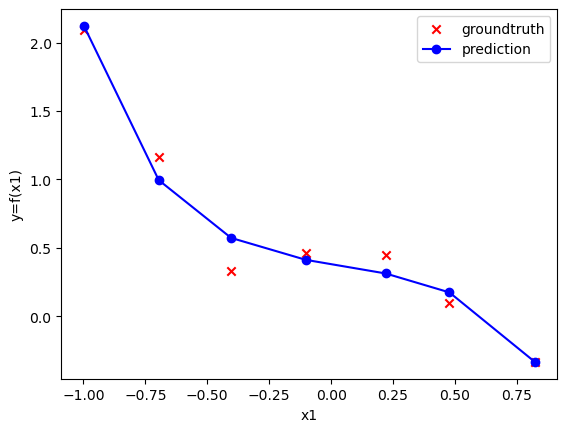

Minimum cost: 0.12719497510365077
Testing model with LR 0.1 and weight decay: 1
tensor([[ 1.8511],
        [ 0.9854],
        [ 0.6210],
        [ 0.4361],
        [ 0.2992],
        [ 0.1781],
        [-0.1209]])


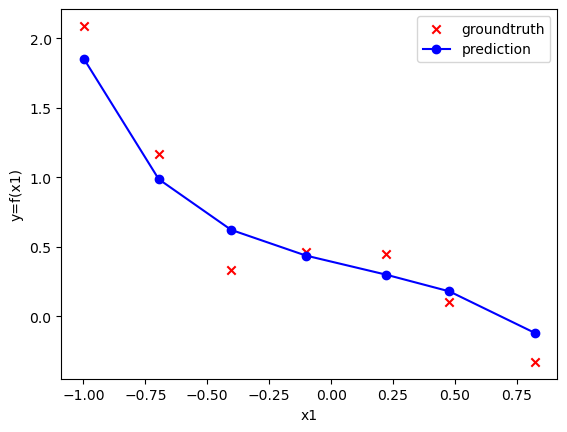

Minimum cost: 0.032727599143981934
Testing model with LR 0.1 and weight decay: 0.1
tensor([[ 2.0698],
        [ 1.0441],
        [ 0.6156],
        [ 0.4023],
        [ 0.2475],
        [ 0.1095],
        [-0.2436]])


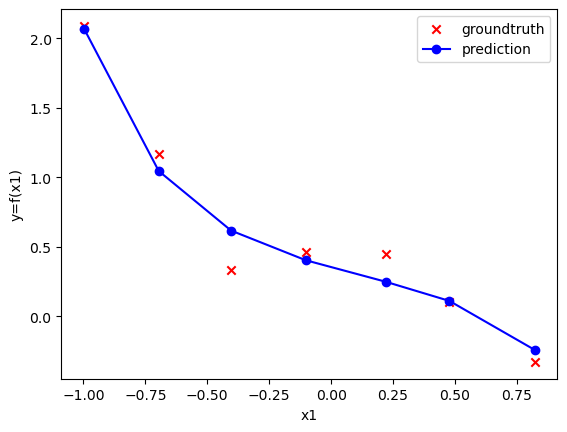

Minimum cost: 0.022136100700923374
Testing model with LR 0.1 and weight decay: 0.01
tensor([[ 2.0961],
        [ 1.0509],
        [ 0.6147],
        [ 0.3980],
        [ 0.2414],
        [ 0.1015],
        [-0.2578]])


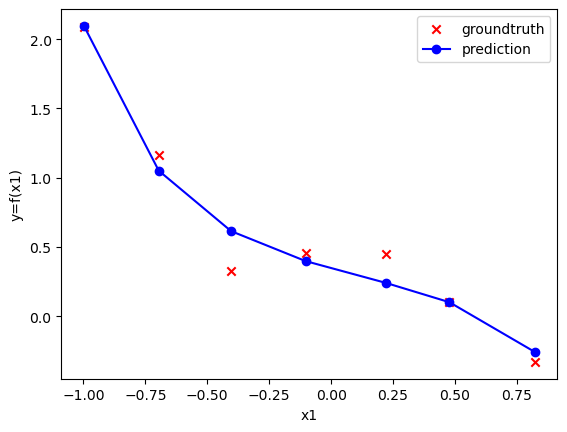

Minimum cost: 0.02106335972036634
Testing model with LR 0.1 and weight decay: 0.001
tensor([[ 2.0988],
        [ 1.0516],
        [ 0.6146],
        [ 0.3976],
        [ 0.2407],
        [ 0.1007],
        [-0.2593]])


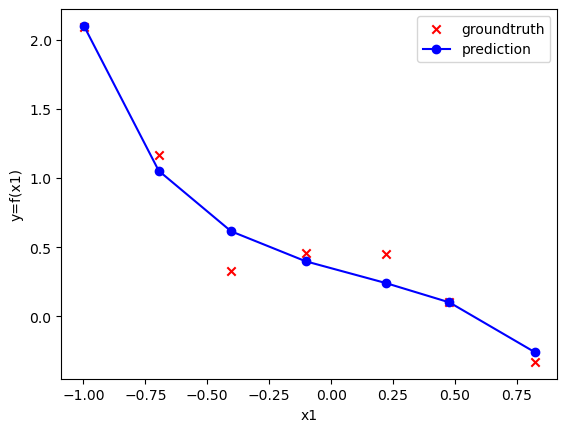

Minimum cost: 0.02095594150679452
Testing model with LR 0.1 and weight decay: 0.0001
tensor([[ 2.0991],
        [ 1.0517],
        [ 0.6146],
        [ 0.3976],
        [ 0.2407],
        [ 0.1006],
        [-0.2594]])


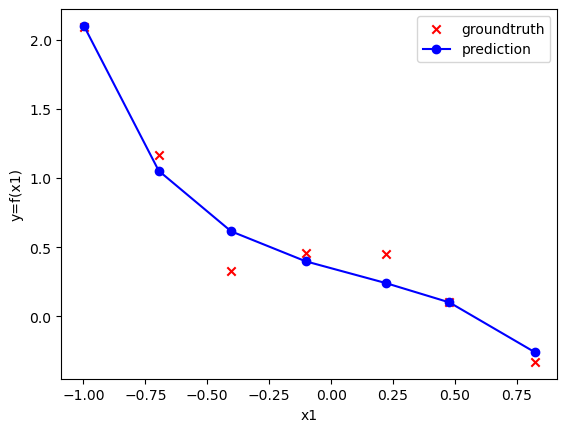

Minimum cost: 0.020945197769573754
Testing model with LR 0.1 and weight decay: 1e-05
tensor([[ 2.0991],
        [ 1.0517],
        [ 0.6146],
        [ 0.3976],
        [ 0.2407],
        [ 0.1006],
        [-0.2595]])


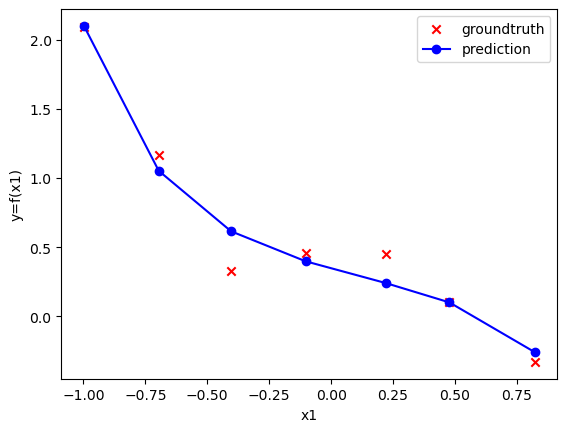

Minimum cost: 0.020944127014705112
Testing model with LR 0.1 and weight decay: 1e-06
tensor([[ 2.0991],
        [ 1.0517],
        [ 0.6146],
        [ 0.3975],
        [ 0.2407],
        [ 0.1006],
        [-0.2595]])


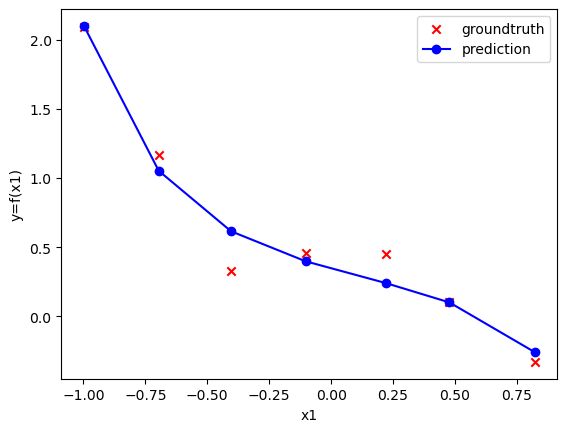

Minimum cost: 0.020944016320364814
Testing model with LR 0.1 and weight decay: 1e-07
tensor([[ 2.0991],
        [ 1.0517],
        [ 0.6146],
        [ 0.3975],
        [ 0.2407],
        [ 0.1006],
        [-0.2595]])


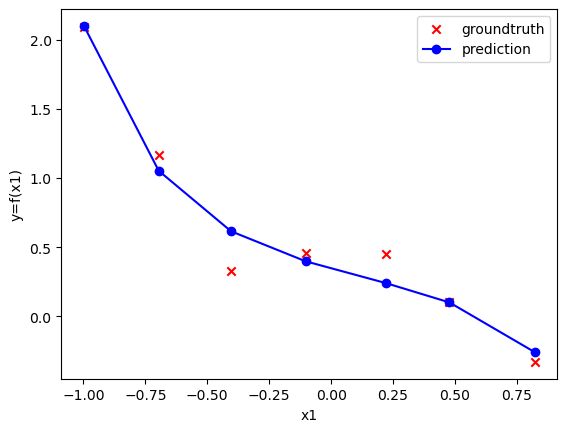

Minimum cost: 0.020944009934152876
Testing model with LR 0.1 and weight decay: 1e-08
tensor([[ 2.0991],
        [ 1.0517],
        [ 0.6146],
        [ 0.3975],
        [ 0.2407],
        [ 0.1006],
        [-0.2595]])


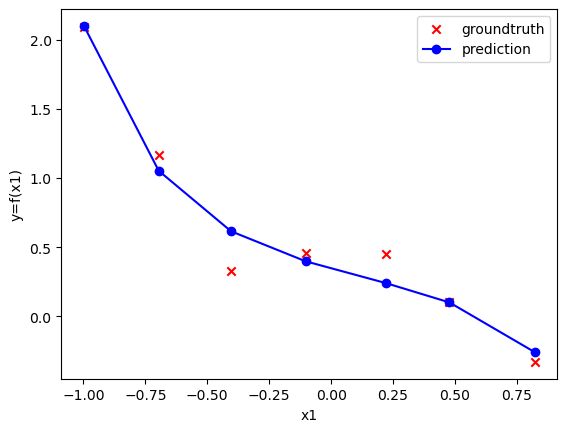

Minimum cost: 0.020944012062890188
Testing model with LR 0.1 and weight decay: 1e-09
tensor([[ 2.0991],
        [ 1.0517],
        [ 0.6146],
        [ 0.3975],
        [ 0.2407],
        [ 0.1006],
        [-0.2595]])


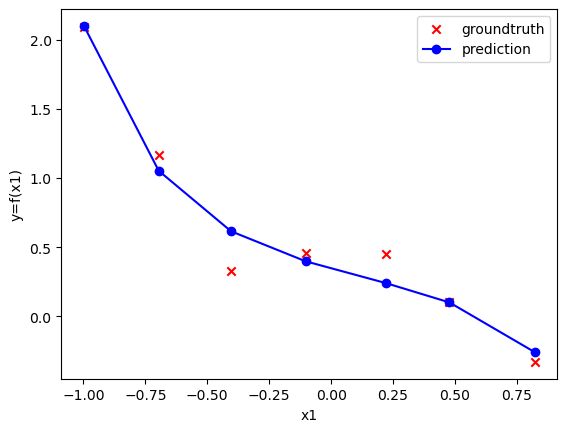

Minimum cost: 0.020944012062890188
Testing model with LR 0.1 and weight decay: 1e-10
tensor([[ 2.0991],
        [ 1.0517],
        [ 0.6146],
        [ 0.3975],
        [ 0.2407],
        [ 0.1006],
        [-0.2595]])


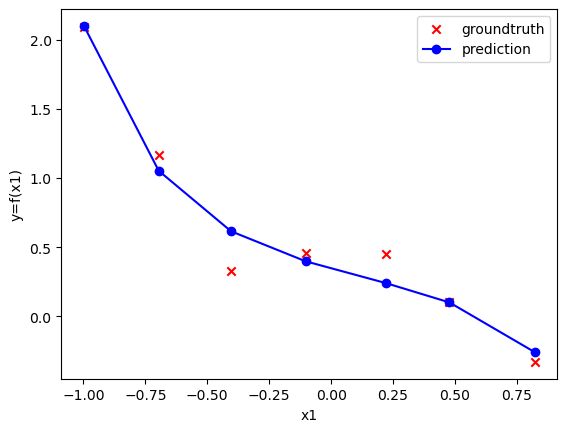

Minimum cost: 0.020944012062890188
Testing model with LR 0.1 and weight decay: 1e-11
tensor([[ 2.0991],
        [ 1.0517],
        [ 0.6146],
        [ 0.3975],
        [ 0.2407],
        [ 0.1006],
        [-0.2595]])


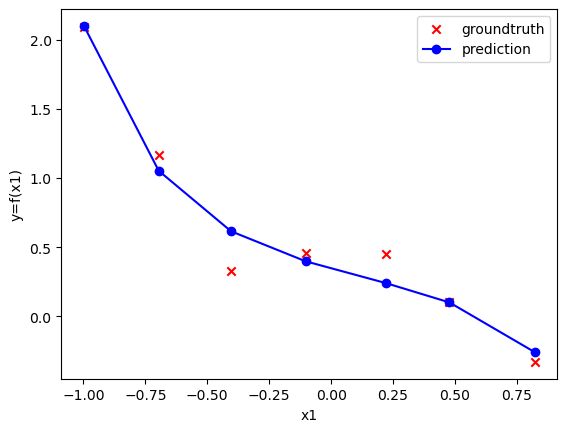

Minimum cost: 0.020944012062890188
Testing model with LR 0.1 and weight decay: 1e-12
tensor([[ 2.0991],
        [ 1.0517],
        [ 0.6146],
        [ 0.3975],
        [ 0.2407],
        [ 0.1006],
        [-0.2595]])


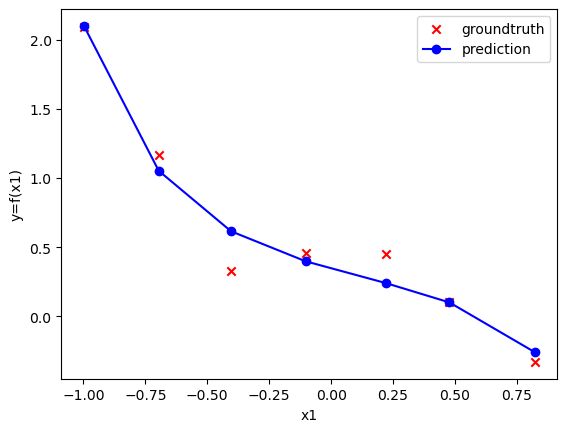

Minimum cost: 0.020944012062890188
Testing model with LR 0.1 and weight decay: 1e-13
tensor([[ 2.0991],
        [ 1.0517],
        [ 0.6146],
        [ 0.3975],
        [ 0.2407],
        [ 0.1006],
        [-0.2595]])


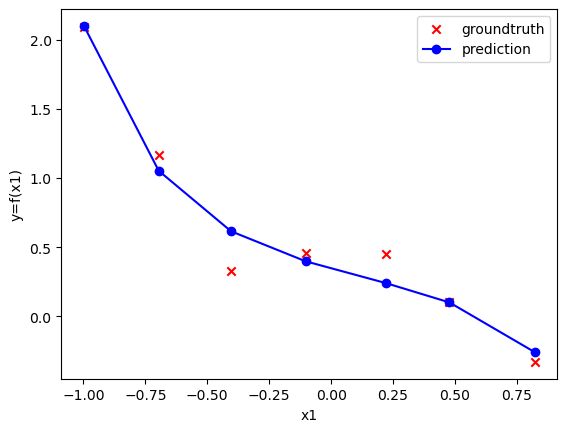

Minimum cost: 0.020944012062890188
Testing model with LR 0.1 and weight decay: 1e-14
tensor([[ 2.0991],
        [ 1.0517],
        [ 0.6146],
        [ 0.3975],
        [ 0.2407],
        [ 0.1006],
        [-0.2595]])


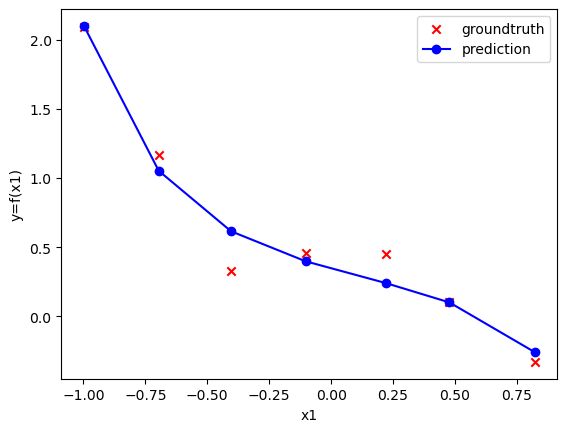

Minimum cost: 0.1873758690697806
Testing model with LR 0.01 and weight decay: 1
tensor([[1.3477],
        [0.7334],
        [0.4691],
        [0.3376],
        [0.2533],
        [0.1957],
        [0.0754]])


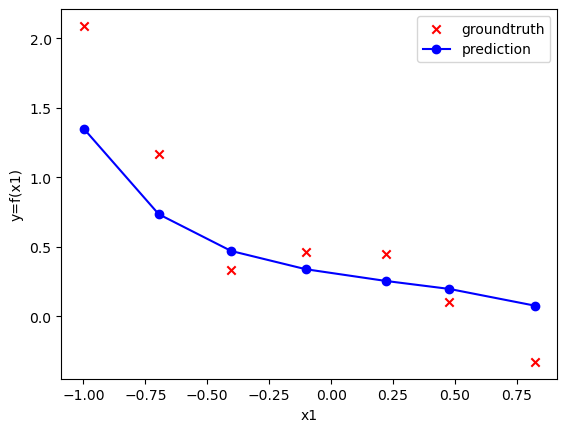

Minimum cost: 0.1312885284423828
Testing model with LR 0.01 and weight decay: 0.1
tensor([[1.4050],
        [0.7549],
        [0.4751],
        [0.3361],
        [0.2471],
        [0.1864],
        [0.0600]])


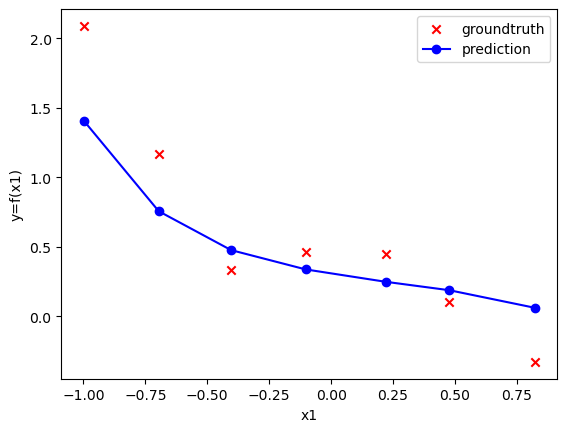

Minimum cost: 0.12533017567225865
Testing model with LR 0.01 and weight decay: 0.01
tensor([[1.4110],
        [0.7571],
        [0.4758],
        [0.3359],
        [0.2464],
        [0.1855],
        [0.0583]])


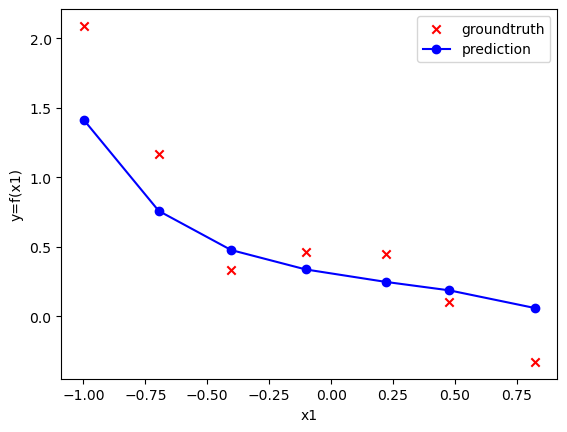

Minimum cost: 0.12473057849066597
Testing model with LR 0.01 and weight decay: 0.001
tensor([[1.4116],
        [0.7573],
        [0.4758],
        [0.3359],
        [0.2464],
        [0.1854],
        [0.0582]])


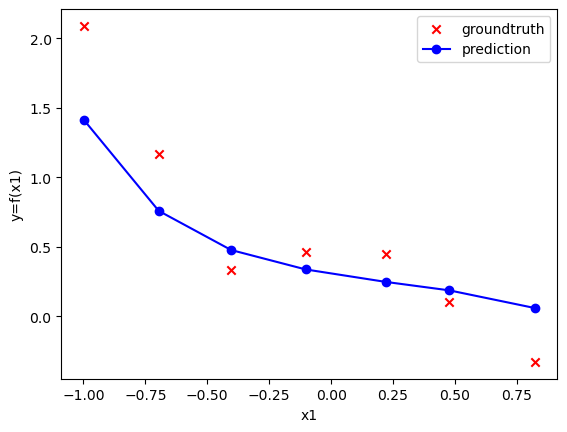

Minimum cost: 0.12467056512832642
Testing model with LR 0.01 and weight decay: 0.0001
tensor([[1.4117],
        [0.7574],
        [0.4758],
        [0.3359],
        [0.2464],
        [0.1853],
        [0.0582]])


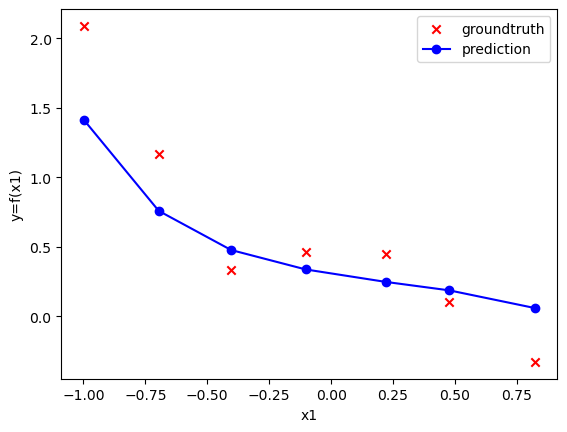

Minimum cost: 0.1246645620891026
Testing model with LR 0.01 and weight decay: 1e-05
tensor([[1.4117],
        [0.7574],
        [0.4758],
        [0.3359],
        [0.2464],
        [0.1853],
        [0.0582]])


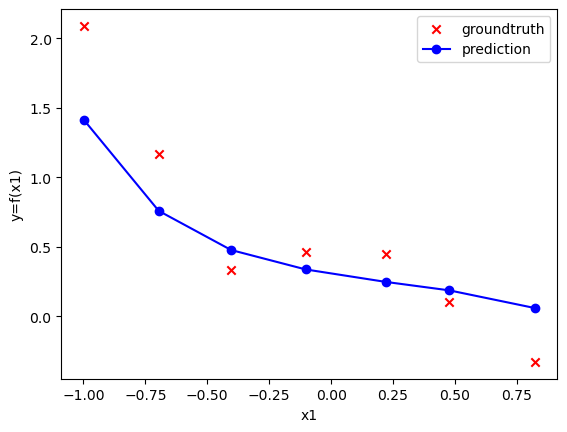

Minimum cost: 0.1246639745576041
Testing model with LR 0.01 and weight decay: 1e-06
tensor([[1.4117],
        [0.7574],
        [0.4758],
        [0.3359],
        [0.2464],
        [0.1853],
        [0.0582]])


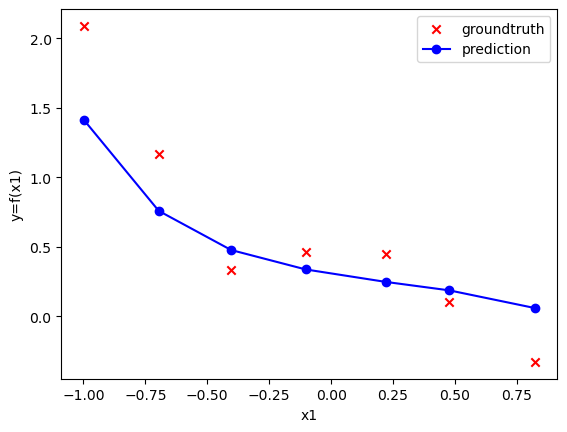

Minimum cost: 0.12466392346790858
Testing model with LR 0.01 and weight decay: 1e-07
tensor([[1.4117],
        [0.7574],
        [0.4758],
        [0.3359],
        [0.2464],
        [0.1853],
        [0.0582]])


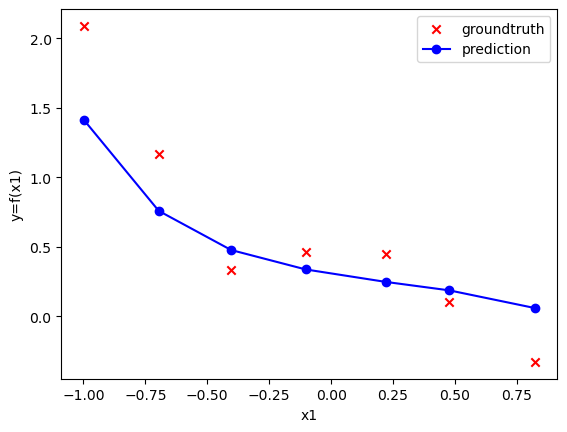

Minimum cost: 0.12466391495295932
Testing model with LR 0.01 and weight decay: 1e-08
tensor([[1.4117],
        [0.7574],
        [0.4758],
        [0.3359],
        [0.2464],
        [0.1853],
        [0.0582]])


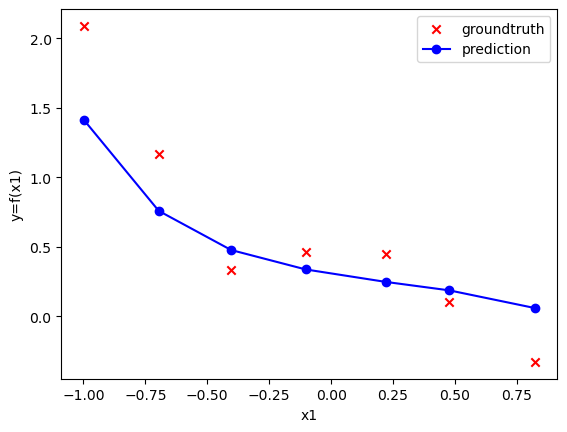

Minimum cost: 0.12466391495295932
Testing model with LR 0.01 and weight decay: 1e-09
tensor([[1.4117],
        [0.7574],
        [0.4758],
        [0.3359],
        [0.2464],
        [0.1853],
        [0.0582]])


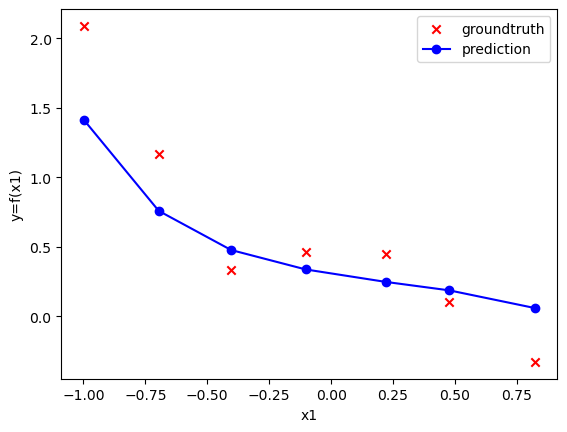

Minimum cost: 0.12466391495295932
Testing model with LR 0.01 and weight decay: 1e-10
tensor([[1.4117],
        [0.7574],
        [0.4758],
        [0.3359],
        [0.2464],
        [0.1853],
        [0.0582]])


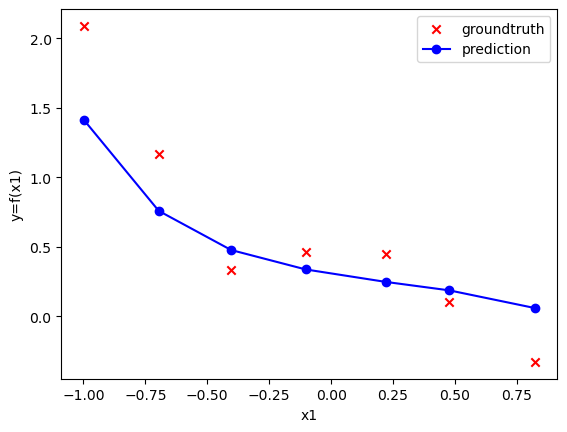

Minimum cost: 0.12466391495295932
Testing model with LR 0.01 and weight decay: 1e-11
tensor([[1.4117],
        [0.7574],
        [0.4758],
        [0.3359],
        [0.2464],
        [0.1853],
        [0.0582]])


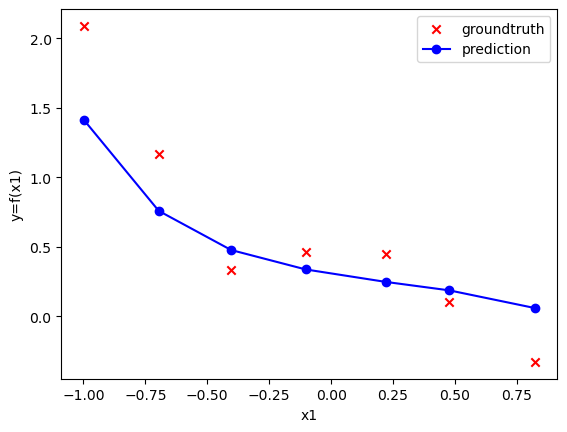

Minimum cost: 0.12466391495295932
Testing model with LR 0.01 and weight decay: 1e-12
tensor([[1.4117],
        [0.7574],
        [0.4758],
        [0.3359],
        [0.2464],
        [0.1853],
        [0.0582]])


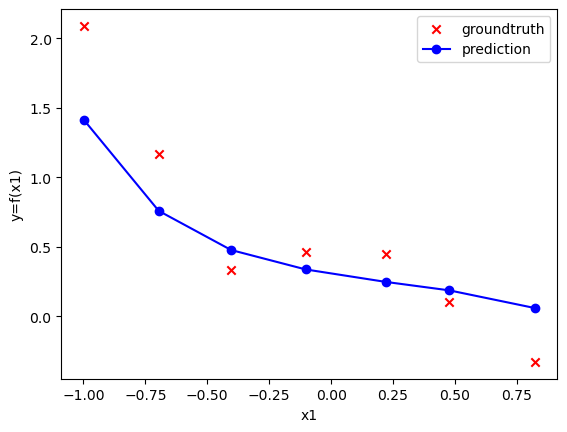

Minimum cost: 0.12466391495295932
Testing model with LR 0.01 and weight decay: 1e-13
tensor([[1.4117],
        [0.7574],
        [0.4758],
        [0.3359],
        [0.2464],
        [0.1853],
        [0.0582]])


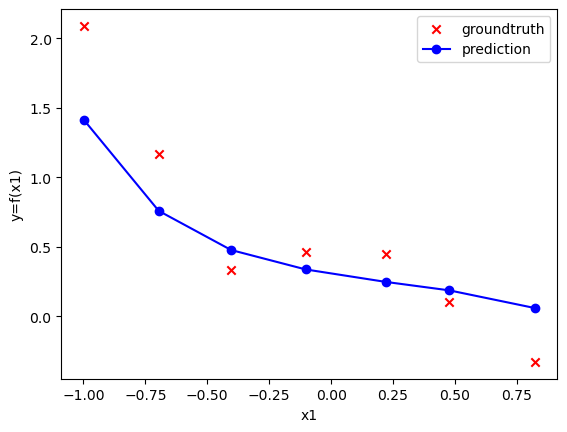

Minimum cost: 0.12466391495295932
Testing model with LR 0.01 and weight decay: 1e-14
tensor([[1.4117],
        [0.7574],
        [0.4758],
        [0.3359],
        [0.2464],
        [0.1853],
        [0.0582]])


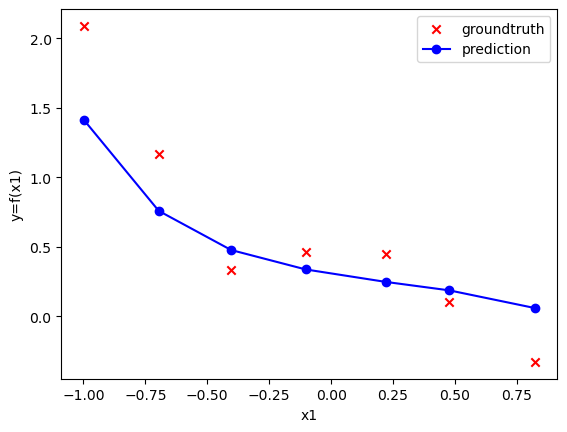

Minimum cost: 0.7234399659293038
Testing model with LR 0.001 and weight decay: 1
tensor([[0.2290],
        [0.1268],
        [0.0828],
        [0.0612],
        [0.0482],
        [0.0403],
        [0.0250]])


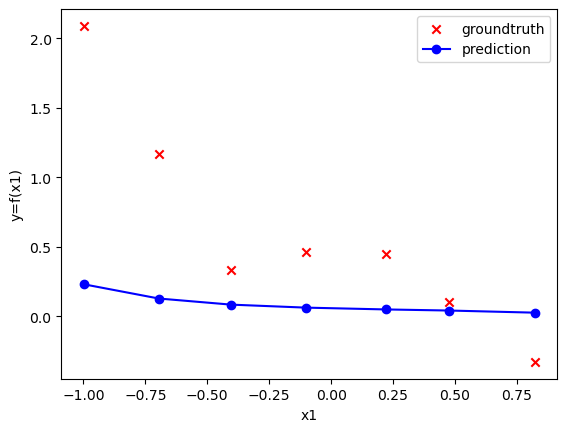

Minimum cost: 0.7215446063450404
Testing model with LR 0.001 and weight decay: 0.1
tensor([[0.2301],
        [0.1272],
        [0.0829],
        [0.0613],
        [0.0481],
        [0.0401],
        [0.0247]])


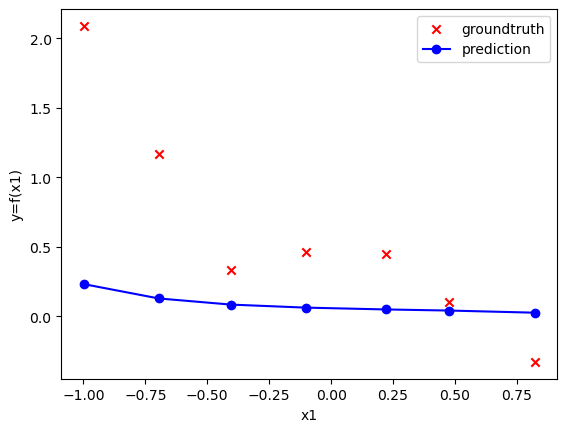

Minimum cost: 0.7213538714817591
Testing model with LR 0.001 and weight decay: 0.01
tensor([[0.2302],
        [0.1273],
        [0.0829],
        [0.0613],
        [0.0481],
        [0.0401],
        [0.0247]])


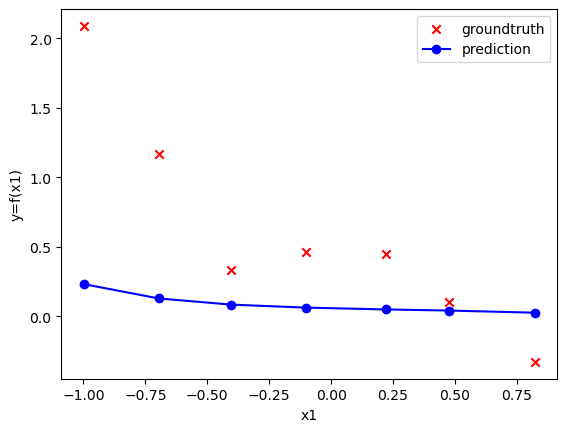

Minimum cost: 0.721334593636649
Testing model with LR 0.001 and weight decay: 0.001
tensor([[0.2302],
        [0.1273],
        [0.0829],
        [0.0613],
        [0.0481],
        [0.0401],
        [0.0247]])


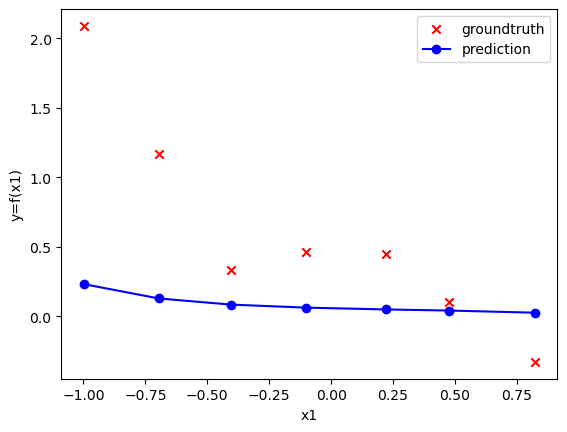

Minimum cost: 0.7213327544076101
Testing model with LR 0.001 and weight decay: 0.0001
tensor([[0.2302],
        [0.1273],
        [0.0829],
        [0.0613],
        [0.0481],
        [0.0401],
        [0.0247]])


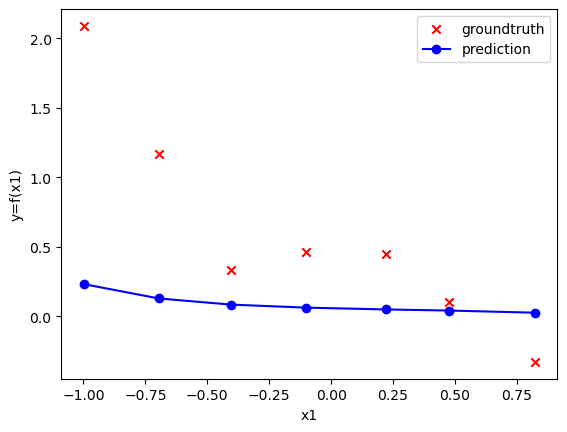

Minimum cost: 0.7213326181684221
Testing model with LR 0.001 and weight decay: 1e-05
tensor([[0.2302],
        [0.1273],
        [0.0829],
        [0.0613],
        [0.0481],
        [0.0401],
        [0.0247]])


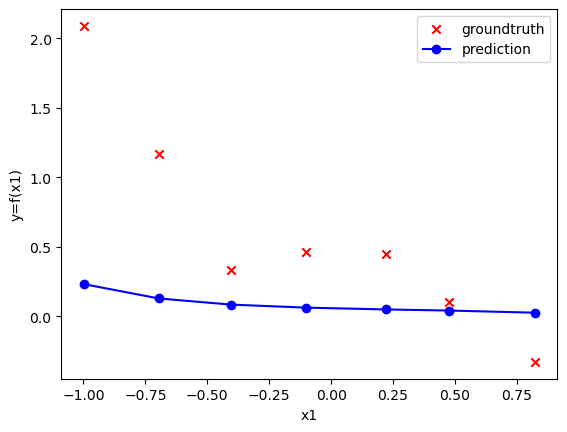

Minimum cost: 0.7213326181684221
Testing model with LR 0.001 and weight decay: 1e-06
tensor([[0.2302],
        [0.1273],
        [0.0829],
        [0.0613],
        [0.0481],
        [0.0401],
        [0.0247]])


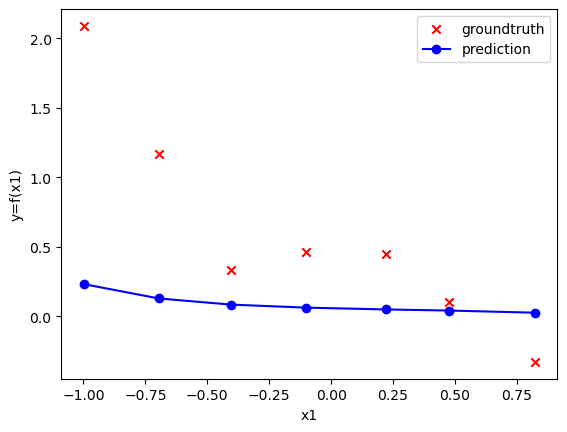

Minimum cost: 0.7213326181684221
Testing model with LR 0.001 and weight decay: 1e-07
tensor([[0.2302],
        [0.1273],
        [0.0829],
        [0.0613],
        [0.0481],
        [0.0401],
        [0.0247]])


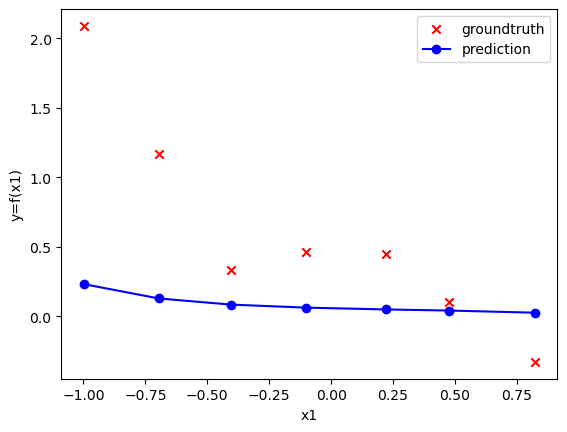

Minimum cost: 0.7213326181684221
Testing model with LR 0.001 and weight decay: 1e-08
tensor([[0.2302],
        [0.1273],
        [0.0829],
        [0.0613],
        [0.0481],
        [0.0401],
        [0.0247]])


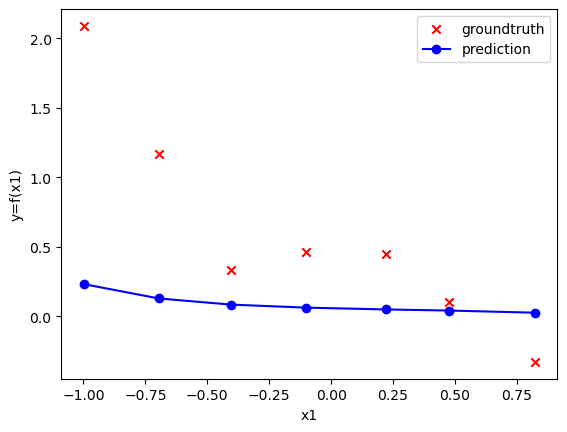

Minimum cost: 0.7213326181684221
Testing model with LR 0.001 and weight decay: 1e-09
tensor([[0.2302],
        [0.1273],
        [0.0829],
        [0.0613],
        [0.0481],
        [0.0401],
        [0.0247]])


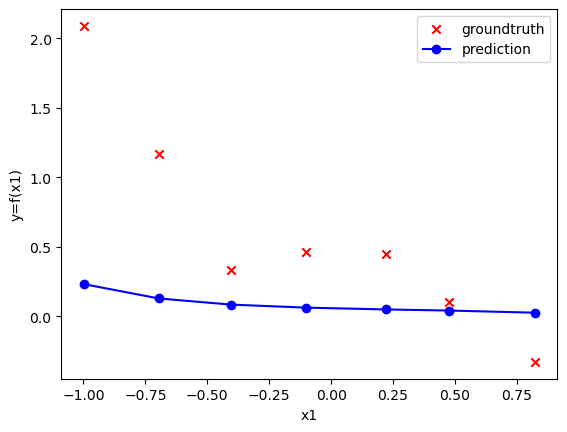

Minimum cost: 0.7213326181684221
Testing model with LR 0.001 and weight decay: 1e-10
tensor([[0.2302],
        [0.1273],
        [0.0829],
        [0.0613],
        [0.0481],
        [0.0401],
        [0.0247]])


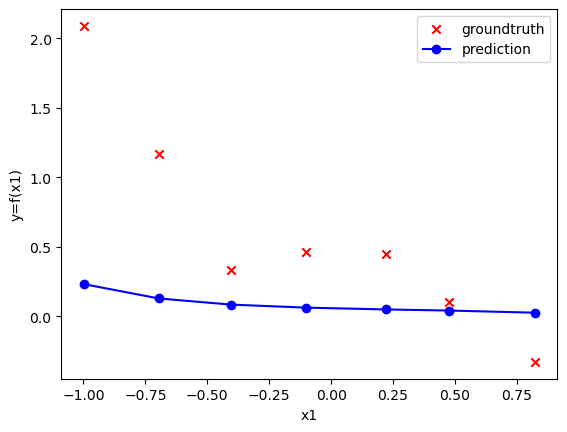

Minimum cost: 0.7213326181684221
Testing model with LR 0.001 and weight decay: 1e-11
tensor([[0.2302],
        [0.1273],
        [0.0829],
        [0.0613],
        [0.0481],
        [0.0401],
        [0.0247]])


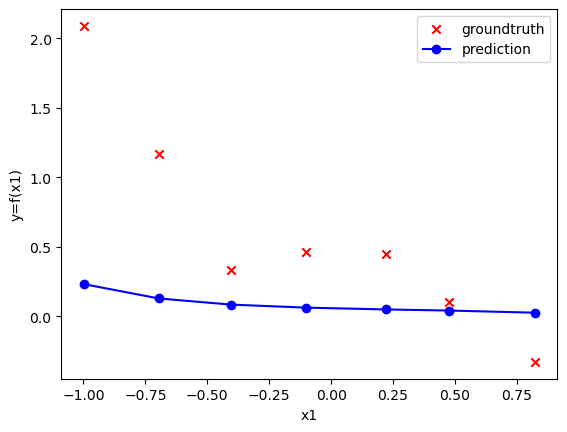

Minimum cost: 0.7213326181684221
Testing model with LR 0.001 and weight decay: 1e-12
tensor([[0.2302],
        [0.1273],
        [0.0829],
        [0.0613],
        [0.0481],
        [0.0401],
        [0.0247]])


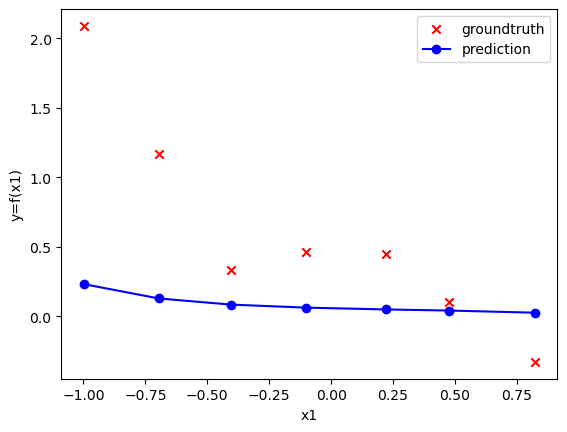

Minimum cost: 0.7213326181684221
Testing model with LR 0.001 and weight decay: 1e-13
tensor([[0.2302],
        [0.1273],
        [0.0829],
        [0.0613],
        [0.0481],
        [0.0401],
        [0.0247]])


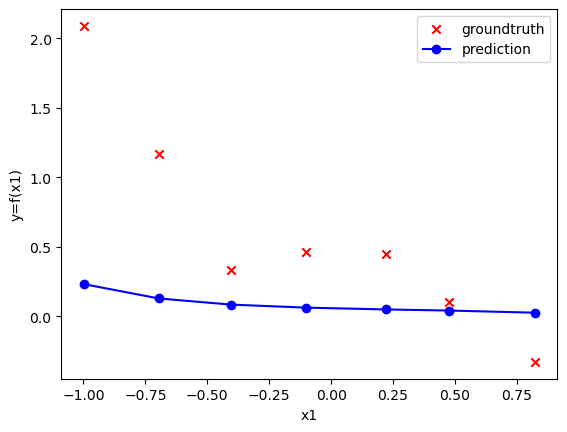

Minimum cost: 0.7213326181684221
Testing model with LR 0.001 and weight decay: 1e-14
tensor([[0.2302],
        [0.1273],
        [0.0829],
        [0.0613],
        [0.0481],
        [0.0401],
        [0.0247]])


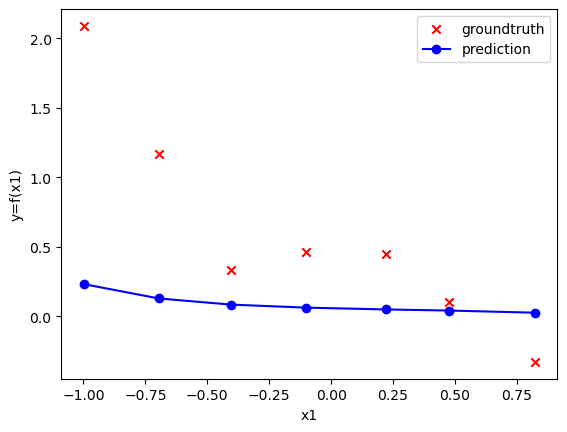

Minimum cost: 0.8873273985726492
Testing model with LR 0.0001 and weight decay: 1
tensor([[0.0243],
        [0.0135],
        [0.0088],
        [0.0065],
        [0.0052],
        [0.0044],
        [0.0028]])


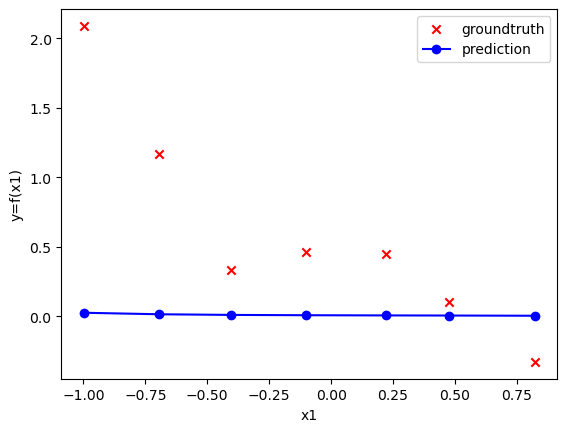

Minimum cost: 0.8873055321829659
Testing model with LR 0.0001 and weight decay: 0.1
tensor([[0.0243],
        [0.0135],
        [0.0088],
        [0.0065],
        [0.0052],
        [0.0044],
        [0.0028]])


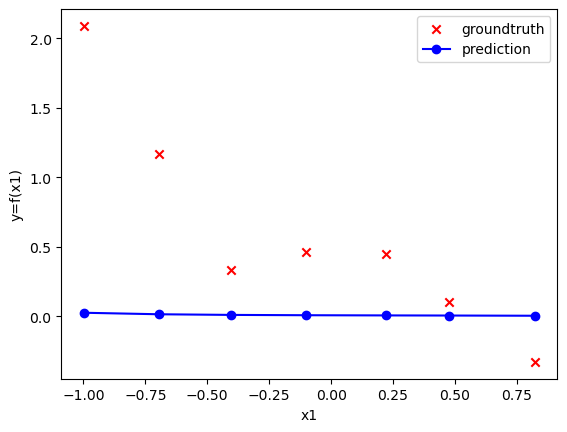

Minimum cost: 0.887303420475551
Testing model with LR 0.0001 and weight decay: 0.01
tensor([[0.0243],
        [0.0135],
        [0.0088],
        [0.0065],
        [0.0052],
        [0.0044],
        [0.0028]])


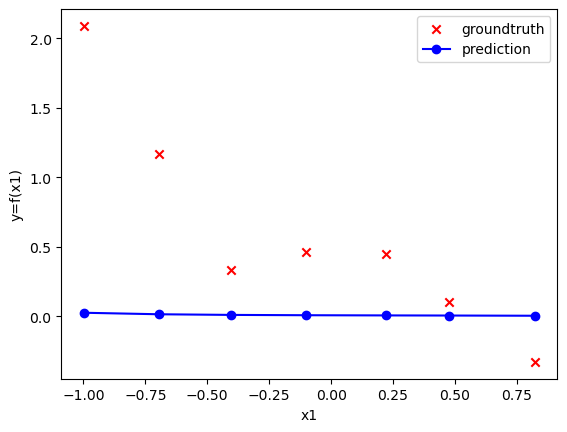

Minimum cost: 0.887303284236363
Testing model with LR 0.0001 and weight decay: 0.001
tensor([[0.0243],
        [0.0135],
        [0.0088],
        [0.0065],
        [0.0052],
        [0.0044],
        [0.0028]])


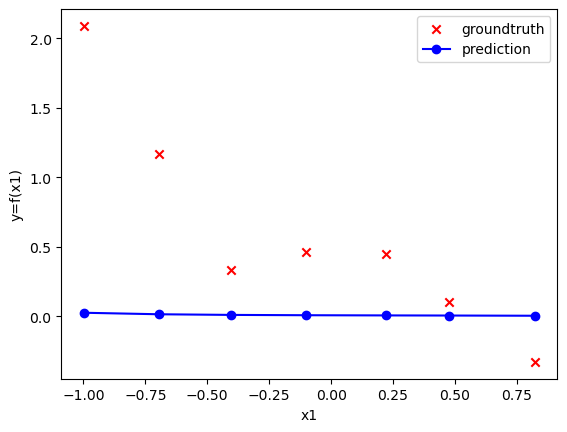

Minimum cost: 0.887303284236363
Testing model with LR 0.0001 and weight decay: 0.0001
tensor([[0.0243],
        [0.0135],
        [0.0088],
        [0.0065],
        [0.0052],
        [0.0044],
        [0.0028]])


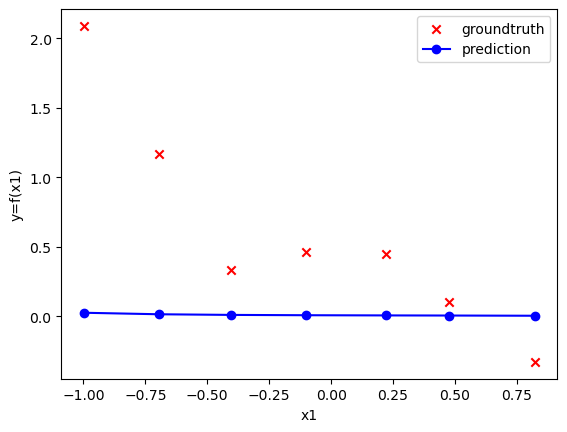

Minimum cost: 0.887303284236363
Testing model with LR 0.0001 and weight decay: 1e-05
tensor([[0.0243],
        [0.0135],
        [0.0088],
        [0.0065],
        [0.0052],
        [0.0044],
        [0.0028]])


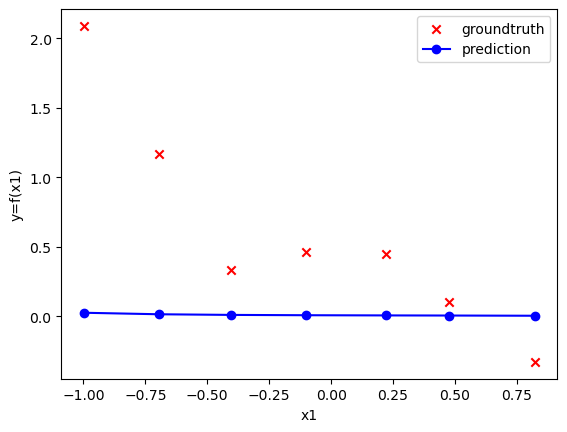

Minimum cost: 0.887303284236363
Testing model with LR 0.0001 and weight decay: 1e-06
tensor([[0.0243],
        [0.0135],
        [0.0088],
        [0.0065],
        [0.0052],
        [0.0044],
        [0.0028]])


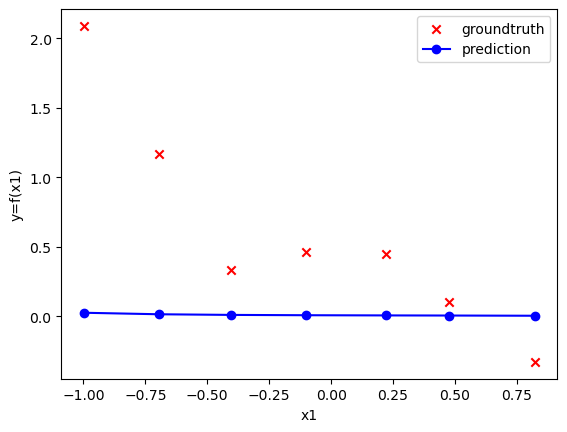

Minimum cost: 0.887303284236363
Testing model with LR 0.0001 and weight decay: 1e-07
tensor([[0.0243],
        [0.0135],
        [0.0088],
        [0.0065],
        [0.0052],
        [0.0044],
        [0.0028]])


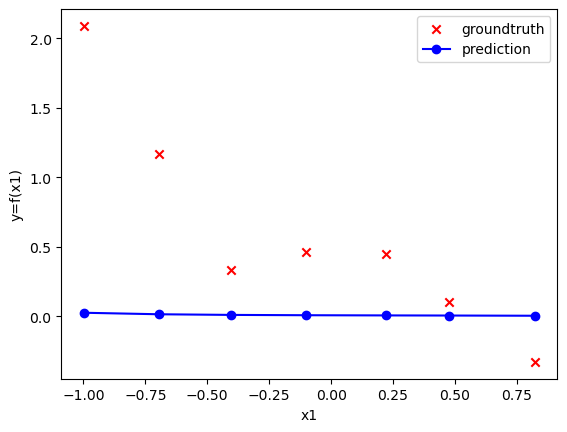

Minimum cost: 0.887303284236363
Testing model with LR 0.0001 and weight decay: 1e-08
tensor([[0.0243],
        [0.0135],
        [0.0088],
        [0.0065],
        [0.0052],
        [0.0044],
        [0.0028]])


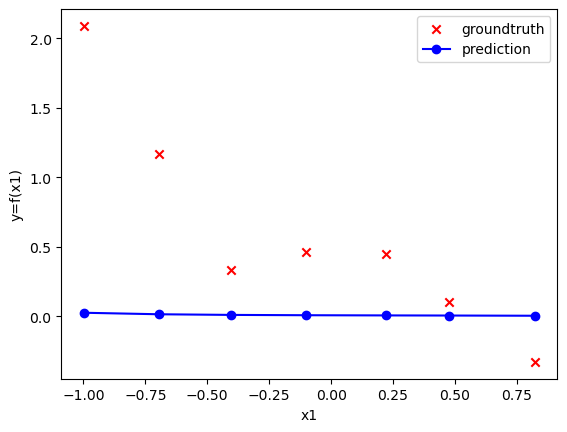

Minimum cost: 0.887303284236363
Testing model with LR 0.0001 and weight decay: 1e-09
tensor([[0.0243],
        [0.0135],
        [0.0088],
        [0.0065],
        [0.0052],
        [0.0044],
        [0.0028]])


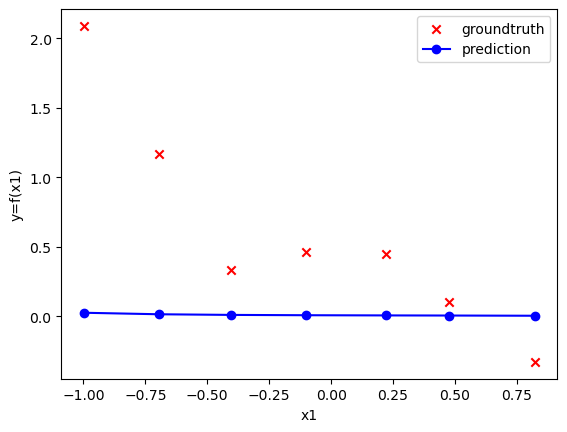

Minimum cost: 0.887303284236363
Testing model with LR 0.0001 and weight decay: 1e-10
tensor([[0.0243],
        [0.0135],
        [0.0088],
        [0.0065],
        [0.0052],
        [0.0044],
        [0.0028]])


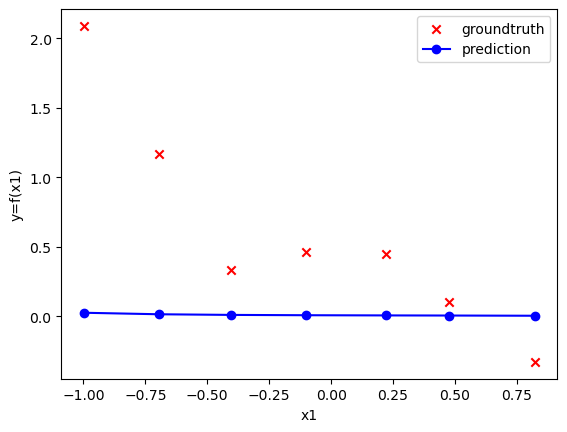

Minimum cost: 0.887303284236363
Testing model with LR 0.0001 and weight decay: 1e-11
tensor([[0.0243],
        [0.0135],
        [0.0088],
        [0.0065],
        [0.0052],
        [0.0044],
        [0.0028]])


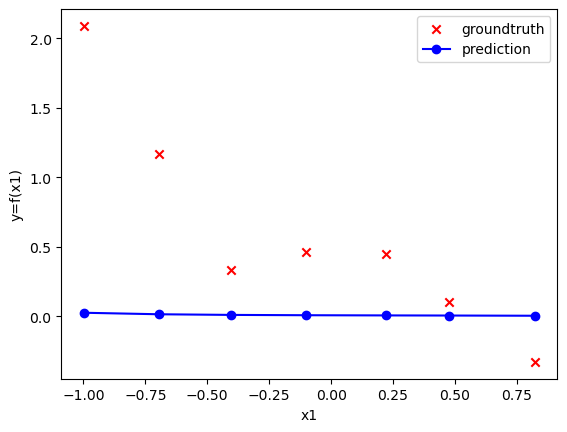

Minimum cost: 0.887303284236363
Testing model with LR 0.0001 and weight decay: 1e-12
tensor([[0.0243],
        [0.0135],
        [0.0088],
        [0.0065],
        [0.0052],
        [0.0044],
        [0.0028]])


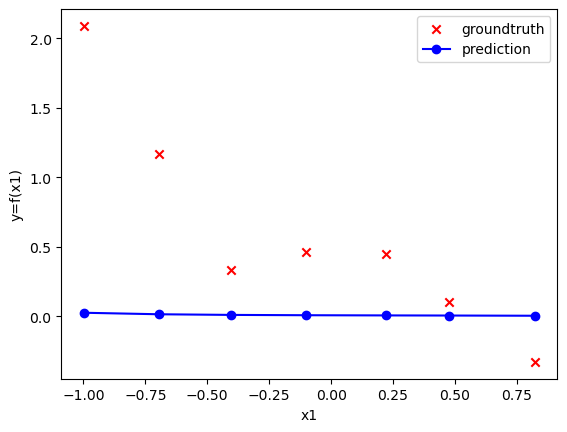

Minimum cost: 0.887303284236363
Testing model with LR 0.0001 and weight decay: 1e-13
tensor([[0.0243],
        [0.0135],
        [0.0088],
        [0.0065],
        [0.0052],
        [0.0044],
        [0.0028]])


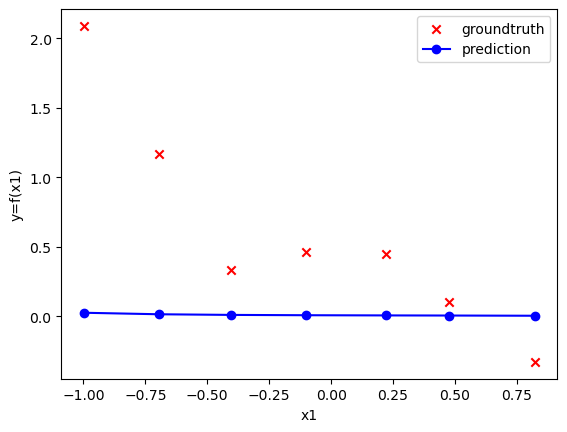

Minimum cost: 0.887303284236363
Testing model with LR 0.0001 and weight decay: 1e-14
tensor([[0.0243],
        [0.0135],
        [0.0088],
        [0.0065],
        [0.0052],
        [0.0044],
        [0.0028]])


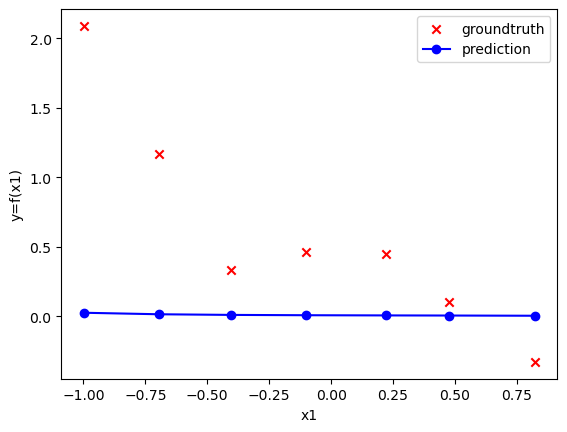

Minimum cost: 0.9060705048697335
Testing model with LR 1e-05 and weight decay: 1
tensor([[0.0024],
        [0.0014],
        [0.0009],
        [0.0007],
        [0.0005],
        [0.0004],
        [0.0003]])


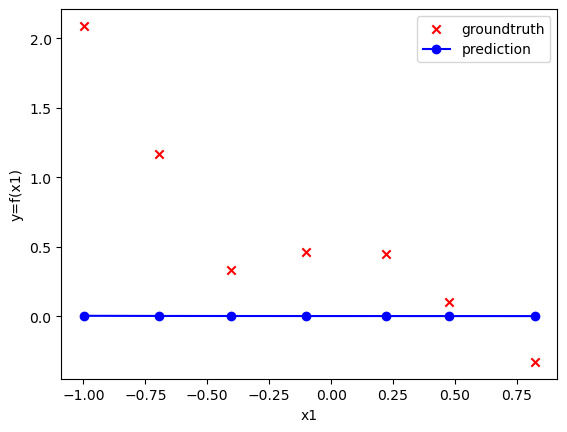

Minimum cost: 0.9060703686305455
Testing model with LR 1e-05 and weight decay: 0.1
tensor([[0.0024],
        [0.0014],
        [0.0009],
        [0.0007],
        [0.0005],
        [0.0004],
        [0.0003]])


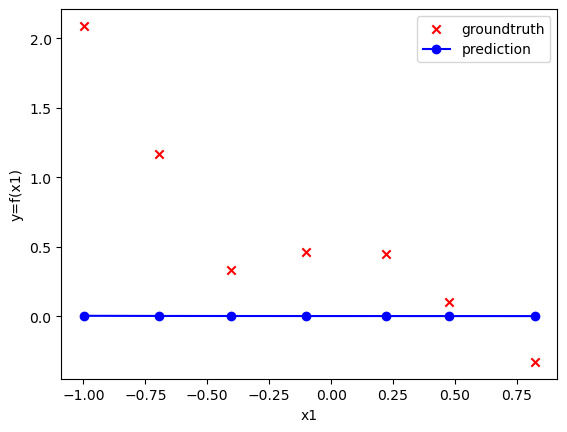

Minimum cost: 0.9060702323913574
Testing model with LR 1e-05 and weight decay: 0.01
tensor([[0.0024],
        [0.0014],
        [0.0009],
        [0.0007],
        [0.0005],
        [0.0004],
        [0.0003]])


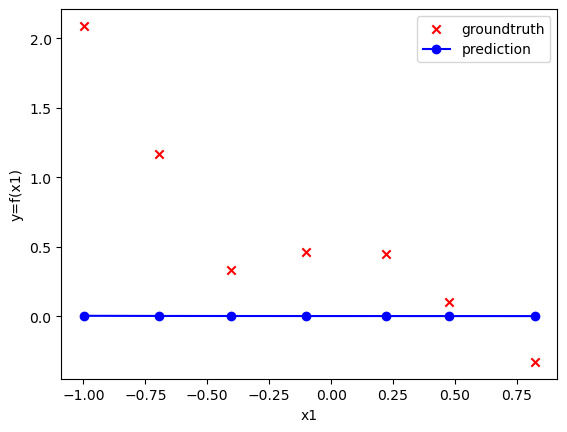

Minimum cost: 0.9060702323913574
Testing model with LR 1e-05 and weight decay: 0.001
tensor([[0.0024],
        [0.0014],
        [0.0009],
        [0.0007],
        [0.0005],
        [0.0004],
        [0.0003]])


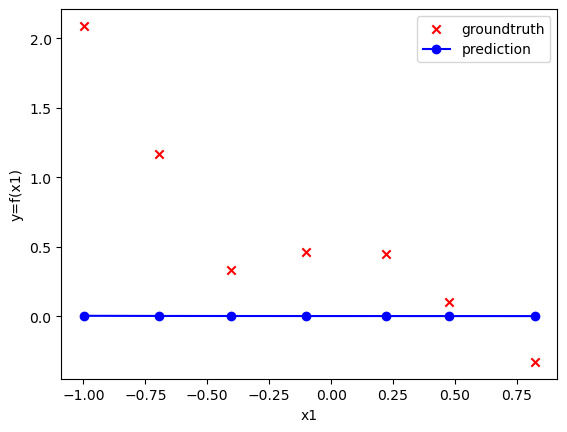

Minimum cost: 0.9060702323913574
Testing model with LR 1e-05 and weight decay: 0.0001
tensor([[0.0024],
        [0.0014],
        [0.0009],
        [0.0007],
        [0.0005],
        [0.0004],
        [0.0003]])


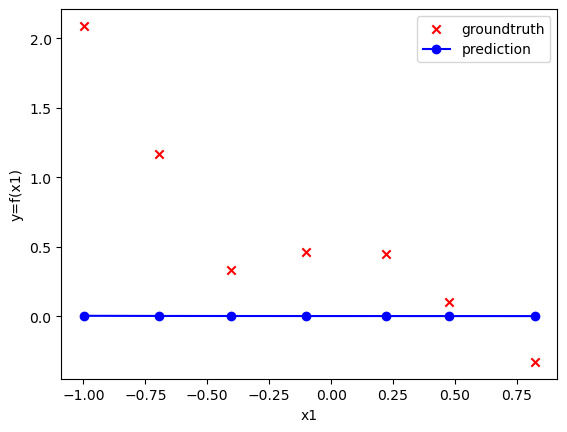

Minimum cost: 0.9060702323913574
Testing model with LR 1e-05 and weight decay: 1e-05
tensor([[0.0024],
        [0.0014],
        [0.0009],
        [0.0007],
        [0.0005],
        [0.0004],
        [0.0003]])


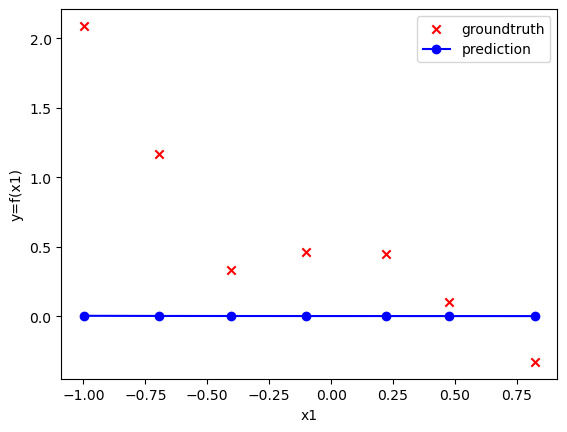

Minimum cost: 0.9060702323913574
Testing model with LR 1e-05 and weight decay: 1e-06
tensor([[0.0024],
        [0.0014],
        [0.0009],
        [0.0007],
        [0.0005],
        [0.0004],
        [0.0003]])


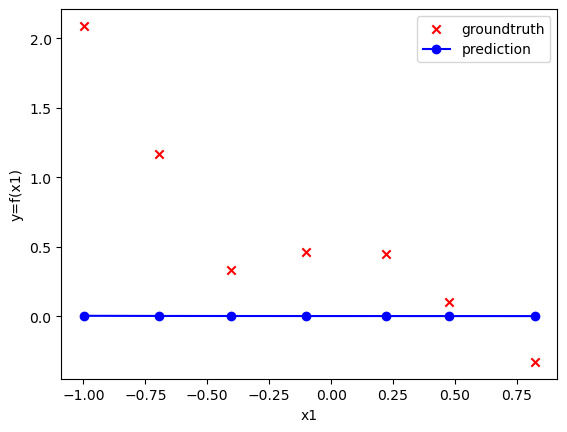

Minimum cost: 0.9060702323913574
Testing model with LR 1e-05 and weight decay: 1e-07
tensor([[0.0024],
        [0.0014],
        [0.0009],
        [0.0007],
        [0.0005],
        [0.0004],
        [0.0003]])


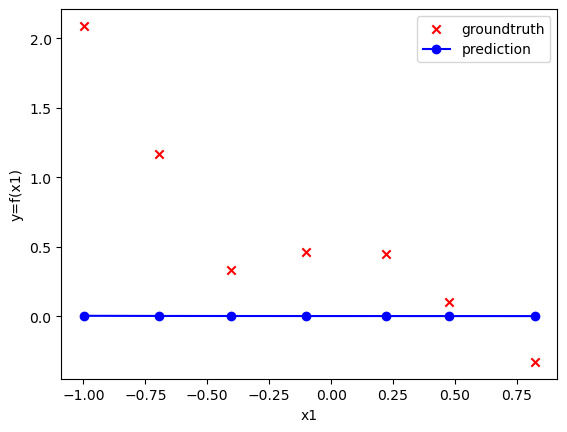

Minimum cost: 0.9060702323913574
Testing model with LR 1e-05 and weight decay: 1e-08
tensor([[0.0024],
        [0.0014],
        [0.0009],
        [0.0007],
        [0.0005],
        [0.0004],
        [0.0003]])


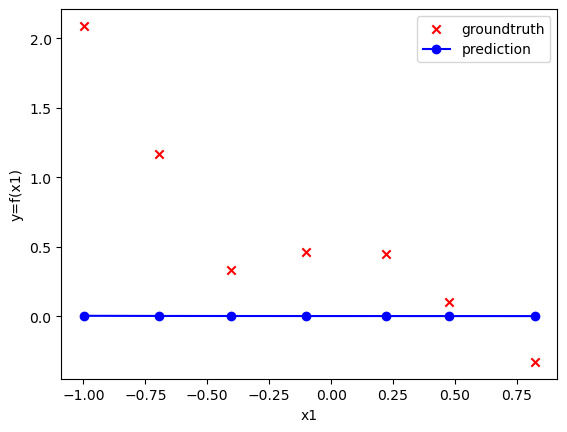

Minimum cost: 0.9060702323913574
Testing model with LR 1e-05 and weight decay: 1e-09
tensor([[0.0024],
        [0.0014],
        [0.0009],
        [0.0007],
        [0.0005],
        [0.0004],
        [0.0003]])


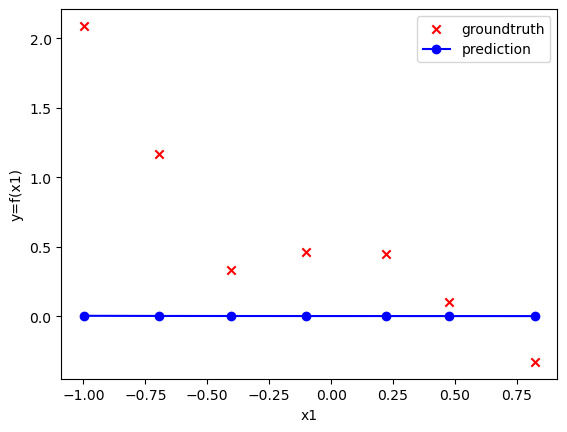

Minimum cost: 0.9060702323913574
Testing model with LR 1e-05 and weight decay: 1e-10
tensor([[0.0024],
        [0.0014],
        [0.0009],
        [0.0007],
        [0.0005],
        [0.0004],
        [0.0003]])


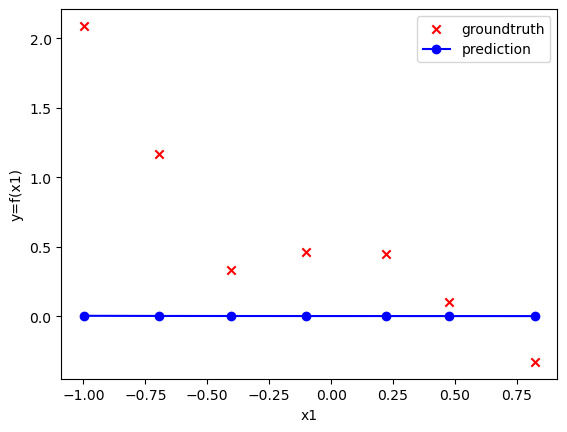

Minimum cost: 0.9060702323913574
Testing model with LR 1e-05 and weight decay: 1e-11
tensor([[0.0024],
        [0.0014],
        [0.0009],
        [0.0007],
        [0.0005],
        [0.0004],
        [0.0003]])


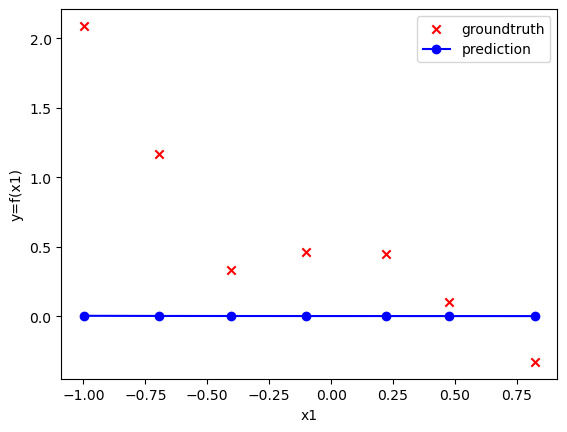

Minimum cost: 0.9060702323913574
Testing model with LR 1e-05 and weight decay: 1e-12
tensor([[0.0024],
        [0.0014],
        [0.0009],
        [0.0007],
        [0.0005],
        [0.0004],
        [0.0003]])


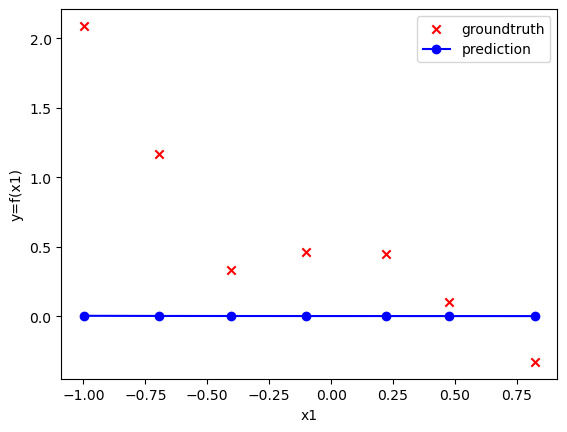

Minimum cost: 0.9060702323913574
Testing model with LR 1e-05 and weight decay: 1e-13
tensor([[0.0024],
        [0.0014],
        [0.0009],
        [0.0007],
        [0.0005],
        [0.0004],
        [0.0003]])


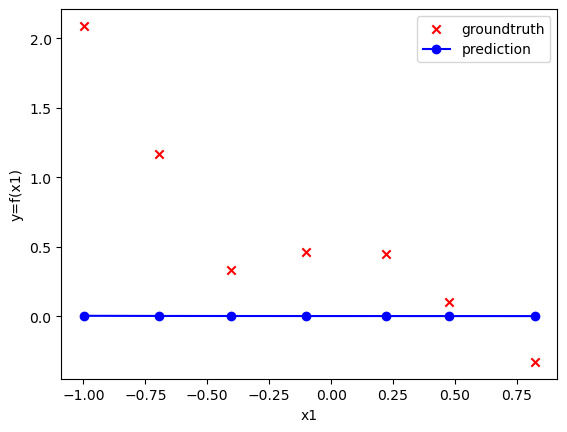

Minimum cost: 0.9060702323913574
Testing model with LR 1e-05 and weight decay: 1e-14
tensor([[0.0024],
        [0.0014],
        [0.0009],
        [0.0007],
        [0.0005],
        [0.0004],
        [0.0003]])


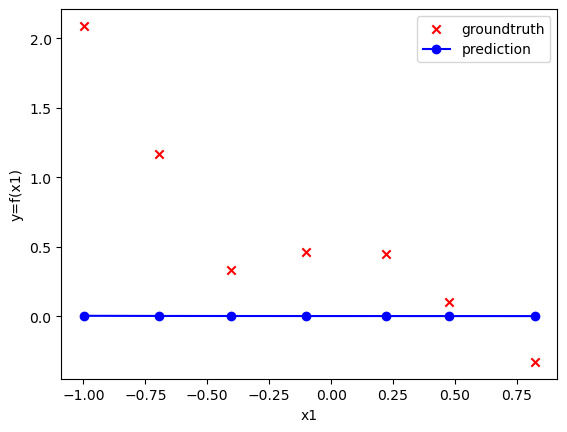

Minimum cost: 0.9079705647059849
Testing model with LR 1e-06 and weight decay: 1
tensor([[2.4480e-04],
        [1.3579e-04],
        [8.8878e-05],
        [6.5960e-05],
        [5.2199e-05],
        [4.3930e-05],
        [2.8201e-05]])


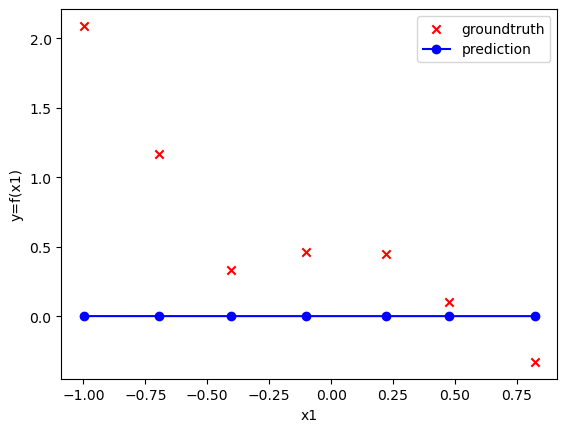

Minimum cost: 0.9079705647059849
Testing model with LR 1e-06 and weight decay: 0.1
tensor([[2.4480e-04],
        [1.3579e-04],
        [8.8879e-05],
        [6.5960e-05],
        [5.2199e-05],
        [4.3930e-05],
        [2.8201e-05]])


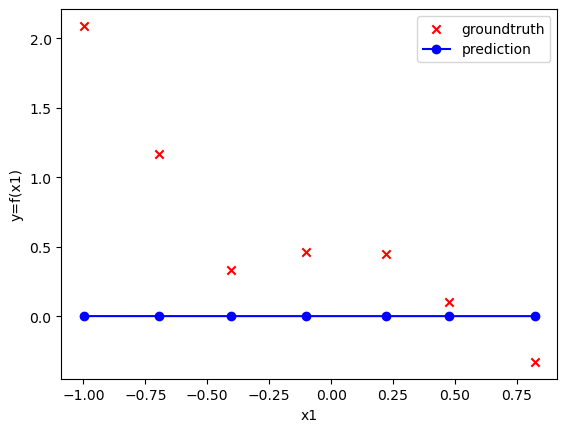

Minimum cost: 0.9079705647059849
Testing model with LR 1e-06 and weight decay: 0.01
tensor([[2.4480e-04],
        [1.3579e-04],
        [8.8879e-05],
        [6.5960e-05],
        [5.2199e-05],
        [4.3930e-05],
        [2.8201e-05]])


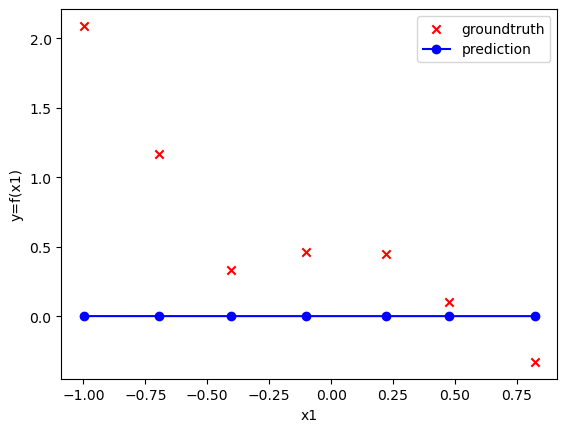

Minimum cost: 0.9079705647059849
Testing model with LR 1e-06 and weight decay: 0.001
tensor([[2.4480e-04],
        [1.3579e-04],
        [8.8879e-05],
        [6.5960e-05],
        [5.2199e-05],
        [4.3930e-05],
        [2.8201e-05]])


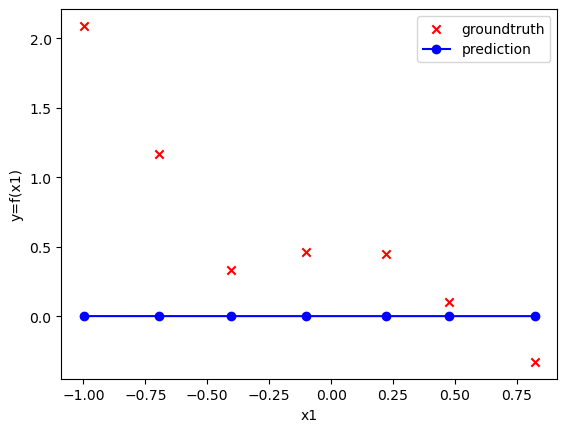

Minimum cost: 0.9079705647059849
Testing model with LR 1e-06 and weight decay: 0.0001
tensor([[2.4480e-04],
        [1.3579e-04],
        [8.8879e-05],
        [6.5960e-05],
        [5.2199e-05],
        [4.3930e-05],
        [2.8201e-05]])


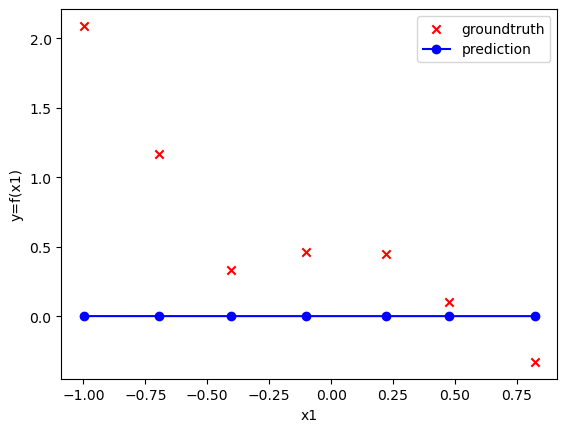

Minimum cost: 0.9079705647059849
Testing model with LR 1e-06 and weight decay: 1e-05
tensor([[2.4480e-04],
        [1.3579e-04],
        [8.8879e-05],
        [6.5960e-05],
        [5.2199e-05],
        [4.3930e-05],
        [2.8201e-05]])


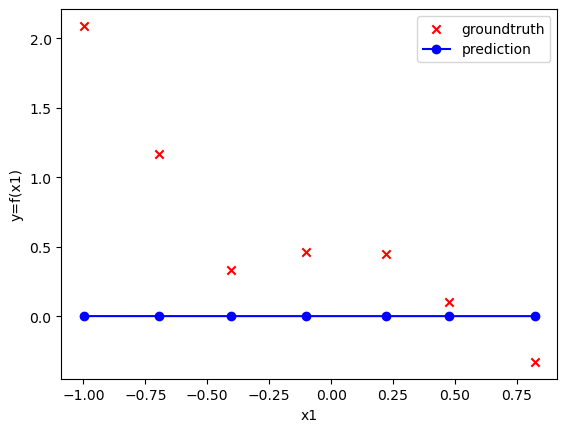

Minimum cost: 0.9079705647059849
Testing model with LR 1e-06 and weight decay: 1e-06
tensor([[2.4480e-04],
        [1.3579e-04],
        [8.8879e-05],
        [6.5960e-05],
        [5.2199e-05],
        [4.3930e-05],
        [2.8201e-05]])


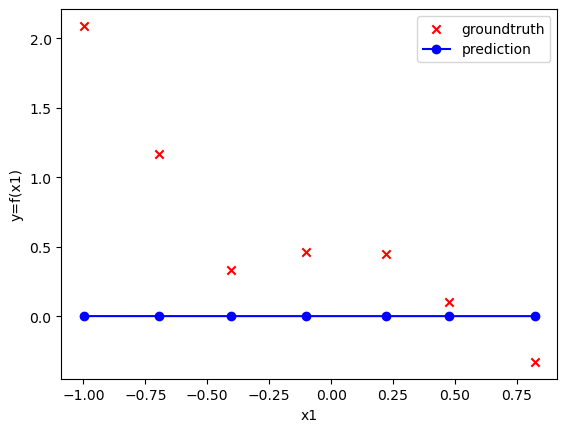

Minimum cost: 0.9079705647059849
Testing model with LR 1e-06 and weight decay: 1e-07
tensor([[2.4480e-04],
        [1.3579e-04],
        [8.8879e-05],
        [6.5960e-05],
        [5.2199e-05],
        [4.3930e-05],
        [2.8201e-05]])


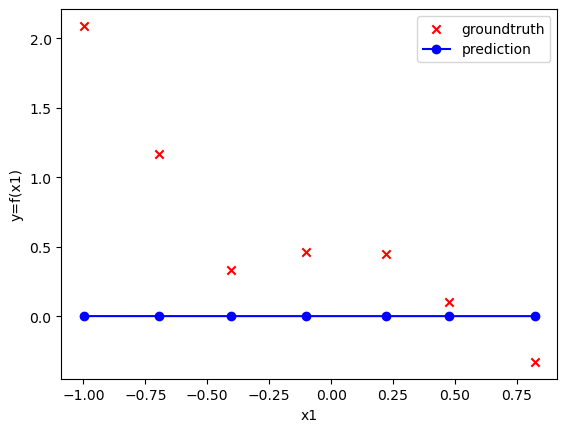

Minimum cost: 0.9079705647059849
Testing model with LR 1e-06 and weight decay: 1e-08
tensor([[2.4480e-04],
        [1.3579e-04],
        [8.8879e-05],
        [6.5960e-05],
        [5.2199e-05],
        [4.3930e-05],
        [2.8201e-05]])


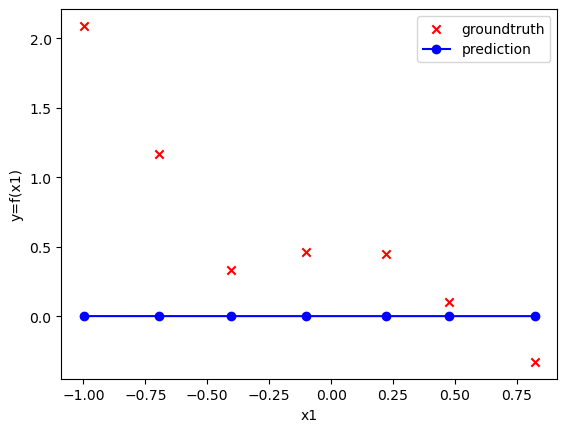

Minimum cost: 0.9079705647059849
Testing model with LR 1e-06 and weight decay: 1e-09
tensor([[2.4480e-04],
        [1.3579e-04],
        [8.8879e-05],
        [6.5960e-05],
        [5.2199e-05],
        [4.3930e-05],
        [2.8201e-05]])


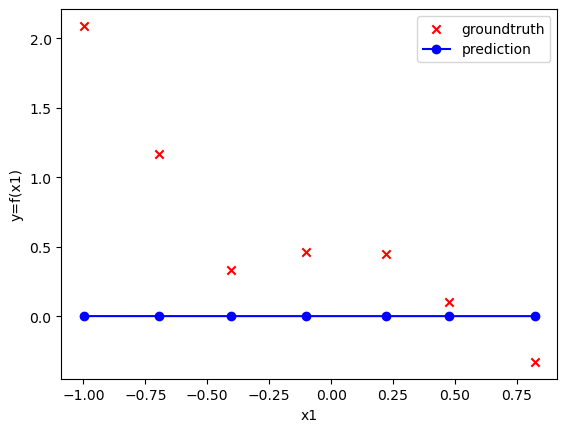

Minimum cost: 0.9079705647059849
Testing model with LR 1e-06 and weight decay: 1e-10
tensor([[2.4480e-04],
        [1.3579e-04],
        [8.8879e-05],
        [6.5960e-05],
        [5.2199e-05],
        [4.3930e-05],
        [2.8201e-05]])


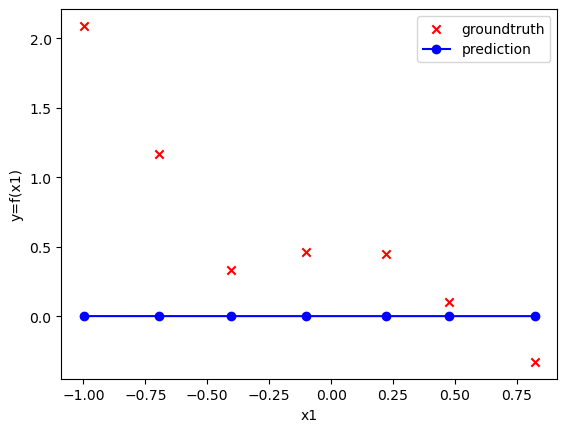

Minimum cost: 0.9079705647059849
Testing model with LR 1e-06 and weight decay: 1e-11
tensor([[2.4480e-04],
        [1.3579e-04],
        [8.8879e-05],
        [6.5960e-05],
        [5.2199e-05],
        [4.3930e-05],
        [2.8201e-05]])


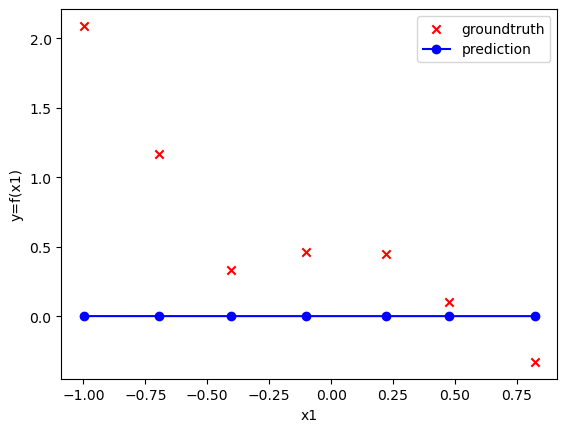

Minimum cost: 0.9079705647059849
Testing model with LR 1e-06 and weight decay: 1e-12
tensor([[2.4480e-04],
        [1.3579e-04],
        [8.8879e-05],
        [6.5960e-05],
        [5.2199e-05],
        [4.3930e-05],
        [2.8201e-05]])


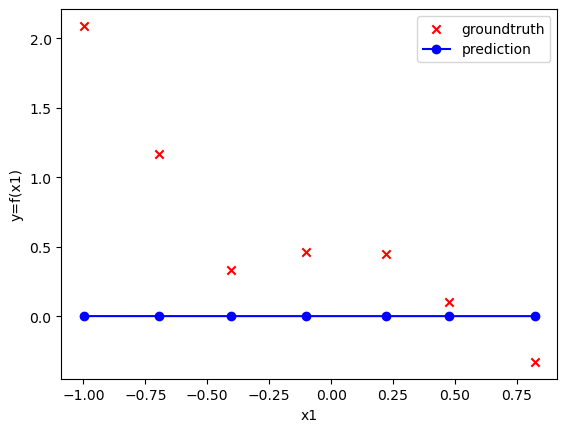

Minimum cost: 0.9079705647059849
Testing model with LR 1e-06 and weight decay: 1e-13
tensor([[2.4480e-04],
        [1.3579e-04],
        [8.8879e-05],
        [6.5960e-05],
        [5.2199e-05],
        [4.3930e-05],
        [2.8201e-05]])


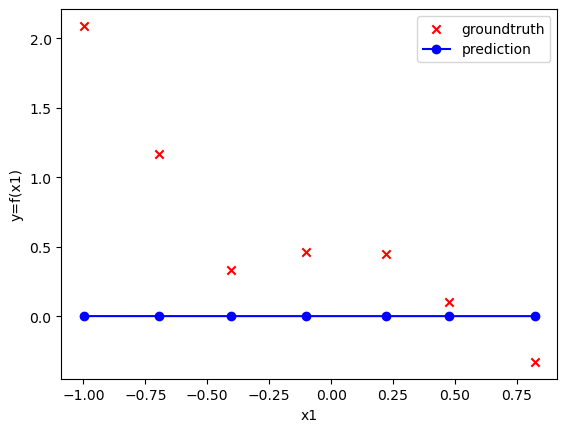

Minimum cost: 0.9079705647059849
Testing model with LR 1e-06 and weight decay: 1e-14
tensor([[2.4480e-04],
        [1.3579e-04],
        [8.8879e-05],
        [6.5960e-05],
        [5.2199e-05],
        [4.3930e-05],
        [2.8201e-05]])


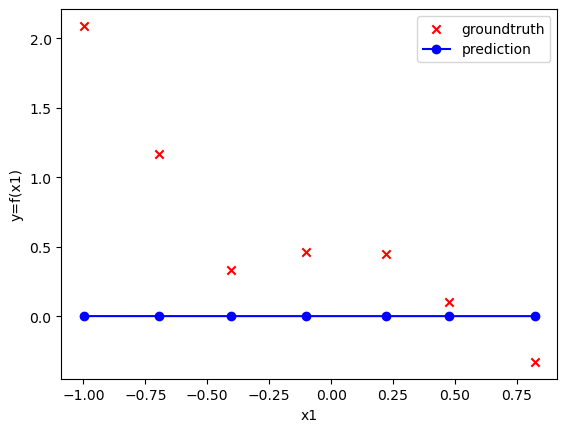

Minimum cost: 0.9081607546125139
Testing model with LR 1e-07 and weight decay: 1
tensor([[2.4482e-05],
        [1.3580e-05],
        [8.8884e-06],
        [6.5964e-06],
        [5.2202e-06],
        [4.3933e-06],
        [2.8204e-06]])


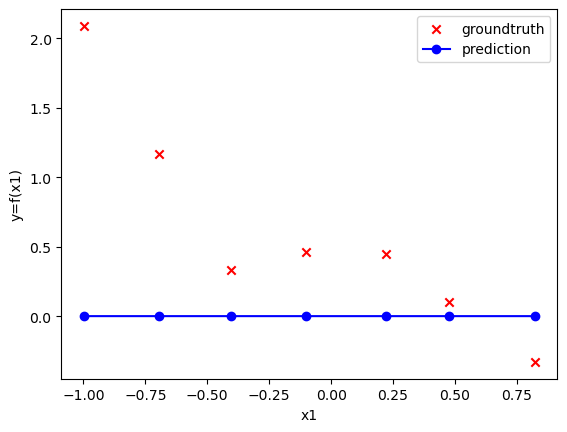

Minimum cost: 0.9081607546125139
Testing model with LR 1e-07 and weight decay: 0.1
tensor([[2.4482e-05],
        [1.3580e-05],
        [8.8884e-06],
        [6.5964e-06],
        [5.2202e-06],
        [4.3933e-06],
        [2.8204e-06]])


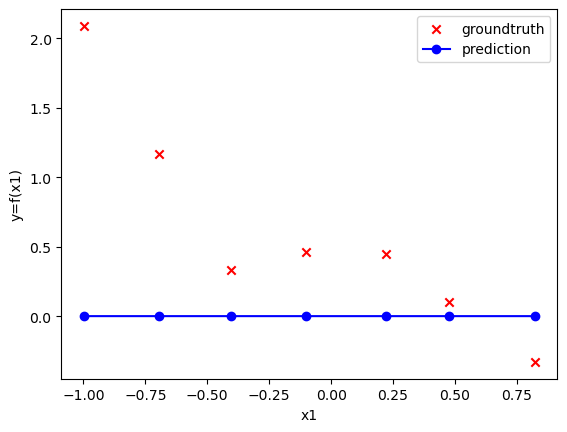

Minimum cost: 0.9081607546125139
Testing model with LR 1e-07 and weight decay: 0.01
tensor([[2.4482e-05],
        [1.3580e-05],
        [8.8884e-06],
        [6.5964e-06],
        [5.2202e-06],
        [4.3933e-06],
        [2.8204e-06]])


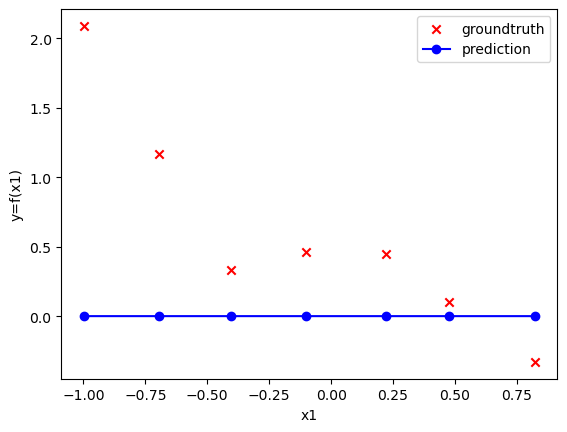

Minimum cost: 0.9081607546125139
Testing model with LR 1e-07 and weight decay: 0.001
tensor([[2.4482e-05],
        [1.3580e-05],
        [8.8884e-06],
        [6.5964e-06],
        [5.2202e-06],
        [4.3933e-06],
        [2.8204e-06]])


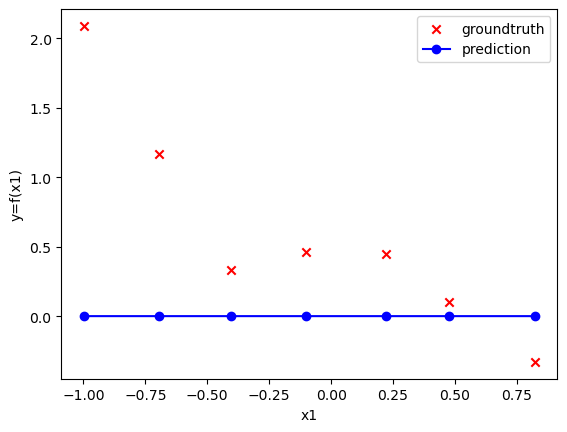

Minimum cost: 0.9081607546125139
Testing model with LR 1e-07 and weight decay: 0.0001
tensor([[2.4482e-05],
        [1.3580e-05],
        [8.8884e-06],
        [6.5964e-06],
        [5.2202e-06],
        [4.3933e-06],
        [2.8204e-06]])


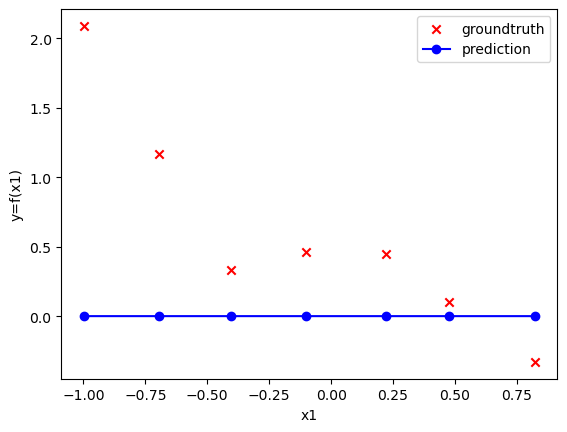

Minimum cost: 0.9081607546125139
Testing model with LR 1e-07 and weight decay: 1e-05
tensor([[2.4482e-05],
        [1.3580e-05],
        [8.8884e-06],
        [6.5964e-06],
        [5.2202e-06],
        [4.3933e-06],
        [2.8204e-06]])


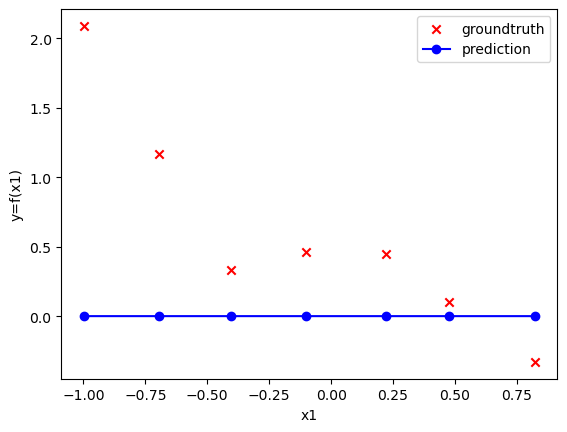

Minimum cost: 0.9081607546125139
Testing model with LR 1e-07 and weight decay: 1e-06
tensor([[2.4482e-05],
        [1.3580e-05],
        [8.8884e-06],
        [6.5964e-06],
        [5.2202e-06],
        [4.3933e-06],
        [2.8204e-06]])


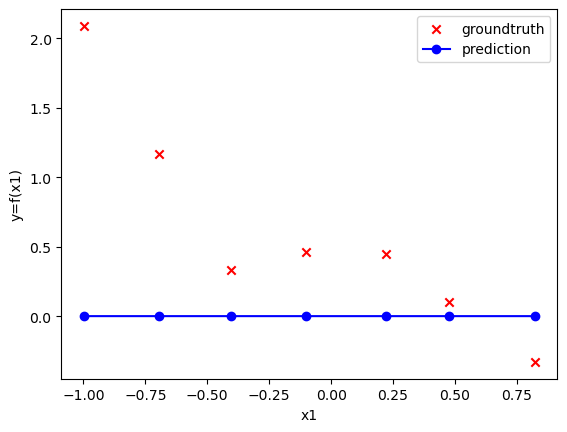

Minimum cost: 0.9081607546125139
Testing model with LR 1e-07 and weight decay: 1e-07
tensor([[2.4482e-05],
        [1.3580e-05],
        [8.8884e-06],
        [6.5964e-06],
        [5.2202e-06],
        [4.3933e-06],
        [2.8204e-06]])


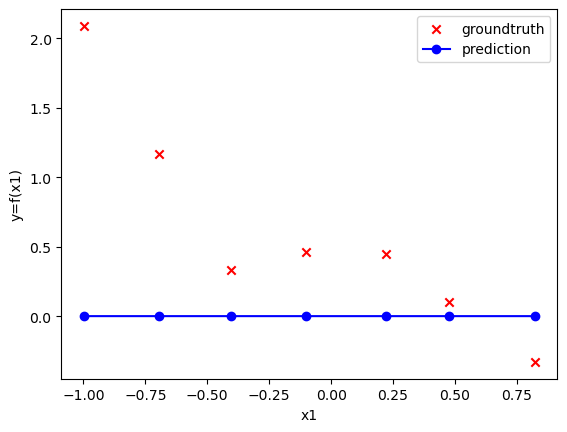

Minimum cost: 0.9081607546125139
Testing model with LR 1e-07 and weight decay: 1e-08
tensor([[2.4482e-05],
        [1.3580e-05],
        [8.8884e-06],
        [6.5964e-06],
        [5.2202e-06],
        [4.3933e-06],
        [2.8204e-06]])


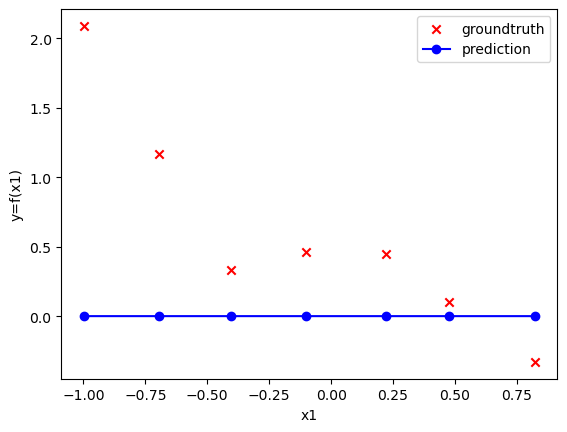

Minimum cost: 0.9081607546125139
Testing model with LR 1e-07 and weight decay: 1e-09
tensor([[2.4482e-05],
        [1.3580e-05],
        [8.8884e-06],
        [6.5964e-06],
        [5.2202e-06],
        [4.3933e-06],
        [2.8204e-06]])


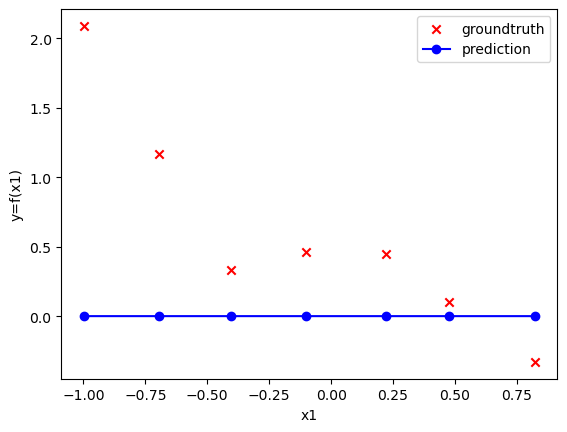

Minimum cost: 0.9081607546125139
Testing model with LR 1e-07 and weight decay: 1e-10
tensor([[2.4482e-05],
        [1.3580e-05],
        [8.8884e-06],
        [6.5964e-06],
        [5.2202e-06],
        [4.3933e-06],
        [2.8204e-06]])


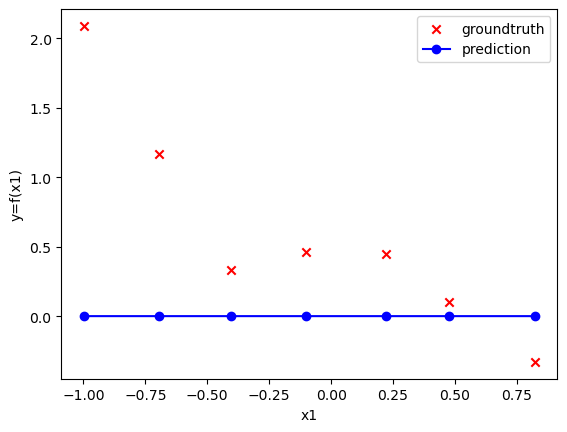

Minimum cost: 0.9081607546125139
Testing model with LR 1e-07 and weight decay: 1e-11
tensor([[2.4482e-05],
        [1.3580e-05],
        [8.8884e-06],
        [6.5964e-06],
        [5.2202e-06],
        [4.3933e-06],
        [2.8204e-06]])


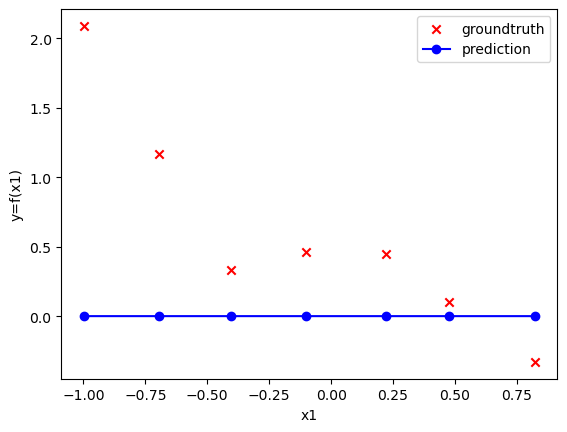

Minimum cost: 0.9081607546125139
Testing model with LR 1e-07 and weight decay: 1e-12
tensor([[2.4482e-05],
        [1.3580e-05],
        [8.8884e-06],
        [6.5964e-06],
        [5.2202e-06],
        [4.3933e-06],
        [2.8204e-06]])


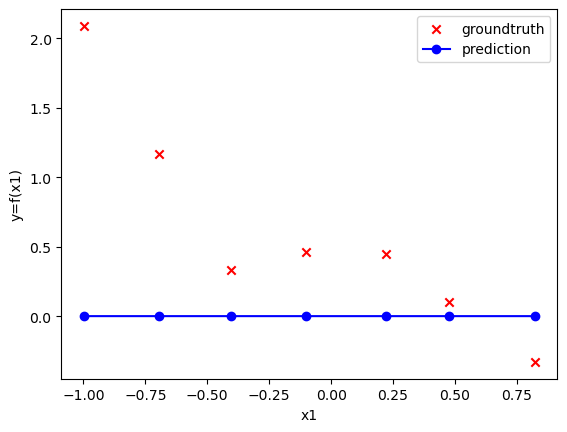

Minimum cost: 0.9081607546125139
Testing model with LR 1e-07 and weight decay: 1e-13
tensor([[2.4482e-05],
        [1.3580e-05],
        [8.8884e-06],
        [6.5964e-06],
        [5.2202e-06],
        [4.3933e-06],
        [2.8204e-06]])


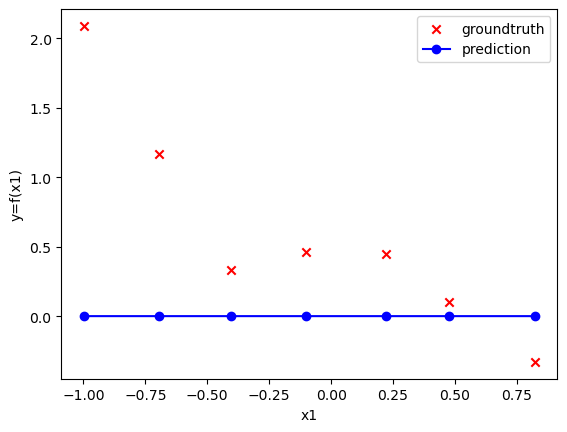

Minimum cost: 0.9081607546125139
Testing model with LR 1e-07 and weight decay: 1e-14
tensor([[2.4482e-05],
        [1.3580e-05],
        [8.8884e-06],
        [6.5964e-06],
        [5.2202e-06],
        [4.3933e-06],
        [2.8204e-06]])


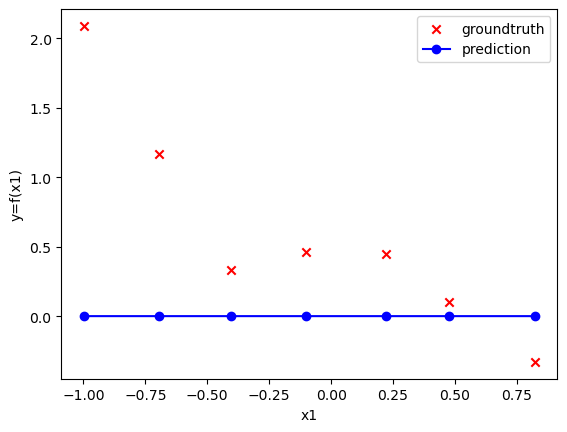

Minimum cost: 0.90817996433803
Testing model with LR 1e-08 and weight decay: 1
tensor([[2.4482e-06],
        [1.3580e-06],
        [8.8885e-07],
        [6.5965e-07],
        [5.2203e-07],
        [4.3934e-07],
        [2.8204e-07]])


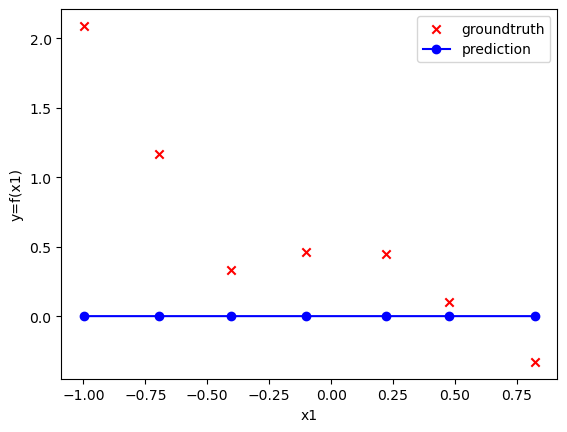

Minimum cost: 0.90817996433803
Testing model with LR 1e-08 and weight decay: 0.1
tensor([[2.4482e-06],
        [1.3580e-06],
        [8.8885e-07],
        [6.5965e-07],
        [5.2203e-07],
        [4.3934e-07],
        [2.8204e-07]])


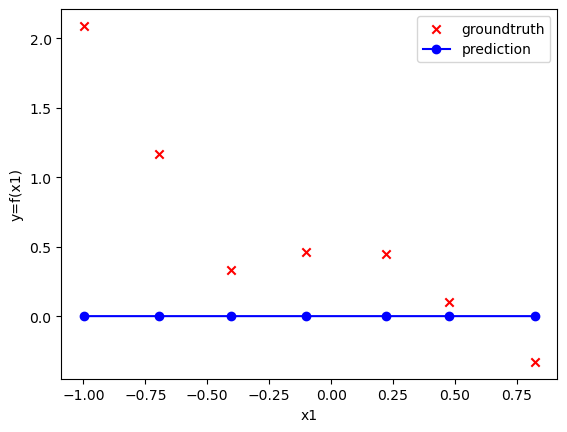

Minimum cost: 0.90817996433803
Testing model with LR 1e-08 and weight decay: 0.01
tensor([[2.4482e-06],
        [1.3580e-06],
        [8.8885e-07],
        [6.5965e-07],
        [5.2203e-07],
        [4.3934e-07],
        [2.8204e-07]])


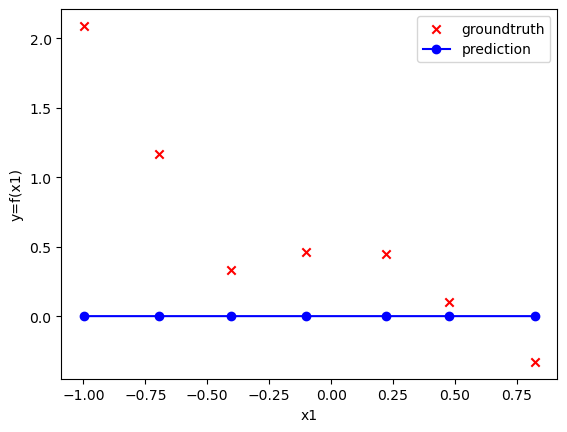

Minimum cost: 0.90817996433803
Testing model with LR 1e-08 and weight decay: 0.001
tensor([[2.4482e-06],
        [1.3580e-06],
        [8.8885e-07],
        [6.5965e-07],
        [5.2203e-07],
        [4.3934e-07],
        [2.8204e-07]])


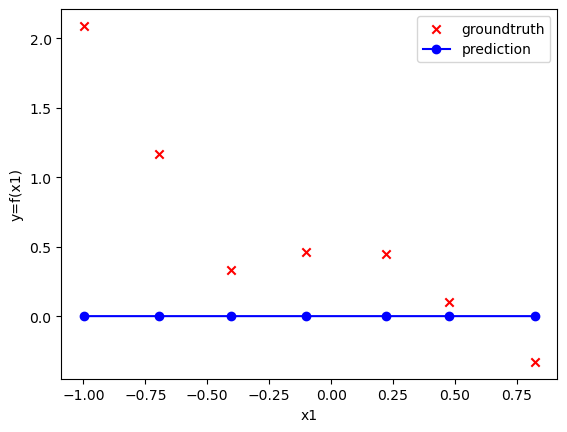

Minimum cost: 0.90817996433803
Testing model with LR 1e-08 and weight decay: 0.0001
tensor([[2.4482e-06],
        [1.3580e-06],
        [8.8885e-07],
        [6.5965e-07],
        [5.2203e-07],
        [4.3934e-07],
        [2.8204e-07]])


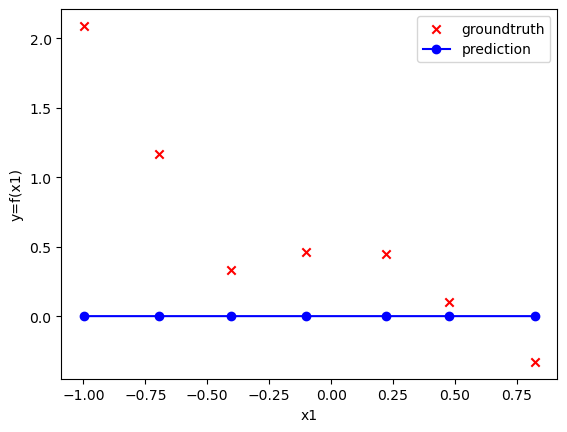

Minimum cost: 0.90817996433803
Testing model with LR 1e-08 and weight decay: 1e-05
tensor([[2.4482e-06],
        [1.3580e-06],
        [8.8885e-07],
        [6.5965e-07],
        [5.2203e-07],
        [4.3934e-07],
        [2.8204e-07]])


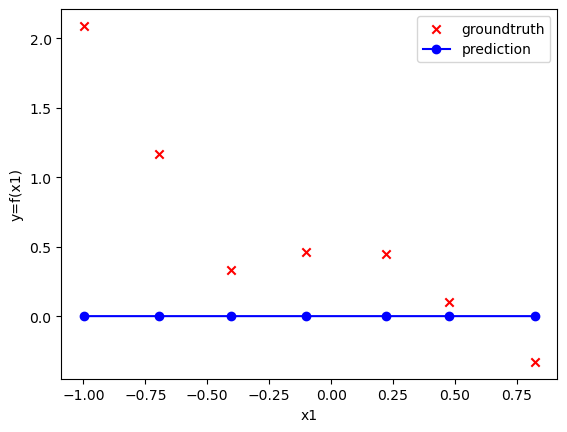

Minimum cost: 0.90817996433803
Testing model with LR 1e-08 and weight decay: 1e-06
tensor([[2.4482e-06],
        [1.3580e-06],
        [8.8885e-07],
        [6.5965e-07],
        [5.2203e-07],
        [4.3934e-07],
        [2.8204e-07]])


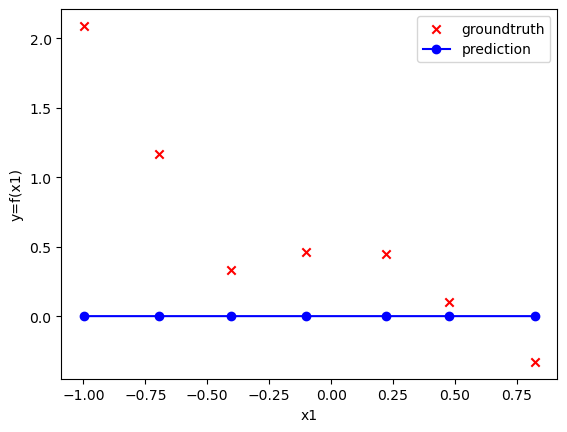

Minimum cost: 0.90817996433803
Testing model with LR 1e-08 and weight decay: 1e-07
tensor([[2.4482e-06],
        [1.3580e-06],
        [8.8885e-07],
        [6.5965e-07],
        [5.2203e-07],
        [4.3934e-07],
        [2.8204e-07]])


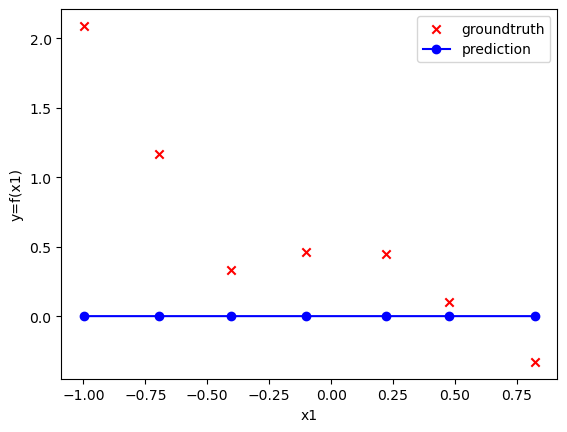

Minimum cost: 0.90817996433803
Testing model with LR 1e-08 and weight decay: 1e-08
tensor([[2.4482e-06],
        [1.3580e-06],
        [8.8885e-07],
        [6.5965e-07],
        [5.2203e-07],
        [4.3934e-07],
        [2.8204e-07]])


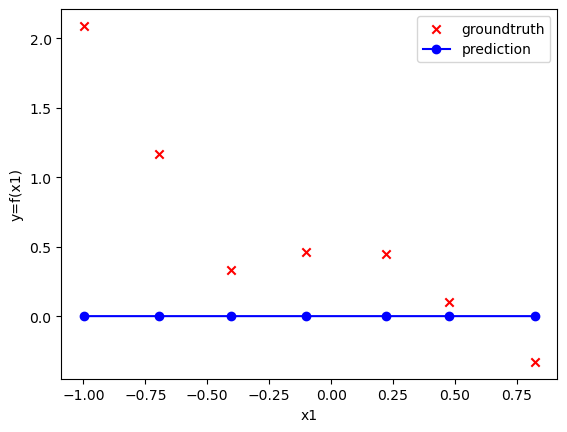

Minimum cost: 0.90817996433803
Testing model with LR 1e-08 and weight decay: 1e-09
tensor([[2.4482e-06],
        [1.3580e-06],
        [8.8885e-07],
        [6.5965e-07],
        [5.2203e-07],
        [4.3934e-07],
        [2.8204e-07]])


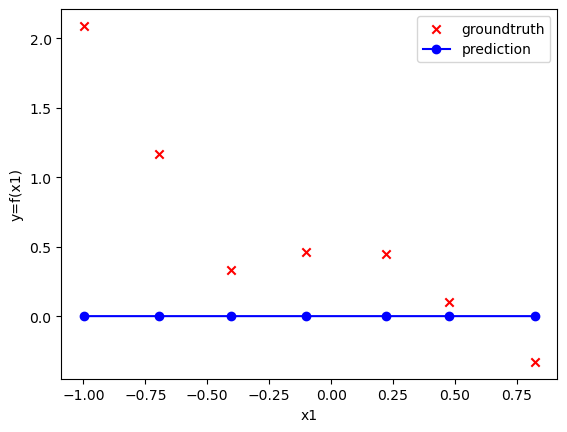

Minimum cost: 0.90817996433803
Testing model with LR 1e-08 and weight decay: 1e-10
tensor([[2.4482e-06],
        [1.3580e-06],
        [8.8885e-07],
        [6.5965e-07],
        [5.2203e-07],
        [4.3934e-07],
        [2.8204e-07]])


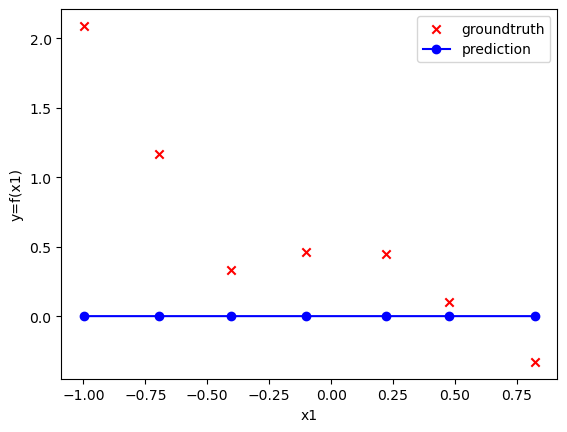

Minimum cost: 0.90817996433803
Testing model with LR 1e-08 and weight decay: 1e-11
tensor([[2.4482e-06],
        [1.3580e-06],
        [8.8885e-07],
        [6.5965e-07],
        [5.2203e-07],
        [4.3934e-07],
        [2.8204e-07]])


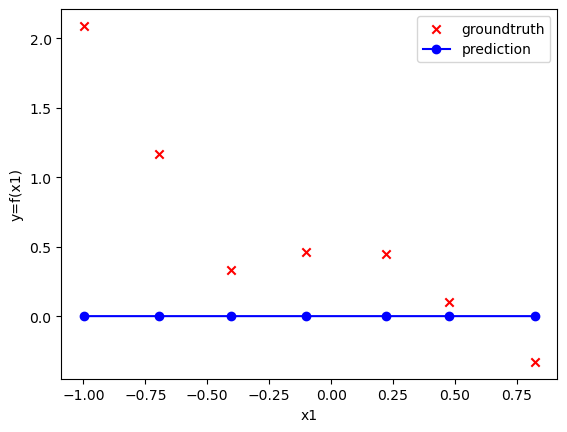

Minimum cost: 0.90817996433803
Testing model with LR 1e-08 and weight decay: 1e-12
tensor([[2.4482e-06],
        [1.3580e-06],
        [8.8885e-07],
        [6.5965e-07],
        [5.2203e-07],
        [4.3934e-07],
        [2.8204e-07]])


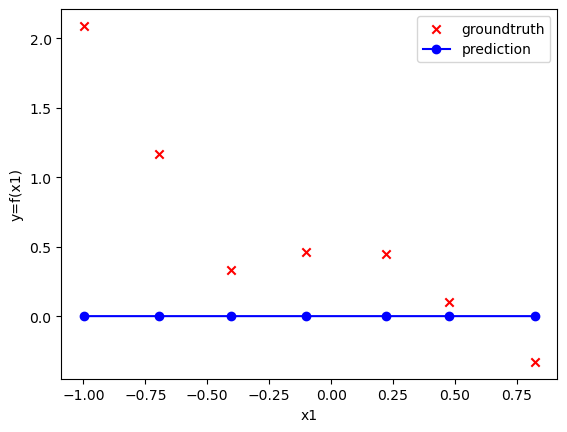

Minimum cost: 0.90817996433803
Testing model with LR 1e-08 and weight decay: 1e-13
tensor([[2.4482e-06],
        [1.3580e-06],
        [8.8885e-07],
        [6.5965e-07],
        [5.2203e-07],
        [4.3934e-07],
        [2.8204e-07]])


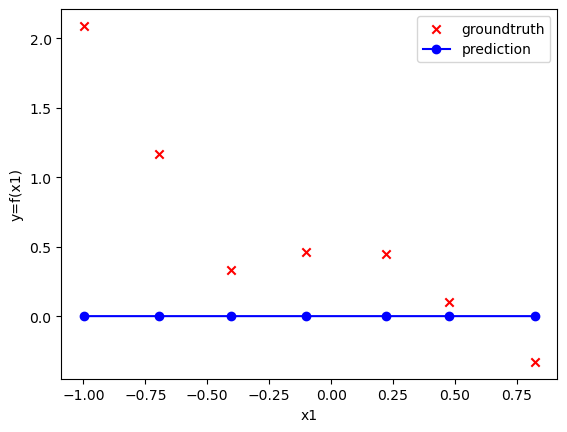

Minimum cost: 0.90817996433803
Testing model with LR 1e-08 and weight decay: 1e-14
tensor([[2.4482e-06],
        [1.3580e-06],
        [8.8885e-07],
        [6.5965e-07],
        [5.2203e-07],
        [4.3934e-07],
        [2.8204e-07]])


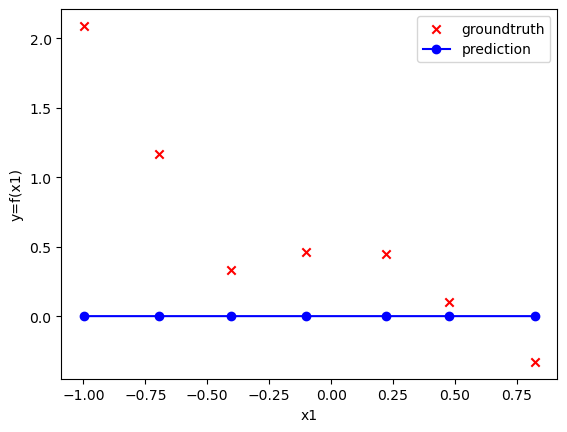

Minimum cost: 0.9081818035670689
Testing model with LR 1e-09 and weight decay: 1
tensor([[2.4482e-07],
        [1.3580e-07],
        [8.8885e-08],
        [6.5965e-08],
        [5.2203e-08],
        [4.3934e-08],
        [2.8204e-08]])


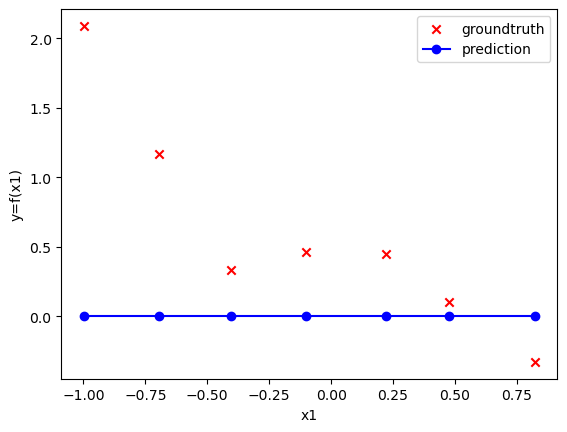

Minimum cost: 0.9081818035670689
Testing model with LR 1e-09 and weight decay: 0.1
tensor([[2.4482e-07],
        [1.3580e-07],
        [8.8885e-08],
        [6.5965e-08],
        [5.2203e-08],
        [4.3934e-08],
        [2.8204e-08]])


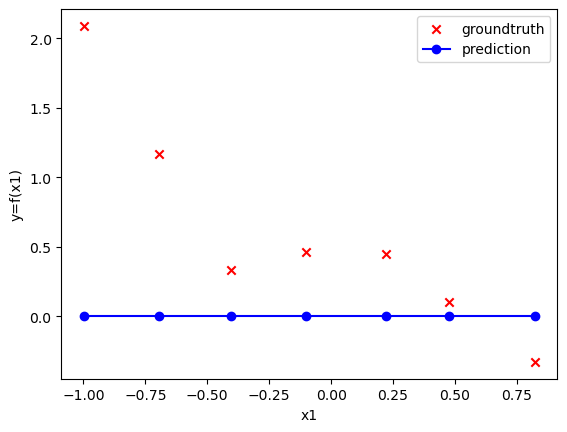

Minimum cost: 0.9081818035670689
Testing model with LR 1e-09 and weight decay: 0.01
tensor([[2.4482e-07],
        [1.3580e-07],
        [8.8885e-08],
        [6.5965e-08],
        [5.2203e-08],
        [4.3934e-08],
        [2.8204e-08]])


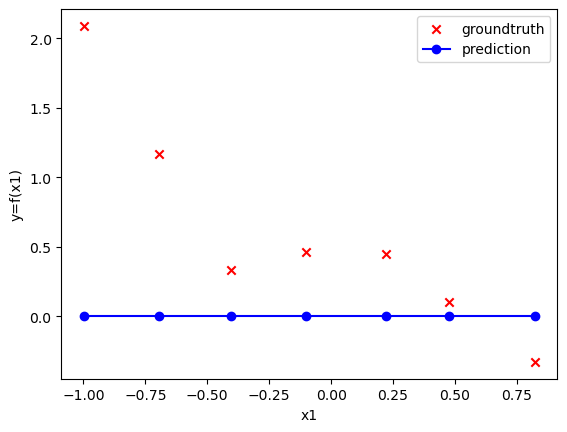

Minimum cost: 0.9081818035670689
Testing model with LR 1e-09 and weight decay: 0.001
tensor([[2.4482e-07],
        [1.3580e-07],
        [8.8885e-08],
        [6.5965e-08],
        [5.2203e-08],
        [4.3934e-08],
        [2.8204e-08]])


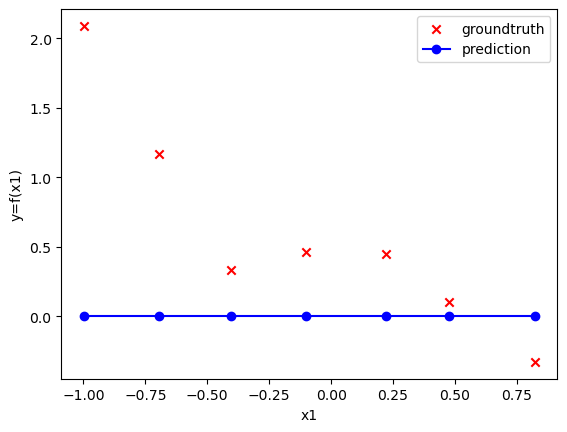

Minimum cost: 0.9081818035670689
Testing model with LR 1e-09 and weight decay: 0.0001
tensor([[2.4482e-07],
        [1.3580e-07],
        [8.8885e-08],
        [6.5965e-08],
        [5.2203e-08],
        [4.3934e-08],
        [2.8204e-08]])


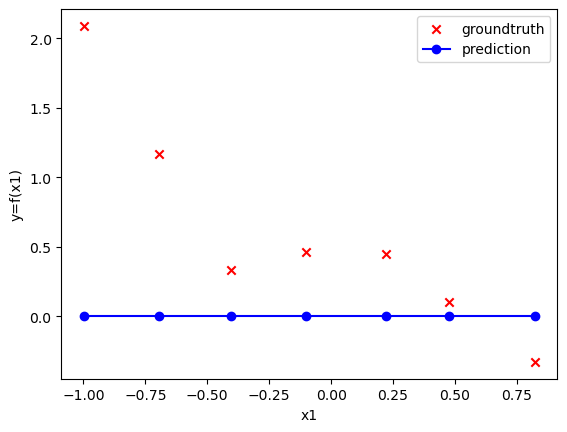

Minimum cost: 0.9081818035670689
Testing model with LR 1e-09 and weight decay: 1e-05
tensor([[2.4482e-07],
        [1.3580e-07],
        [8.8885e-08],
        [6.5965e-08],
        [5.2203e-08],
        [4.3934e-08],
        [2.8204e-08]])


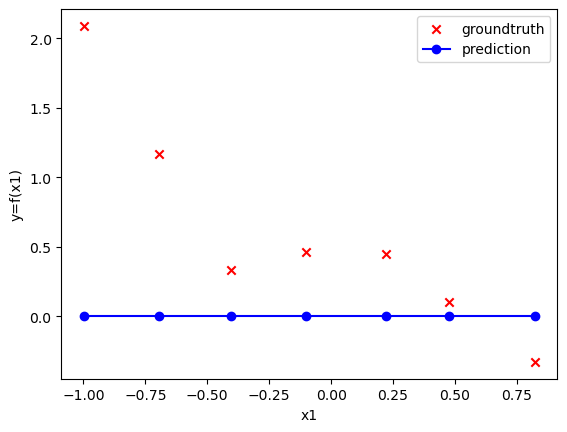

Minimum cost: 0.9081818035670689
Testing model with LR 1e-09 and weight decay: 1e-06
tensor([[2.4482e-07],
        [1.3580e-07],
        [8.8885e-08],
        [6.5965e-08],
        [5.2203e-08],
        [4.3934e-08],
        [2.8204e-08]])


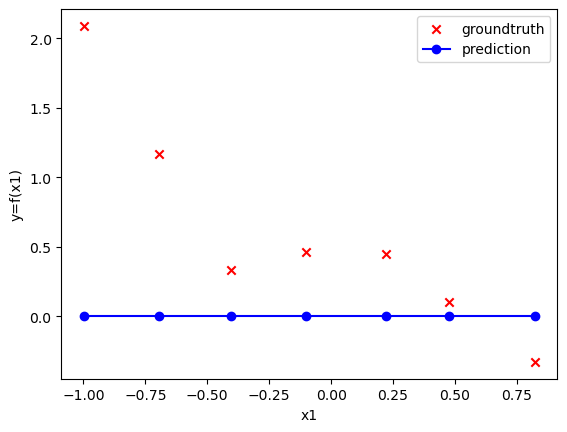

Minimum cost: 0.9081818035670689
Testing model with LR 1e-09 and weight decay: 1e-07
tensor([[2.4482e-07],
        [1.3580e-07],
        [8.8885e-08],
        [6.5965e-08],
        [5.2203e-08],
        [4.3934e-08],
        [2.8204e-08]])


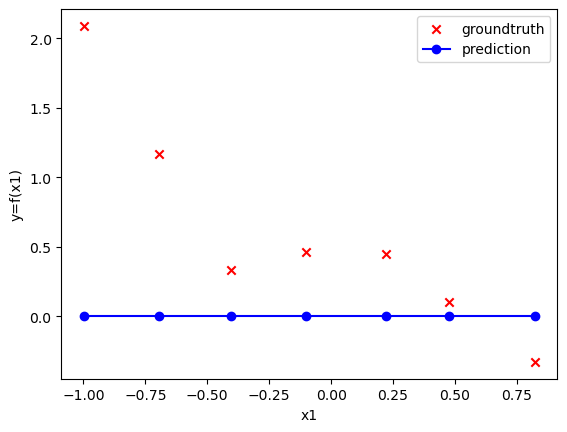

Minimum cost: 0.9081818035670689
Testing model with LR 1e-09 and weight decay: 1e-08
tensor([[2.4482e-07],
        [1.3580e-07],
        [8.8885e-08],
        [6.5965e-08],
        [5.2203e-08],
        [4.3934e-08],
        [2.8204e-08]])


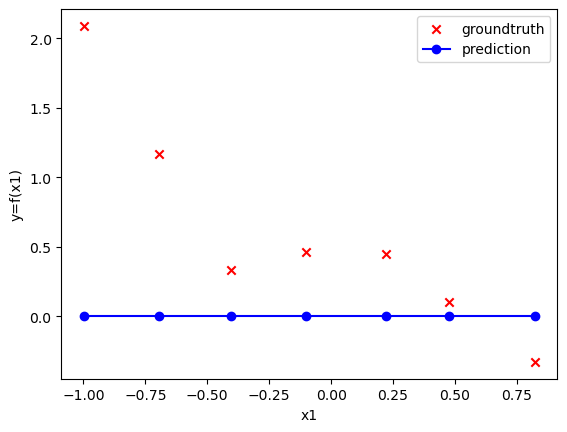

Minimum cost: 0.9081818035670689
Testing model with LR 1e-09 and weight decay: 1e-09
tensor([[2.4482e-07],
        [1.3580e-07],
        [8.8885e-08],
        [6.5965e-08],
        [5.2203e-08],
        [4.3934e-08],
        [2.8204e-08]])


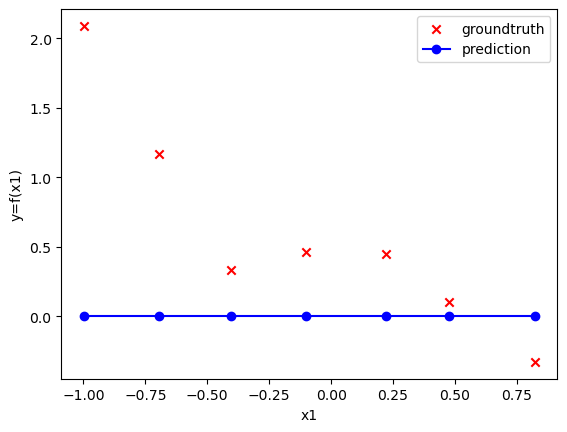

Minimum cost: 0.9081818035670689
Testing model with LR 1e-09 and weight decay: 1e-10
tensor([[2.4482e-07],
        [1.3580e-07],
        [8.8885e-08],
        [6.5965e-08],
        [5.2203e-08],
        [4.3934e-08],
        [2.8204e-08]])


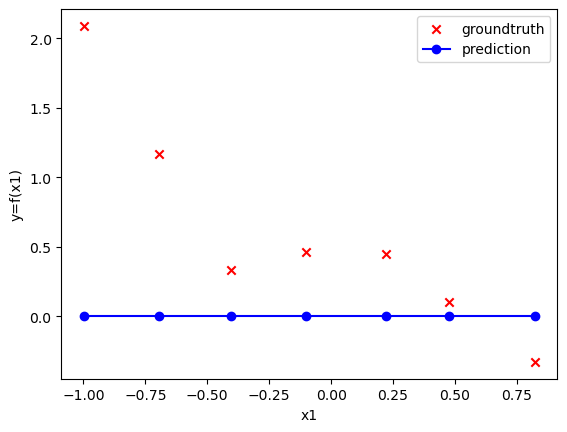

Minimum cost: 0.9081818035670689
Testing model with LR 1e-09 and weight decay: 1e-11
tensor([[2.4482e-07],
        [1.3580e-07],
        [8.8885e-08],
        [6.5965e-08],
        [5.2203e-08],
        [4.3934e-08],
        [2.8204e-08]])


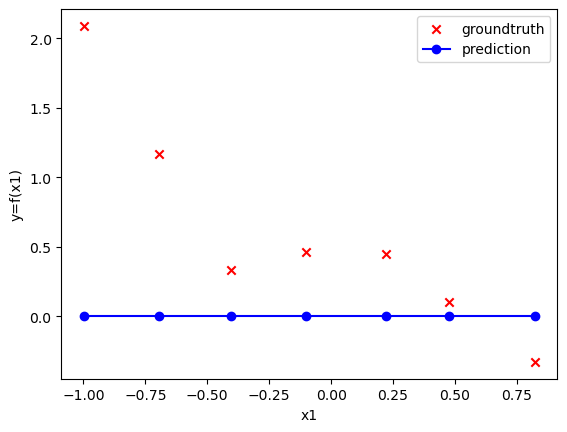

Minimum cost: 0.9081818035670689
Testing model with LR 1e-09 and weight decay: 1e-12
tensor([[2.4482e-07],
        [1.3580e-07],
        [8.8885e-08],
        [6.5965e-08],
        [5.2203e-08],
        [4.3934e-08],
        [2.8204e-08]])


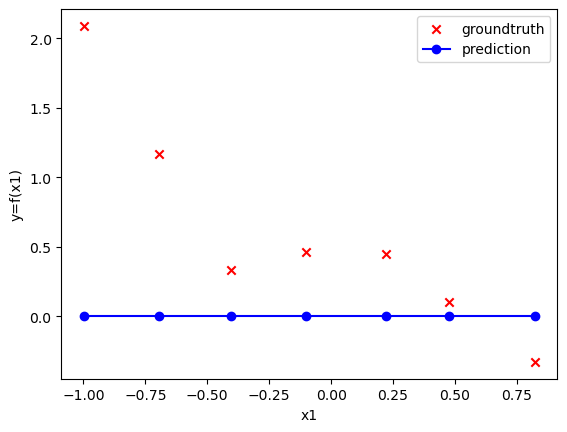

Minimum cost: 0.9081818035670689
Testing model with LR 1e-09 and weight decay: 1e-13
tensor([[2.4482e-07],
        [1.3580e-07],
        [8.8885e-08],
        [6.5965e-08],
        [5.2203e-08],
        [4.3934e-08],
        [2.8204e-08]])


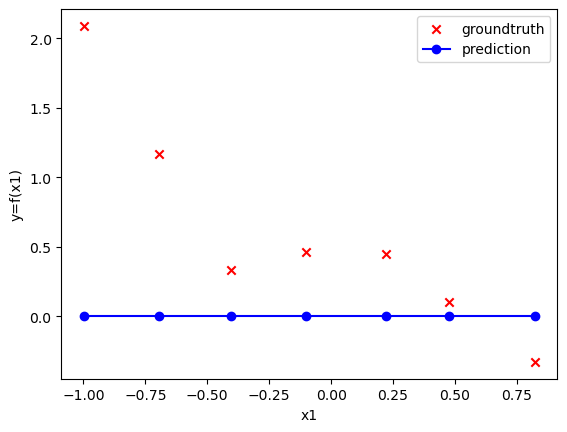

Minimum cost: 0.9081818035670689
Testing model with LR 1e-09 and weight decay: 1e-14
tensor([[2.4482e-07],
        [1.3580e-07],
        [8.8885e-08],
        [6.5965e-08],
        [5.2203e-08],
        [4.3934e-08],
        [2.8204e-08]])


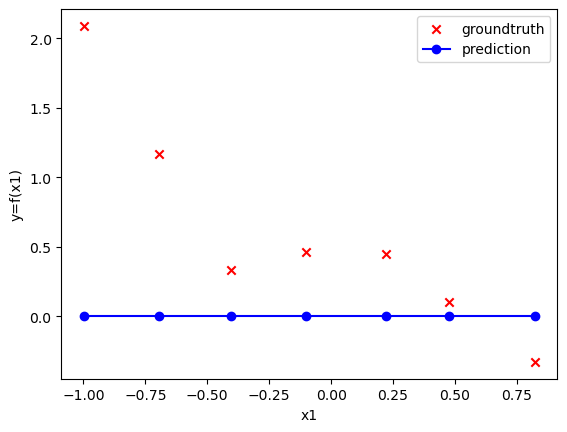

Minimum cost: 0.9081819398062569
Testing model with LR 1e-10 and weight decay: 1
tensor([[2.4482e-08],
        [1.3580e-08],
        [8.8885e-09],
        [6.5965e-09],
        [5.2203e-09],
        [4.3934e-09],
        [2.8204e-09]])


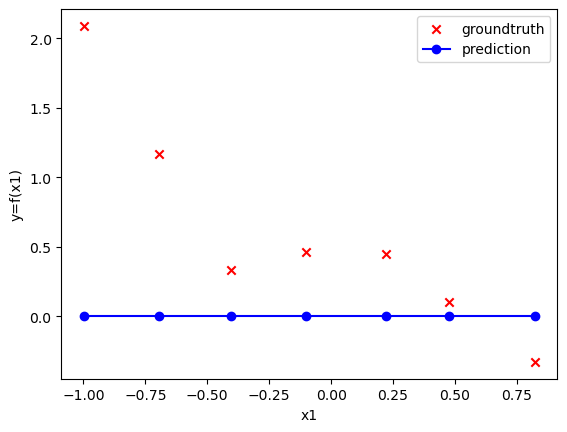

Minimum cost: 0.9081819398062569
Testing model with LR 1e-10 and weight decay: 0.1
tensor([[2.4482e-08],
        [1.3580e-08],
        [8.8885e-09],
        [6.5965e-09],
        [5.2203e-09],
        [4.3934e-09],
        [2.8204e-09]])


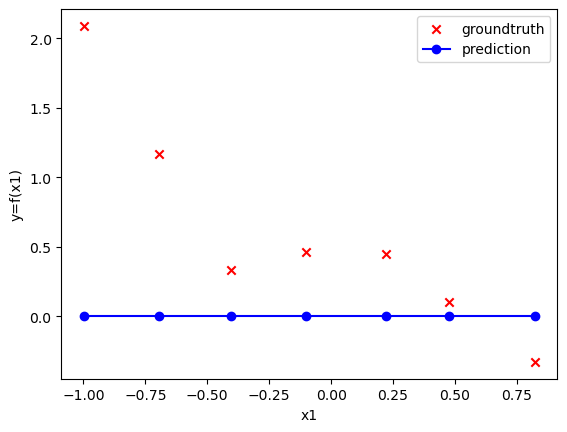

Minimum cost: 0.9081819398062569
Testing model with LR 1e-10 and weight decay: 0.01
tensor([[2.4482e-08],
        [1.3580e-08],
        [8.8885e-09],
        [6.5965e-09],
        [5.2203e-09],
        [4.3934e-09],
        [2.8204e-09]])


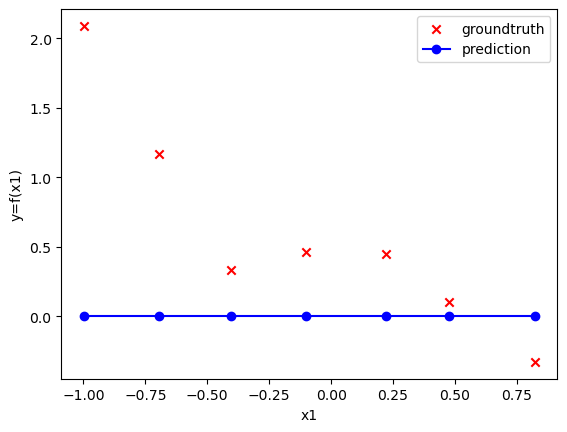

Minimum cost: 0.9081819398062569
Testing model with LR 1e-10 and weight decay: 0.001
tensor([[2.4482e-08],
        [1.3580e-08],
        [8.8885e-09],
        [6.5965e-09],
        [5.2203e-09],
        [4.3934e-09],
        [2.8204e-09]])


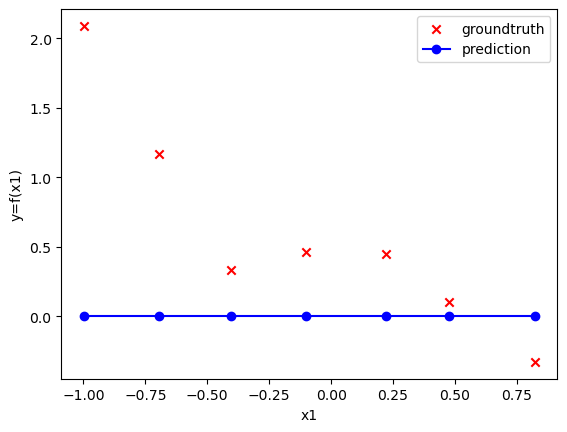

Minimum cost: 0.9081819398062569
Testing model with LR 1e-10 and weight decay: 0.0001
tensor([[2.4482e-08],
        [1.3580e-08],
        [8.8885e-09],
        [6.5965e-09],
        [5.2203e-09],
        [4.3934e-09],
        [2.8204e-09]])


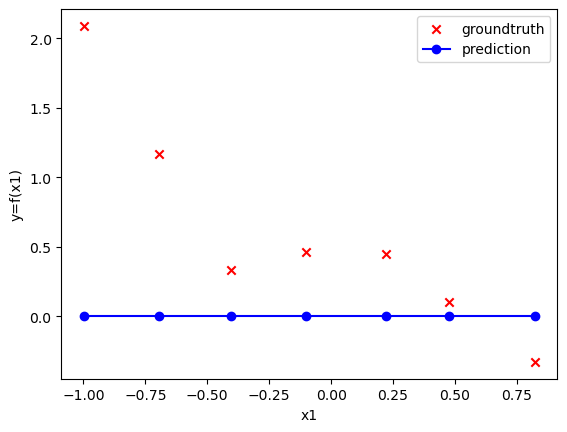

Minimum cost: 0.9081819398062569
Testing model with LR 1e-10 and weight decay: 1e-05
tensor([[2.4482e-08],
        [1.3580e-08],
        [8.8885e-09],
        [6.5965e-09],
        [5.2203e-09],
        [4.3934e-09],
        [2.8204e-09]])


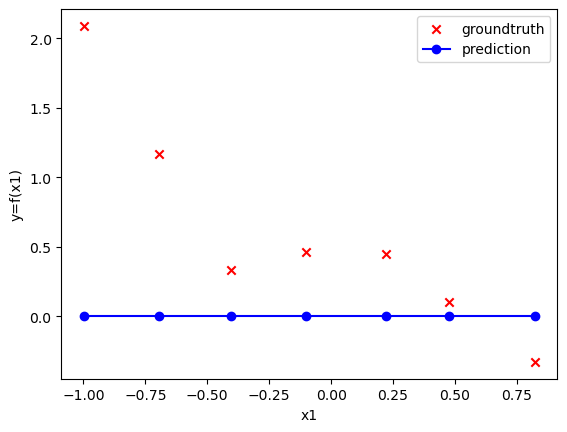

Minimum cost: 0.9081819398062569
Testing model with LR 1e-10 and weight decay: 1e-06
tensor([[2.4482e-08],
        [1.3580e-08],
        [8.8885e-09],
        [6.5965e-09],
        [5.2203e-09],
        [4.3934e-09],
        [2.8204e-09]])


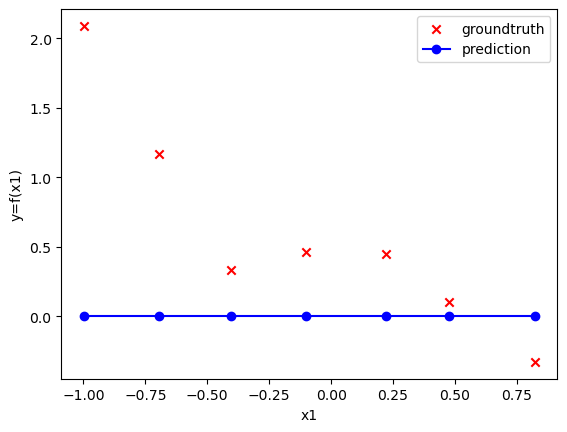

Minimum cost: 0.9081819398062569
Testing model with LR 1e-10 and weight decay: 1e-07
tensor([[2.4482e-08],
        [1.3580e-08],
        [8.8885e-09],
        [6.5965e-09],
        [5.2203e-09],
        [4.3934e-09],
        [2.8204e-09]])


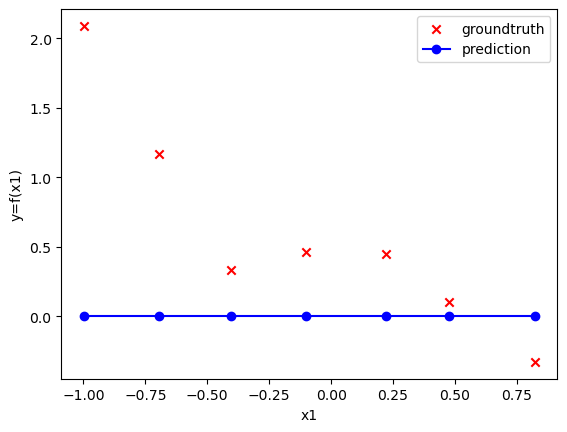

Minimum cost: 0.9081819398062569
Testing model with LR 1e-10 and weight decay: 1e-08
tensor([[2.4482e-08],
        [1.3580e-08],
        [8.8885e-09],
        [6.5965e-09],
        [5.2203e-09],
        [4.3934e-09],
        [2.8204e-09]])


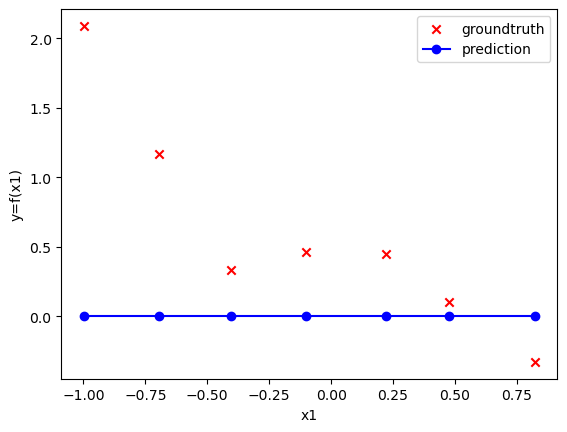

Minimum cost: 0.9081819398062569
Testing model with LR 1e-10 and weight decay: 1e-09
tensor([[2.4482e-08],
        [1.3580e-08],
        [8.8885e-09],
        [6.5965e-09],
        [5.2203e-09],
        [4.3934e-09],
        [2.8204e-09]])


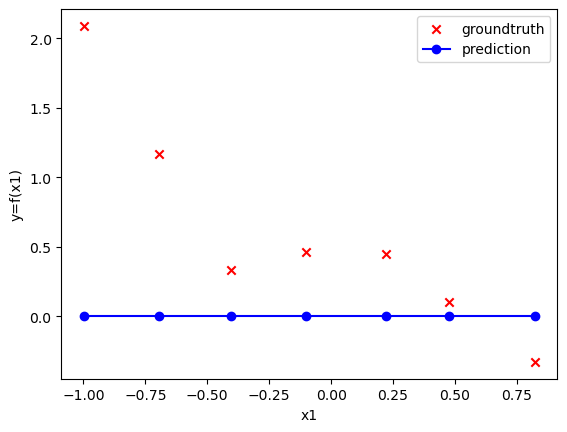

Minimum cost: 0.9081819398062569
Testing model with LR 1e-10 and weight decay: 1e-10
tensor([[2.4482e-08],
        [1.3580e-08],
        [8.8885e-09],
        [6.5965e-09],
        [5.2203e-09],
        [4.3934e-09],
        [2.8204e-09]])


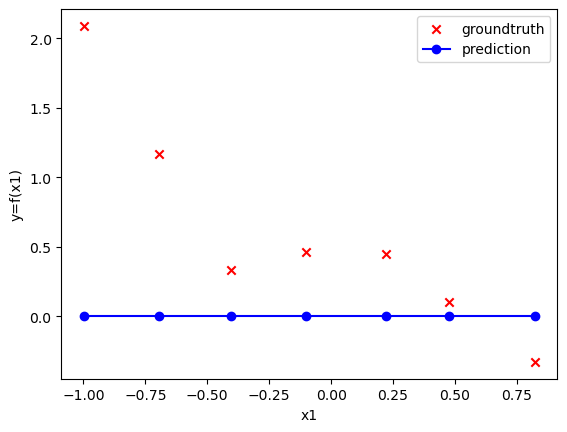

Minimum cost: 0.9081819398062569
Testing model with LR 1e-10 and weight decay: 1e-11
tensor([[2.4482e-08],
        [1.3580e-08],
        [8.8885e-09],
        [6.5965e-09],
        [5.2203e-09],
        [4.3934e-09],
        [2.8204e-09]])


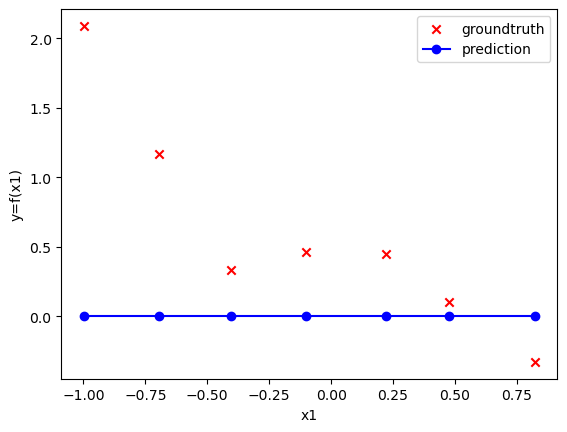

Minimum cost: 0.9081819398062569
Testing model with LR 1e-10 and weight decay: 1e-12
tensor([[2.4482e-08],
        [1.3580e-08],
        [8.8885e-09],
        [6.5965e-09],
        [5.2203e-09],
        [4.3934e-09],
        [2.8204e-09]])


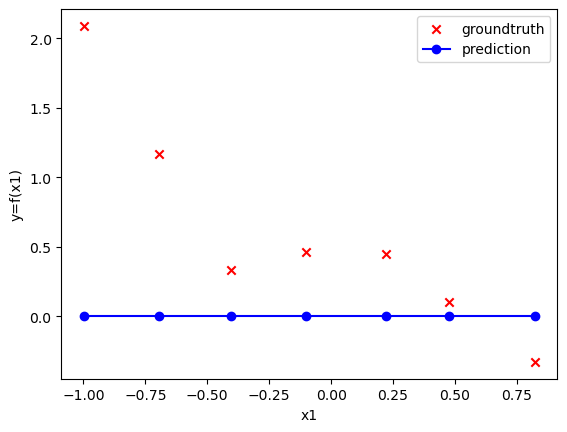

Minimum cost: 0.9081819398062569
Testing model with LR 1e-10 and weight decay: 1e-13
tensor([[2.4482e-08],
        [1.3580e-08],
        [8.8885e-09],
        [6.5965e-09],
        [5.2203e-09],
        [4.3934e-09],
        [2.8204e-09]])


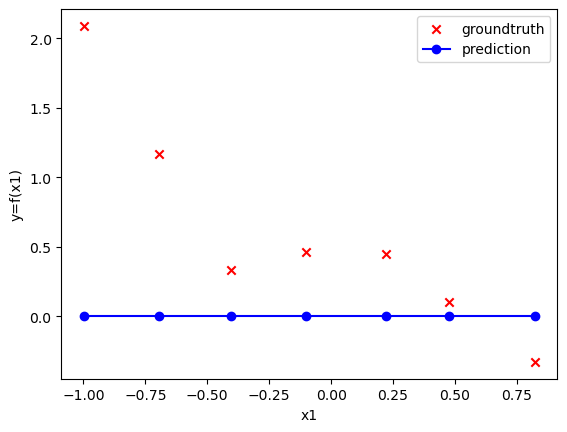

Minimum cost: 0.9081819398062569
Testing model with LR 1e-10 and weight decay: 1e-14
tensor([[2.4482e-08],
        [1.3580e-08],
        [8.8885e-09],
        [6.5965e-09],
        [5.2203e-09],
        [4.3934e-09],
        [2.8204e-09]])


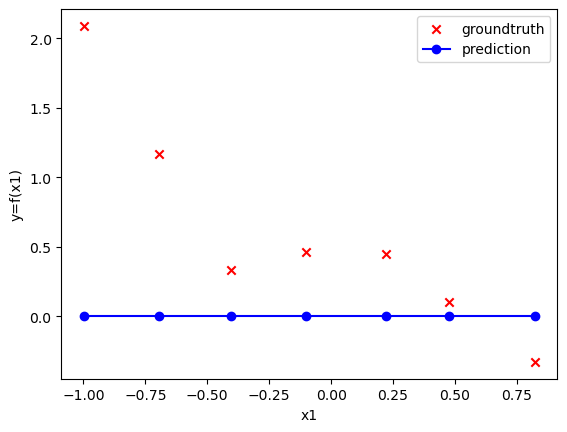

Minimum cost: 0.9081819398062569
Testing model with LR 1e-11 and weight decay: 1
tensor([[2.4482e-09],
        [1.3580e-09],
        [8.8885e-10],
        [6.5965e-10],
        [5.2203e-10],
        [4.3934e-10],
        [2.8204e-10]])


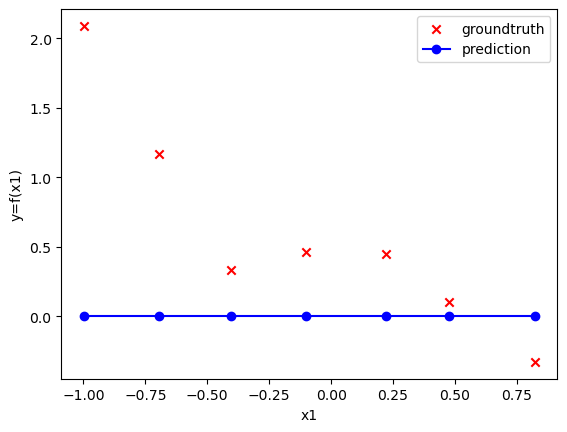

Minimum cost: 0.9081819398062569
Testing model with LR 1e-11 and weight decay: 0.1
tensor([[2.4482e-09],
        [1.3580e-09],
        [8.8885e-10],
        [6.5965e-10],
        [5.2203e-10],
        [4.3934e-10],
        [2.8204e-10]])


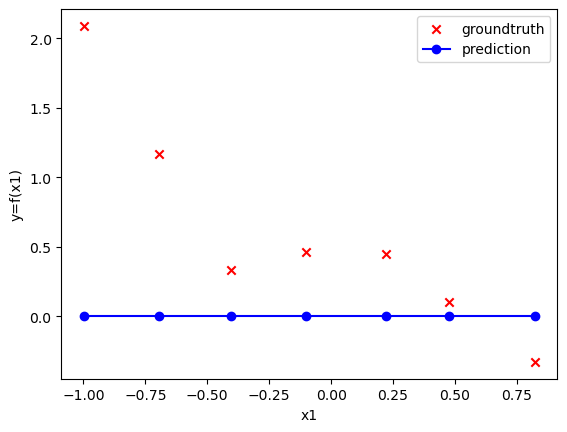

Minimum cost: 0.9081819398062569
Testing model with LR 1e-11 and weight decay: 0.01
tensor([[2.4482e-09],
        [1.3580e-09],
        [8.8885e-10],
        [6.5965e-10],
        [5.2203e-10],
        [4.3934e-10],
        [2.8204e-10]])


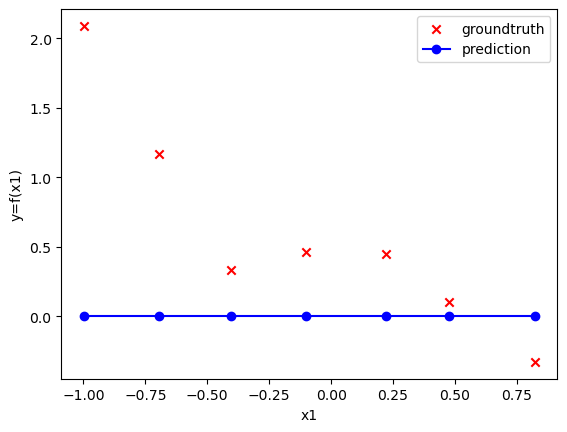

Minimum cost: 0.9081819398062569
Testing model with LR 1e-11 and weight decay: 0.001
tensor([[2.4482e-09],
        [1.3580e-09],
        [8.8885e-10],
        [6.5965e-10],
        [5.2203e-10],
        [4.3934e-10],
        [2.8204e-10]])


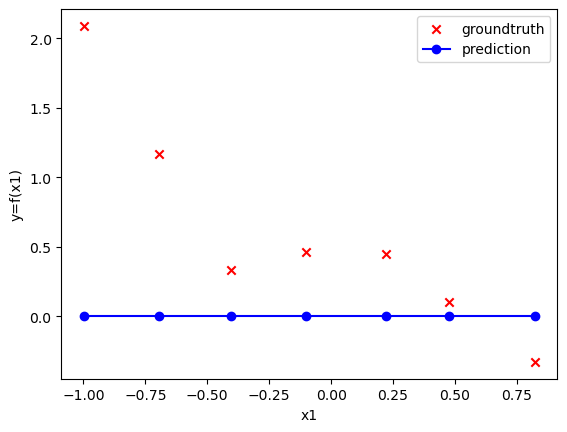

Minimum cost: 0.9081819398062569
Testing model with LR 1e-11 and weight decay: 0.0001
tensor([[2.4482e-09],
        [1.3580e-09],
        [8.8885e-10],
        [6.5965e-10],
        [5.2203e-10],
        [4.3934e-10],
        [2.8204e-10]])


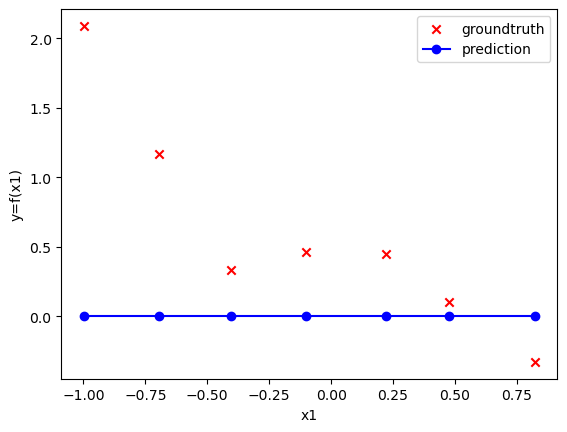

Minimum cost: 0.9081819398062569
Testing model with LR 1e-11 and weight decay: 1e-05
tensor([[2.4482e-09],
        [1.3580e-09],
        [8.8885e-10],
        [6.5965e-10],
        [5.2203e-10],
        [4.3934e-10],
        [2.8204e-10]])


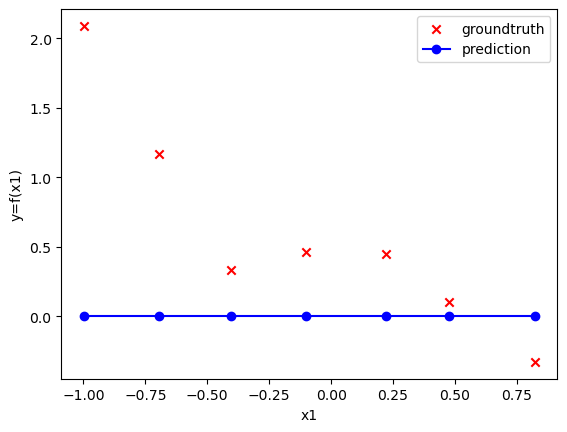

Minimum cost: 0.9081819398062569
Testing model with LR 1e-11 and weight decay: 1e-06
tensor([[2.4482e-09],
        [1.3580e-09],
        [8.8885e-10],
        [6.5965e-10],
        [5.2203e-10],
        [4.3934e-10],
        [2.8204e-10]])


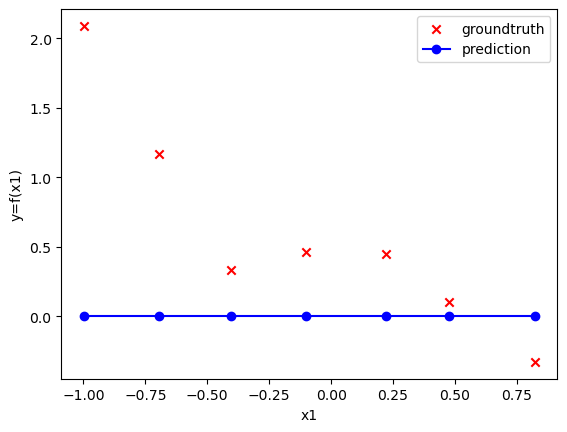

Minimum cost: 0.9081819398062569
Testing model with LR 1e-11 and weight decay: 1e-07
tensor([[2.4482e-09],
        [1.3580e-09],
        [8.8885e-10],
        [6.5965e-10],
        [5.2203e-10],
        [4.3934e-10],
        [2.8204e-10]])


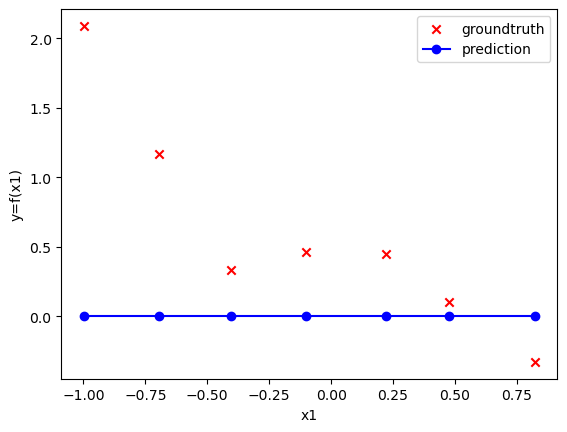

Minimum cost: 0.9081819398062569
Testing model with LR 1e-11 and weight decay: 1e-08
tensor([[2.4482e-09],
        [1.3580e-09],
        [8.8885e-10],
        [6.5965e-10],
        [5.2203e-10],
        [4.3934e-10],
        [2.8204e-10]])


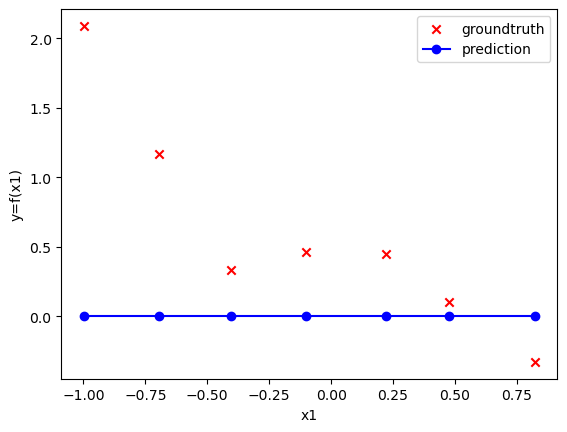

Minimum cost: 0.9081819398062569
Testing model with LR 1e-11 and weight decay: 1e-09
tensor([[2.4482e-09],
        [1.3580e-09],
        [8.8885e-10],
        [6.5965e-10],
        [5.2203e-10],
        [4.3934e-10],
        [2.8204e-10]])


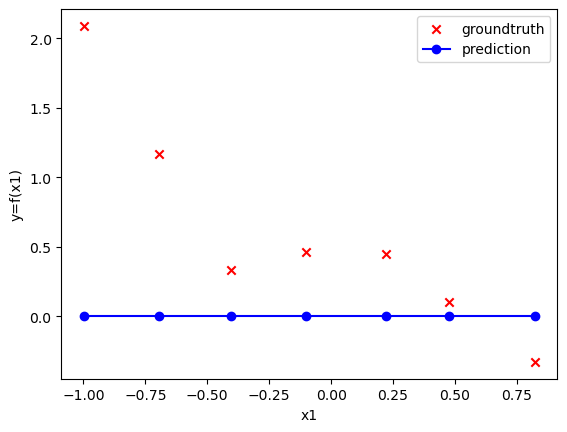

Minimum cost: 0.9081819398062569
Testing model with LR 1e-11 and weight decay: 1e-10
tensor([[2.4482e-09],
        [1.3580e-09],
        [8.8885e-10],
        [6.5965e-10],
        [5.2203e-10],
        [4.3934e-10],
        [2.8204e-10]])


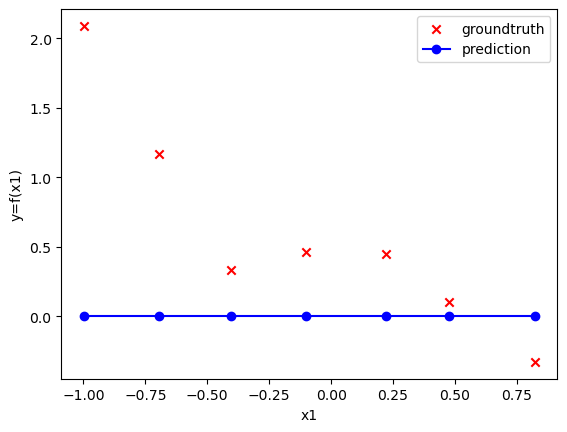

Minimum cost: 0.9081819398062569
Testing model with LR 1e-11 and weight decay: 1e-11
tensor([[2.4482e-09],
        [1.3580e-09],
        [8.8885e-10],
        [6.5965e-10],
        [5.2203e-10],
        [4.3934e-10],
        [2.8204e-10]])


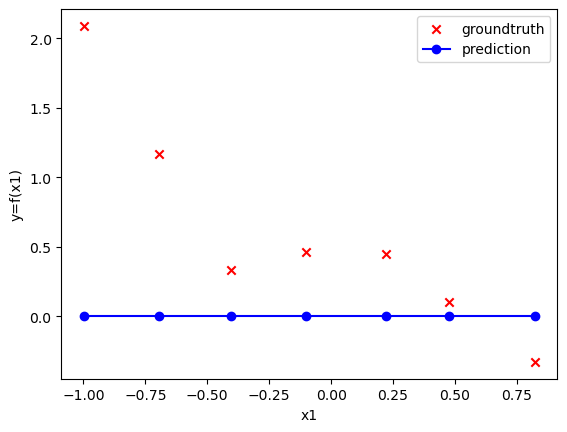

Minimum cost: 0.9081819398062569
Testing model with LR 1e-11 and weight decay: 1e-12
tensor([[2.4482e-09],
        [1.3580e-09],
        [8.8885e-10],
        [6.5965e-10],
        [5.2203e-10],
        [4.3934e-10],
        [2.8204e-10]])


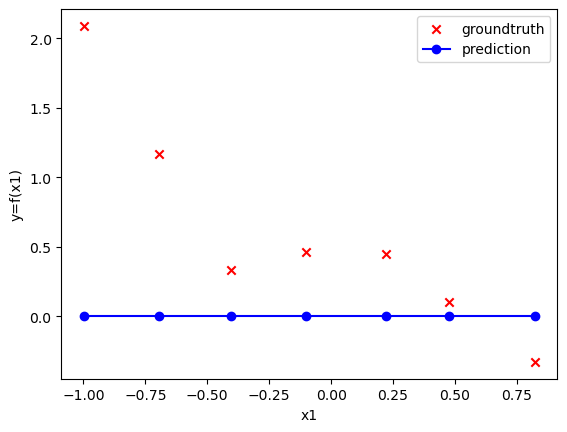

Minimum cost: 0.9081819398062569
Testing model with LR 1e-11 and weight decay: 1e-13
tensor([[2.4482e-09],
        [1.3580e-09],
        [8.8885e-10],
        [6.5965e-10],
        [5.2203e-10],
        [4.3934e-10],
        [2.8204e-10]])


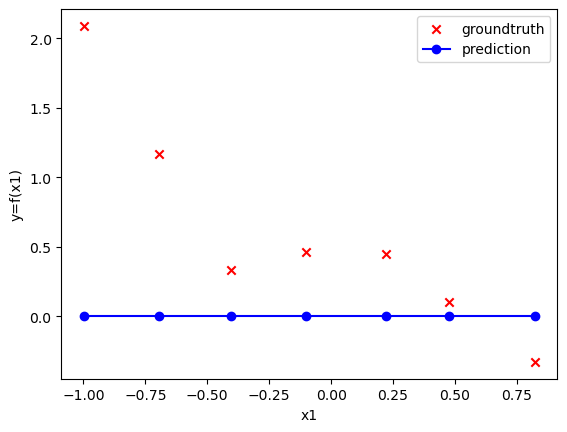

Minimum cost: 0.9081819398062569
Testing model with LR 1e-11 and weight decay: 1e-14
tensor([[2.4482e-09],
        [1.3580e-09],
        [8.8885e-10],
        [6.5965e-10],
        [5.2203e-10],
        [4.3934e-10],
        [2.8204e-10]])


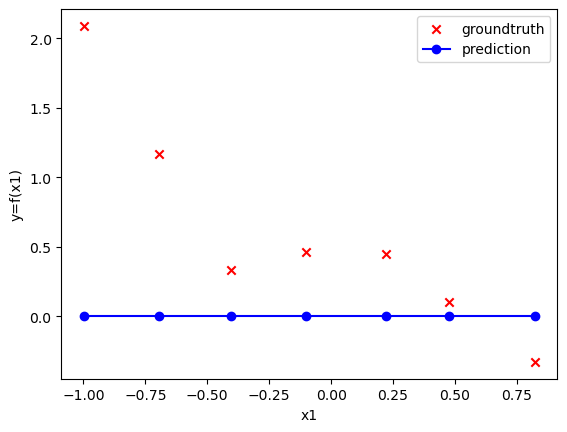

Minimum cost: 0.9081819398062569
Testing model with LR 1e-12 and weight decay: 1
tensor([[2.4482e-10],
        [1.3580e-10],
        [8.8885e-11],
        [6.5965e-11],
        [5.2203e-11],
        [4.3934e-11],
        [2.8204e-11]])


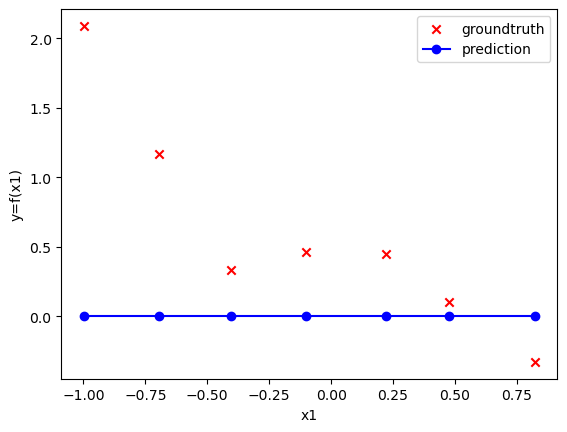

Minimum cost: 0.9081819398062569
Testing model with LR 1e-12 and weight decay: 0.1
tensor([[2.4482e-10],
        [1.3580e-10],
        [8.8885e-11],
        [6.5965e-11],
        [5.2203e-11],
        [4.3934e-11],
        [2.8204e-11]])


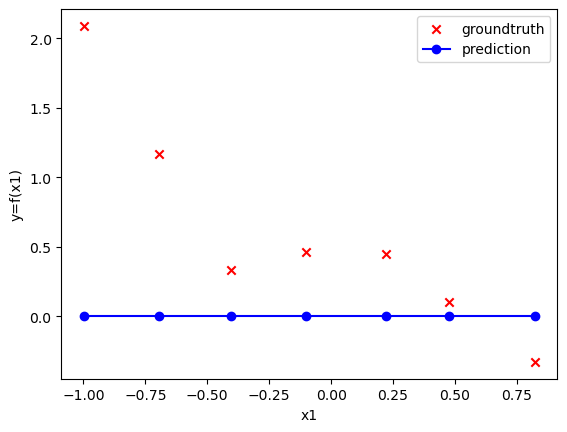

Minimum cost: 0.9081819398062569
Testing model with LR 1e-12 and weight decay: 0.01
tensor([[2.4482e-10],
        [1.3580e-10],
        [8.8885e-11],
        [6.5965e-11],
        [5.2203e-11],
        [4.3934e-11],
        [2.8204e-11]])


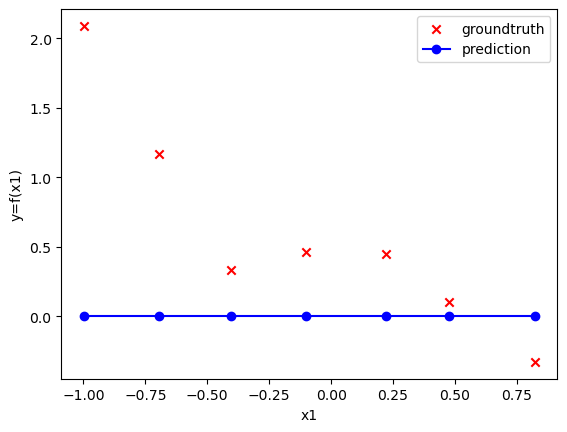

Minimum cost: 0.9081819398062569
Testing model with LR 1e-12 and weight decay: 0.001
tensor([[2.4482e-10],
        [1.3580e-10],
        [8.8885e-11],
        [6.5965e-11],
        [5.2203e-11],
        [4.3934e-11],
        [2.8204e-11]])


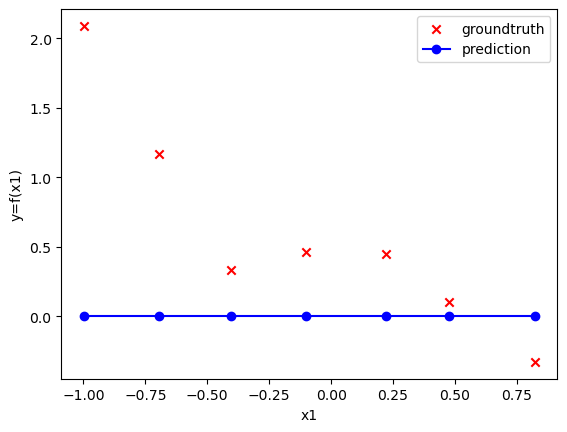

Minimum cost: 0.9081819398062569
Testing model with LR 1e-12 and weight decay: 0.0001
tensor([[2.4482e-10],
        [1.3580e-10],
        [8.8885e-11],
        [6.5965e-11],
        [5.2203e-11],
        [4.3934e-11],
        [2.8204e-11]])


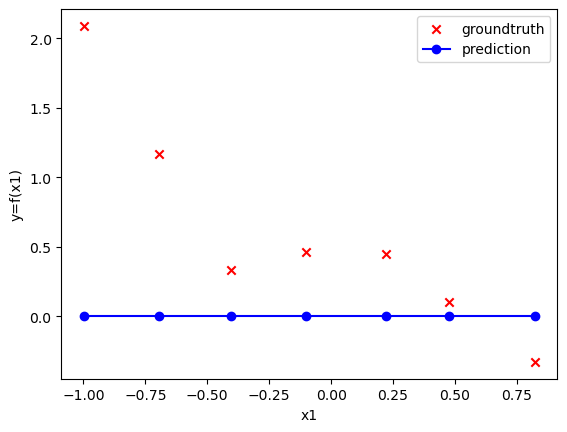

Minimum cost: 0.9081819398062569
Testing model with LR 1e-12 and weight decay: 1e-05
tensor([[2.4482e-10],
        [1.3580e-10],
        [8.8885e-11],
        [6.5965e-11],
        [5.2203e-11],
        [4.3934e-11],
        [2.8204e-11]])


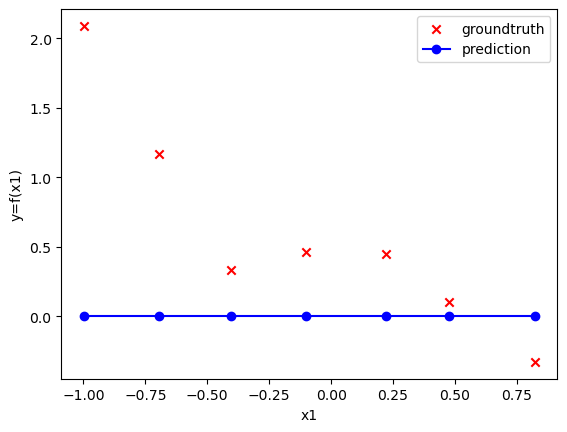

Minimum cost: 0.9081819398062569
Testing model with LR 1e-12 and weight decay: 1e-06
tensor([[2.4482e-10],
        [1.3580e-10],
        [8.8885e-11],
        [6.5965e-11],
        [5.2203e-11],
        [4.3934e-11],
        [2.8204e-11]])


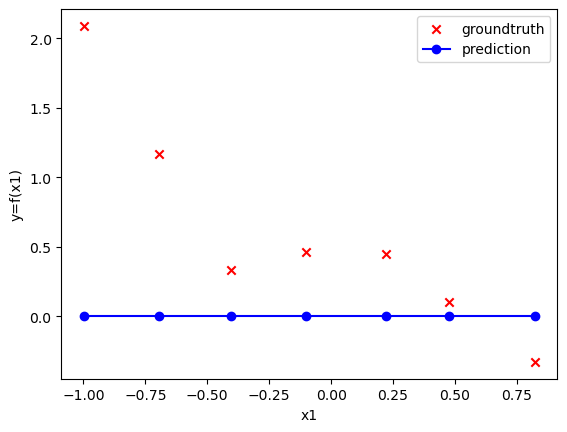

Minimum cost: 0.9081819398062569
Testing model with LR 1e-12 and weight decay: 1e-07
tensor([[2.4482e-10],
        [1.3580e-10],
        [8.8885e-11],
        [6.5965e-11],
        [5.2203e-11],
        [4.3934e-11],
        [2.8204e-11]])


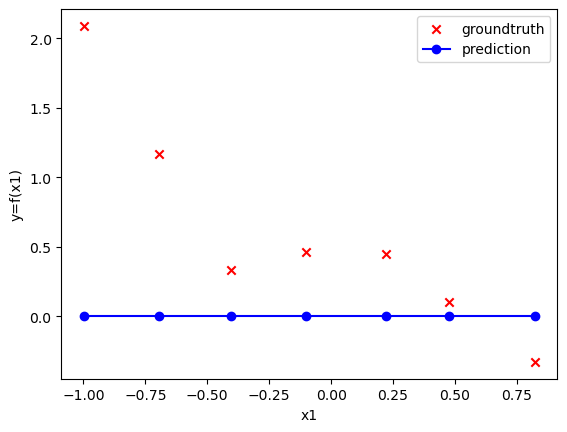

Minimum cost: 0.9081819398062569
Testing model with LR 1e-12 and weight decay: 1e-08
tensor([[2.4482e-10],
        [1.3580e-10],
        [8.8885e-11],
        [6.5965e-11],
        [5.2203e-11],
        [4.3934e-11],
        [2.8204e-11]])


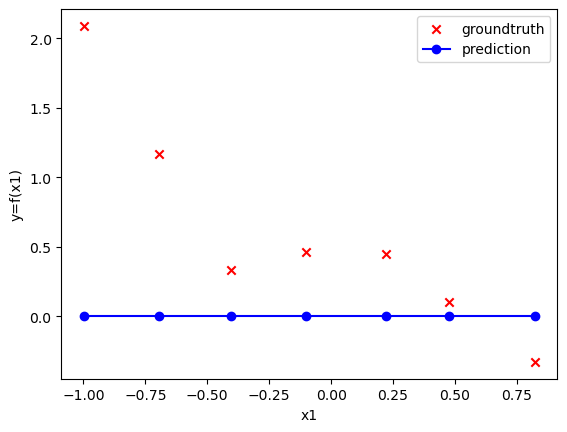

Minimum cost: 0.9081819398062569
Testing model with LR 1e-12 and weight decay: 1e-09
tensor([[2.4482e-10],
        [1.3580e-10],
        [8.8885e-11],
        [6.5965e-11],
        [5.2203e-11],
        [4.3934e-11],
        [2.8204e-11]])


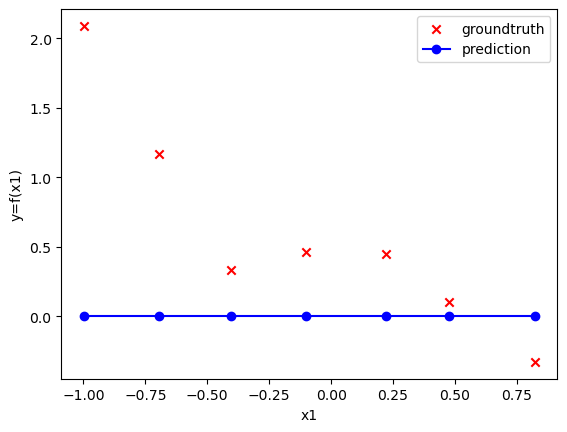

Minimum cost: 0.9081819398062569
Testing model with LR 1e-12 and weight decay: 1e-10
tensor([[2.4482e-10],
        [1.3580e-10],
        [8.8885e-11],
        [6.5965e-11],
        [5.2203e-11],
        [4.3934e-11],
        [2.8204e-11]])


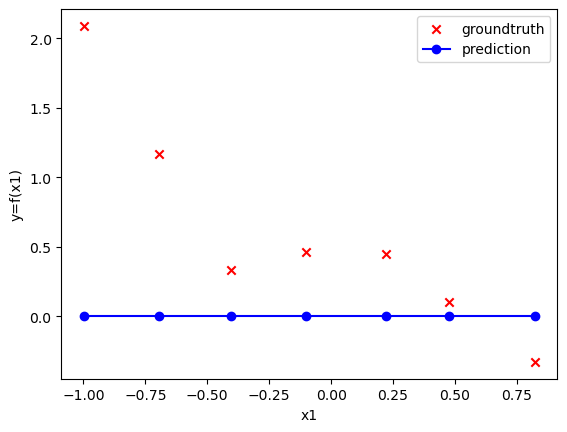

Minimum cost: 0.9081819398062569
Testing model with LR 1e-12 and weight decay: 1e-11
tensor([[2.4482e-10],
        [1.3580e-10],
        [8.8885e-11],
        [6.5965e-11],
        [5.2203e-11],
        [4.3934e-11],
        [2.8204e-11]])


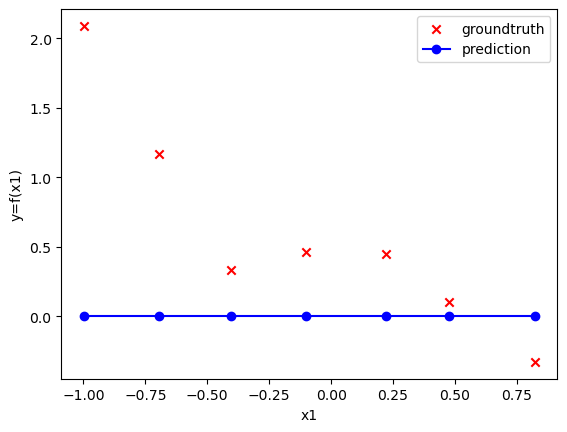

Minimum cost: 0.9081819398062569
Testing model with LR 1e-12 and weight decay: 1e-12
tensor([[2.4482e-10],
        [1.3580e-10],
        [8.8885e-11],
        [6.5965e-11],
        [5.2203e-11],
        [4.3934e-11],
        [2.8204e-11]])


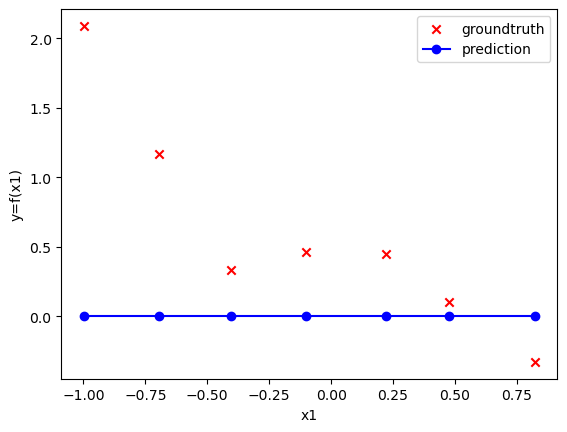

Minimum cost: 0.9081819398062569
Testing model with LR 1e-12 and weight decay: 1e-13
tensor([[2.4482e-10],
        [1.3580e-10],
        [8.8885e-11],
        [6.5965e-11],
        [5.2203e-11],
        [4.3934e-11],
        [2.8204e-11]])


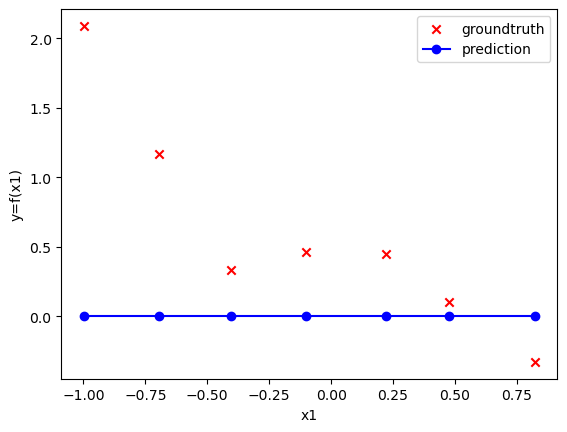

Minimum cost: 0.9081819398062569
Testing model with LR 1e-12 and weight decay: 1e-14
tensor([[2.4482e-10],
        [1.3580e-10],
        [8.8885e-11],
        [6.5965e-11],
        [5.2203e-11],
        [4.3934e-11],
        [2.8204e-11]])


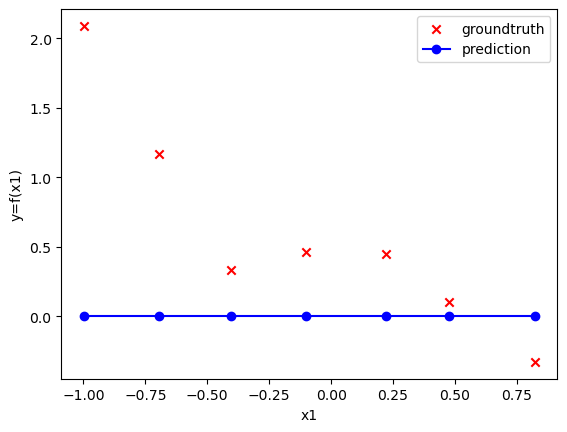

Minimum cost: 0.9081819398062569
Testing model with LR 1e-13 and weight decay: 1
tensor([[2.4482e-11],
        [1.3580e-11],
        [8.8885e-12],
        [6.5965e-12],
        [5.2203e-12],
        [4.3934e-12],
        [2.8204e-12]])


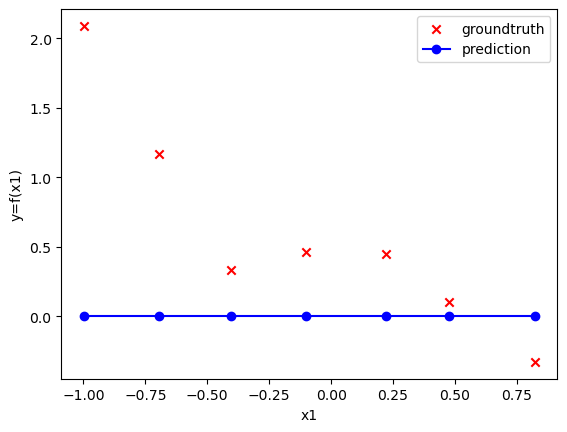

Minimum cost: 0.9081819398062569
Testing model with LR 1e-13 and weight decay: 0.1
tensor([[2.4482e-11],
        [1.3580e-11],
        [8.8885e-12],
        [6.5965e-12],
        [5.2203e-12],
        [4.3934e-12],
        [2.8204e-12]])


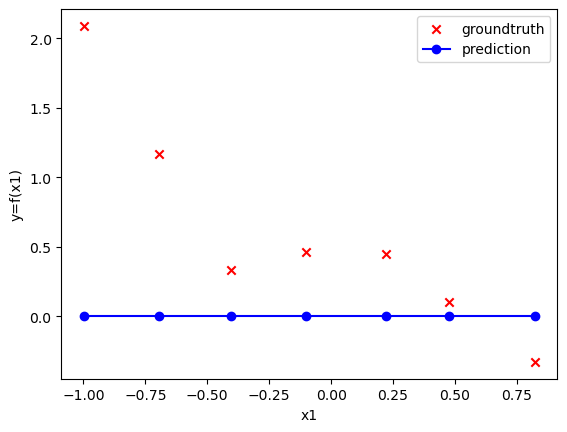

Minimum cost: 0.9081819398062569
Testing model with LR 1e-13 and weight decay: 0.01
tensor([[2.4482e-11],
        [1.3580e-11],
        [8.8885e-12],
        [6.5965e-12],
        [5.2203e-12],
        [4.3934e-12],
        [2.8204e-12]])


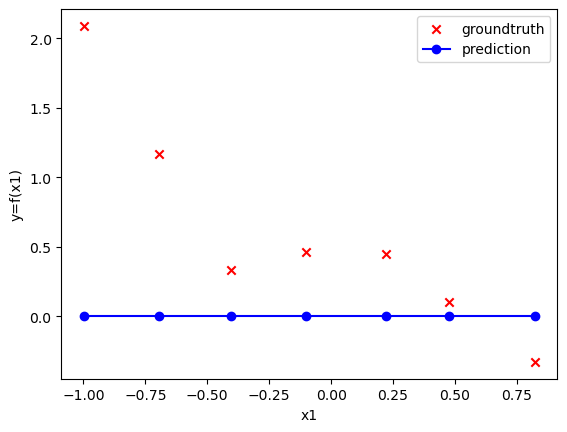

Minimum cost: 0.9081819398062569
Testing model with LR 1e-13 and weight decay: 0.001
tensor([[2.4482e-11],
        [1.3580e-11],
        [8.8885e-12],
        [6.5965e-12],
        [5.2203e-12],
        [4.3934e-12],
        [2.8204e-12]])


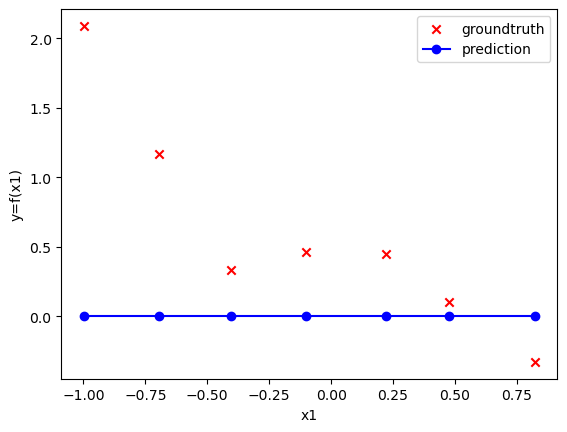

Minimum cost: 0.9081819398062569
Testing model with LR 1e-13 and weight decay: 0.0001
tensor([[2.4482e-11],
        [1.3580e-11],
        [8.8885e-12],
        [6.5965e-12],
        [5.2203e-12],
        [4.3934e-12],
        [2.8204e-12]])


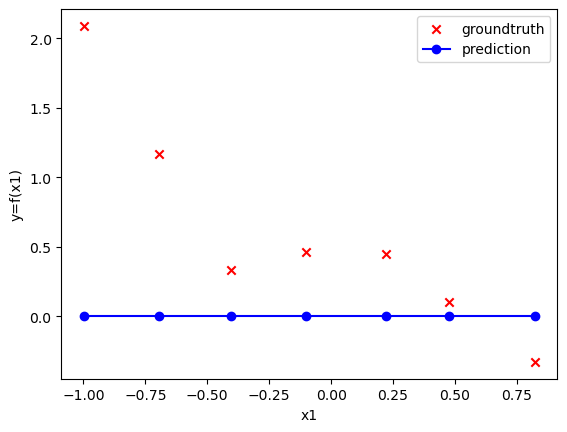

Minimum cost: 0.9081819398062569
Testing model with LR 1e-13 and weight decay: 1e-05
tensor([[2.4482e-11],
        [1.3580e-11],
        [8.8885e-12],
        [6.5965e-12],
        [5.2203e-12],
        [4.3934e-12],
        [2.8204e-12]])


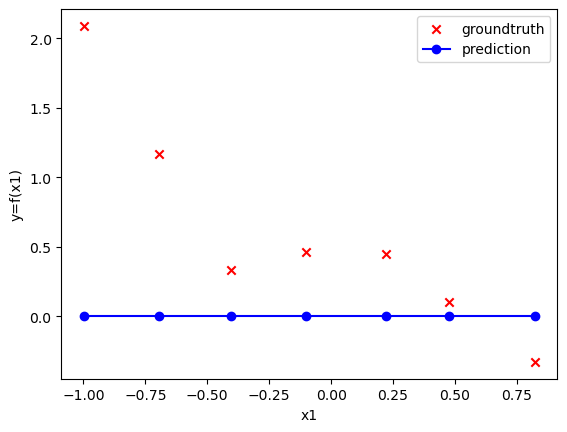

Minimum cost: 0.9081819398062569
Testing model with LR 1e-13 and weight decay: 1e-06
tensor([[2.4482e-11],
        [1.3580e-11],
        [8.8885e-12],
        [6.5965e-12],
        [5.2203e-12],
        [4.3934e-12],
        [2.8204e-12]])


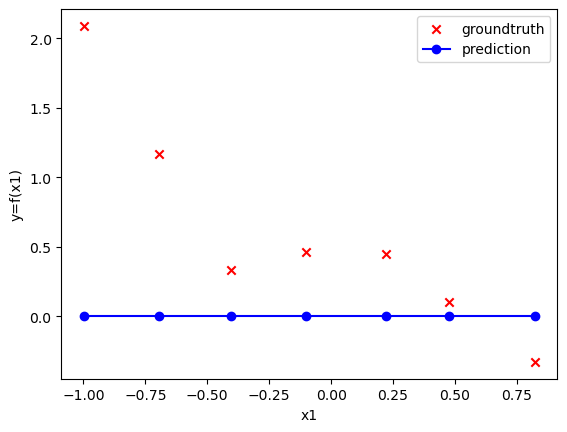

Minimum cost: 0.9081819398062569
Testing model with LR 1e-13 and weight decay: 1e-07
tensor([[2.4482e-11],
        [1.3580e-11],
        [8.8885e-12],
        [6.5965e-12],
        [5.2203e-12],
        [4.3934e-12],
        [2.8204e-12]])


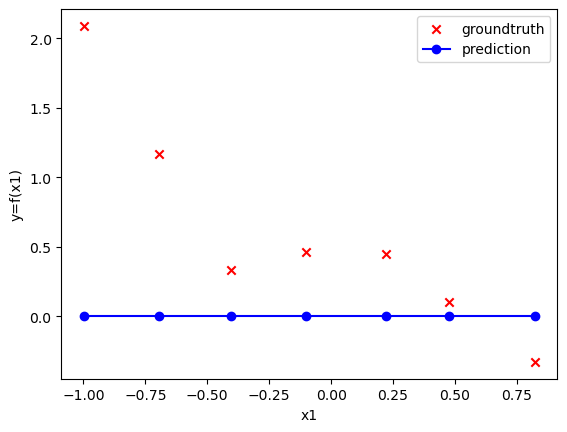

Minimum cost: 0.9081819398062569
Testing model with LR 1e-13 and weight decay: 1e-08
tensor([[2.4482e-11],
        [1.3580e-11],
        [8.8885e-12],
        [6.5965e-12],
        [5.2203e-12],
        [4.3934e-12],
        [2.8204e-12]])


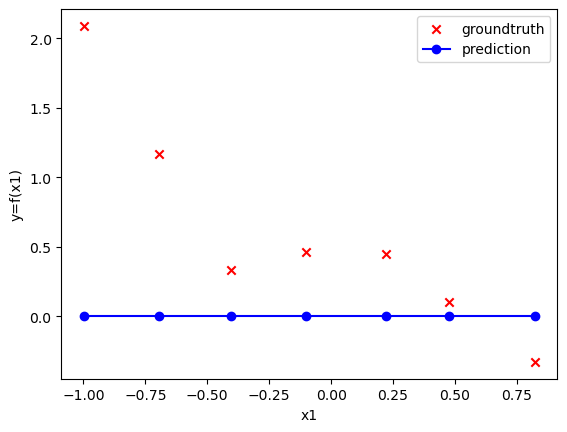

Minimum cost: 0.9081819398062569
Testing model with LR 1e-13 and weight decay: 1e-09
tensor([[2.4482e-11],
        [1.3580e-11],
        [8.8885e-12],
        [6.5965e-12],
        [5.2203e-12],
        [4.3934e-12],
        [2.8204e-12]])


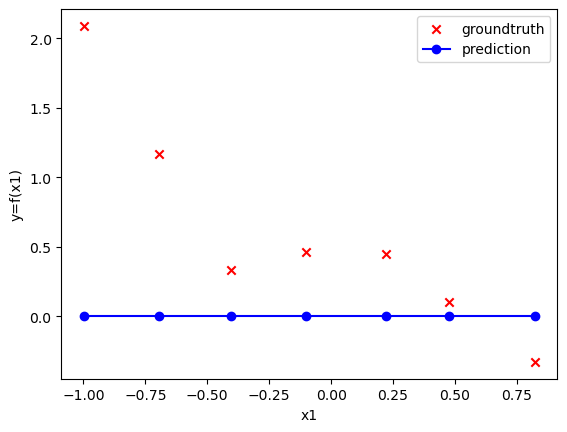

Minimum cost: 0.9081819398062569
Testing model with LR 1e-13 and weight decay: 1e-10
tensor([[2.4482e-11],
        [1.3580e-11],
        [8.8885e-12],
        [6.5965e-12],
        [5.2203e-12],
        [4.3934e-12],
        [2.8204e-12]])


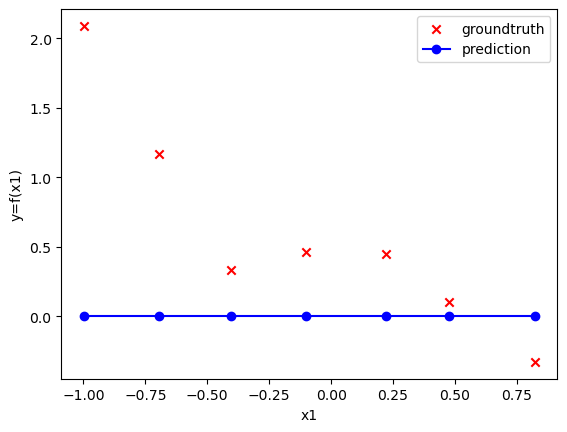

Minimum cost: 0.9081819398062569
Testing model with LR 1e-13 and weight decay: 1e-11
tensor([[2.4482e-11],
        [1.3580e-11],
        [8.8885e-12],
        [6.5965e-12],
        [5.2203e-12],
        [4.3934e-12],
        [2.8204e-12]])


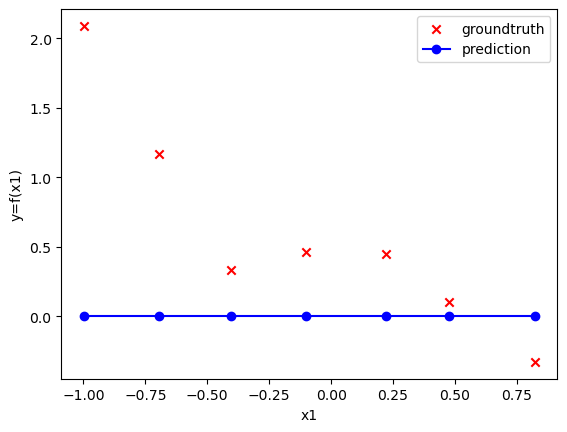

Minimum cost: 0.9081819398062569
Testing model with LR 1e-13 and weight decay: 1e-12
tensor([[2.4482e-11],
        [1.3580e-11],
        [8.8885e-12],
        [6.5965e-12],
        [5.2203e-12],
        [4.3934e-12],
        [2.8204e-12]])


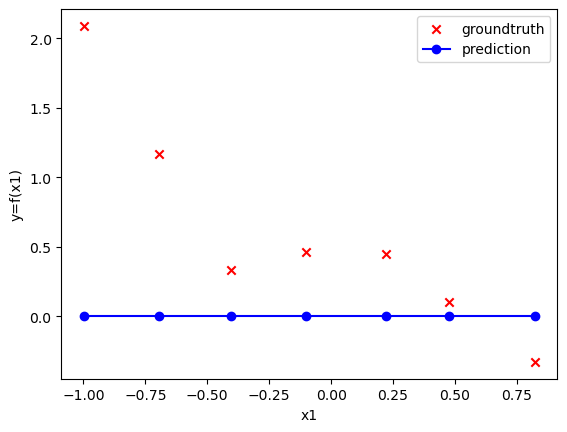

Minimum cost: 0.9081819398062569
Testing model with LR 1e-13 and weight decay: 1e-13
tensor([[2.4482e-11],
        [1.3580e-11],
        [8.8885e-12],
        [6.5965e-12],
        [5.2203e-12],
        [4.3934e-12],
        [2.8204e-12]])


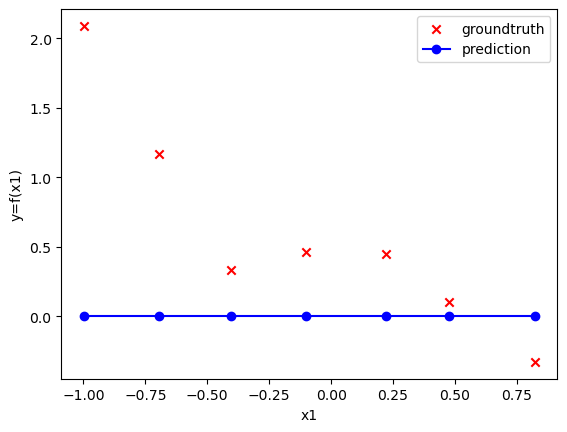

Minimum cost: 0.9081819398062569
Testing model with LR 1e-13 and weight decay: 1e-14
tensor([[2.4482e-11],
        [1.3580e-11],
        [8.8885e-12],
        [6.5965e-12],
        [5.2203e-12],
        [4.3934e-12],
        [2.8204e-12]])


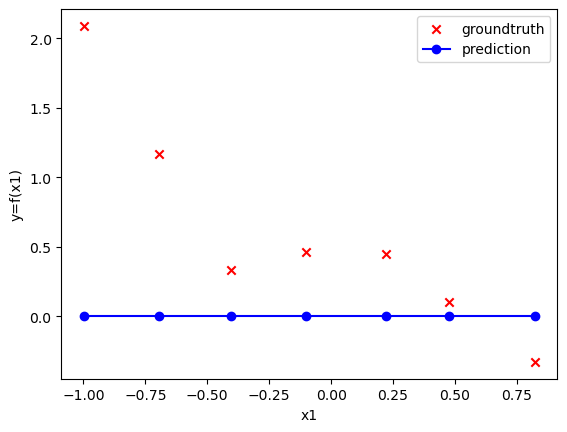

Minimum cost: 0.9081819398062569
Testing model with LR 1e-14 and weight decay: 1
tensor([[2.4482e-12],
        [1.3580e-12],
        [8.8885e-13],
        [6.5965e-13],
        [5.2203e-13],
        [4.3934e-13],
        [2.8204e-13]])


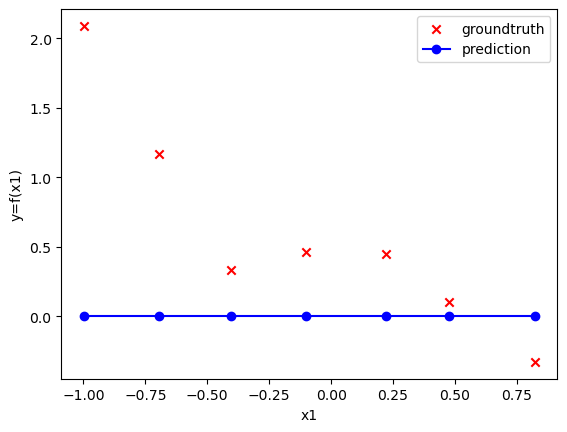

Minimum cost: 0.9081819398062569
Testing model with LR 1e-14 and weight decay: 0.1
tensor([[2.4482e-12],
        [1.3580e-12],
        [8.8885e-13],
        [6.5965e-13],
        [5.2203e-13],
        [4.3934e-13],
        [2.8204e-13]])


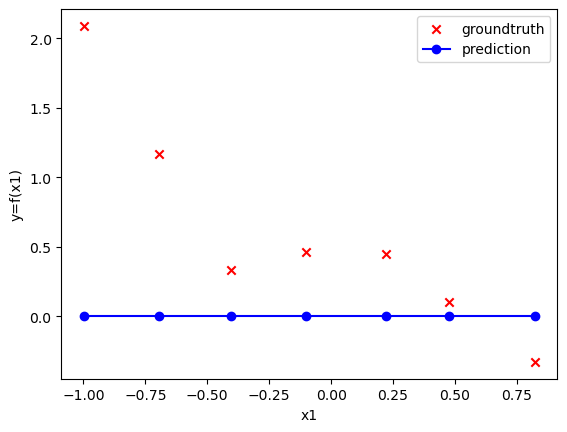

Minimum cost: 0.9081819398062569
Testing model with LR 1e-14 and weight decay: 0.01
tensor([[2.4482e-12],
        [1.3580e-12],
        [8.8885e-13],
        [6.5965e-13],
        [5.2203e-13],
        [4.3934e-13],
        [2.8204e-13]])


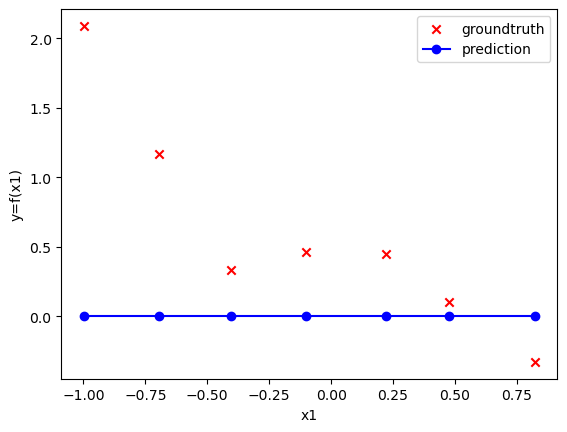

Minimum cost: 0.9081819398062569
Testing model with LR 1e-14 and weight decay: 0.001
tensor([[2.4482e-12],
        [1.3580e-12],
        [8.8885e-13],
        [6.5965e-13],
        [5.2203e-13],
        [4.3934e-13],
        [2.8204e-13]])


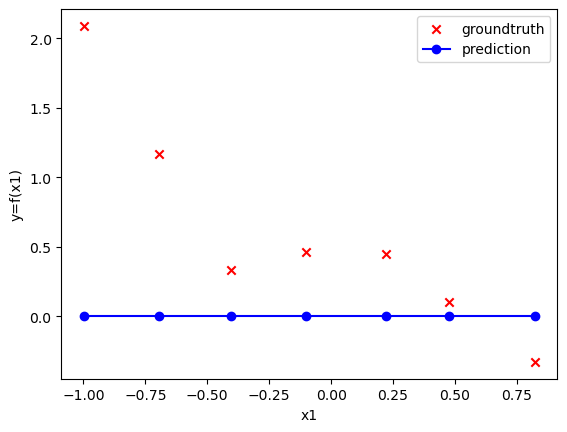

Minimum cost: 0.9081819398062569
Testing model with LR 1e-14 and weight decay: 0.0001
tensor([[2.4482e-12],
        [1.3580e-12],
        [8.8885e-13],
        [6.5965e-13],
        [5.2203e-13],
        [4.3934e-13],
        [2.8204e-13]])


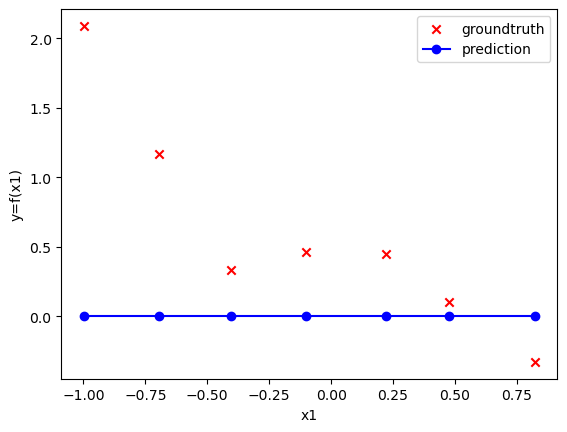

Minimum cost: 0.9081819398062569
Testing model with LR 1e-14 and weight decay: 1e-05
tensor([[2.4482e-12],
        [1.3580e-12],
        [8.8885e-13],
        [6.5965e-13],
        [5.2203e-13],
        [4.3934e-13],
        [2.8204e-13]])


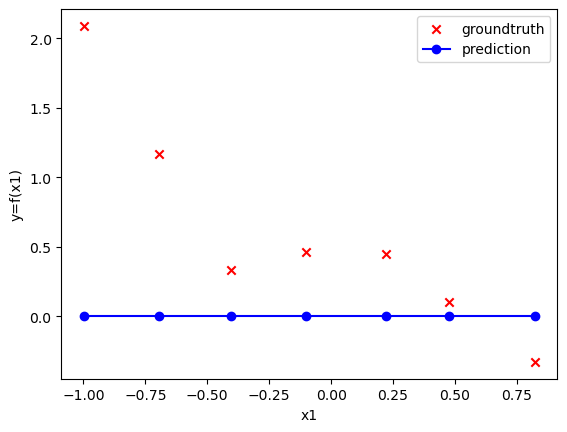

Minimum cost: 0.9081819398062569
Testing model with LR 1e-14 and weight decay: 1e-06
tensor([[2.4482e-12],
        [1.3580e-12],
        [8.8885e-13],
        [6.5965e-13],
        [5.2203e-13],
        [4.3934e-13],
        [2.8204e-13]])


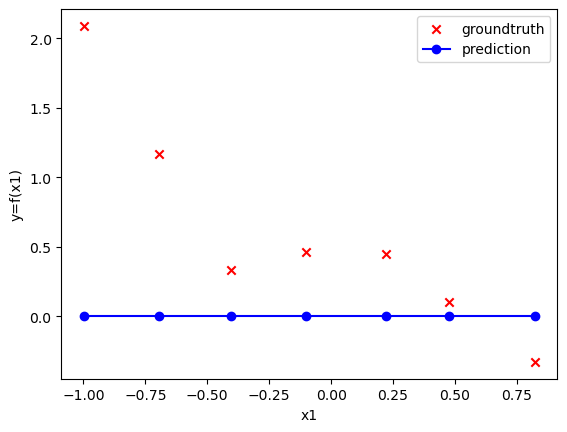

Minimum cost: 0.9081819398062569
Testing model with LR 1e-14 and weight decay: 1e-07
tensor([[2.4482e-12],
        [1.3580e-12],
        [8.8885e-13],
        [6.5965e-13],
        [5.2203e-13],
        [4.3934e-13],
        [2.8204e-13]])


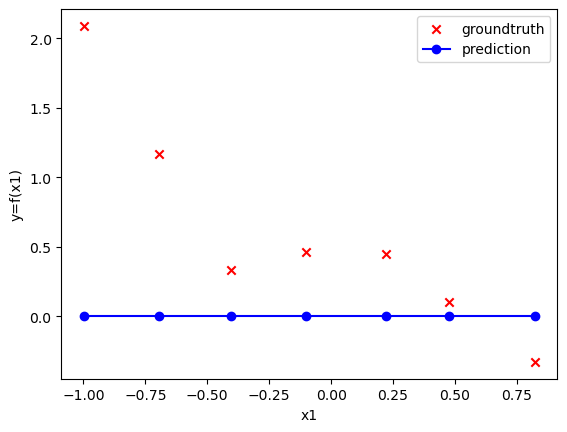

Minimum cost: 0.9081819398062569
Testing model with LR 1e-14 and weight decay: 1e-08
tensor([[2.4482e-12],
        [1.3580e-12],
        [8.8885e-13],
        [6.5965e-13],
        [5.2203e-13],
        [4.3934e-13],
        [2.8204e-13]])


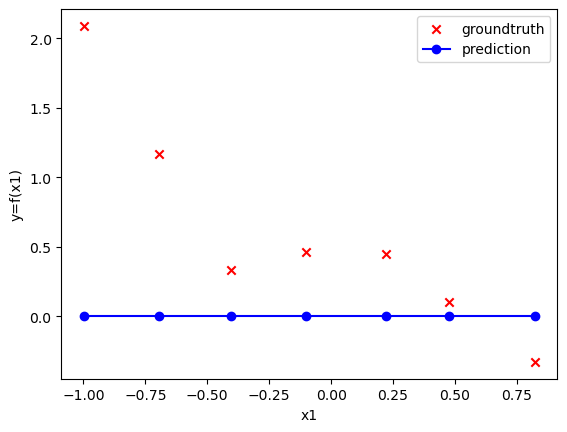

Minimum cost: 0.9081819398062569
Testing model with LR 1e-14 and weight decay: 1e-09
tensor([[2.4482e-12],
        [1.3580e-12],
        [8.8885e-13],
        [6.5965e-13],
        [5.2203e-13],
        [4.3934e-13],
        [2.8204e-13]])


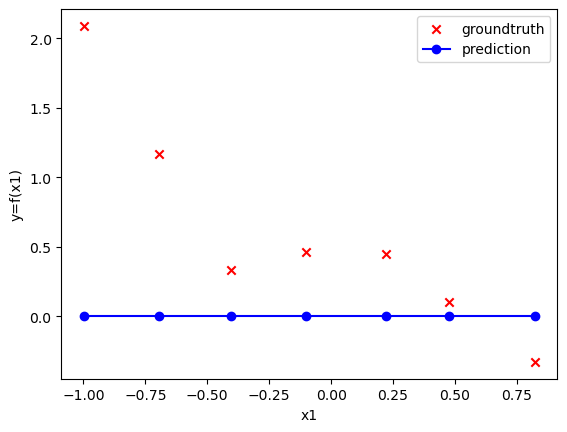

Minimum cost: 0.9081819398062569
Testing model with LR 1e-14 and weight decay: 1e-10
tensor([[2.4482e-12],
        [1.3580e-12],
        [8.8885e-13],
        [6.5965e-13],
        [5.2203e-13],
        [4.3934e-13],
        [2.8204e-13]])


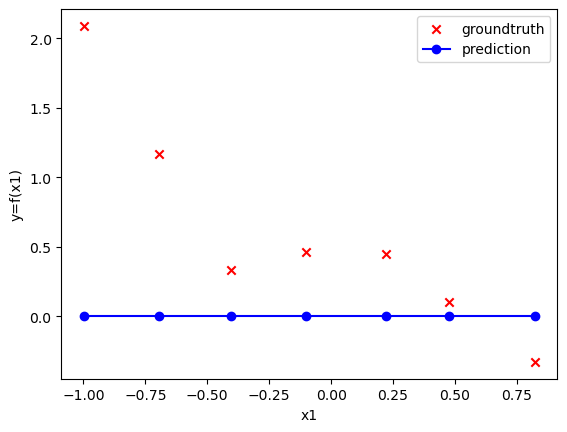

Minimum cost: 0.9081819398062569
Testing model with LR 1e-14 and weight decay: 1e-11
tensor([[2.4482e-12],
        [1.3580e-12],
        [8.8885e-13],
        [6.5965e-13],
        [5.2203e-13],
        [4.3934e-13],
        [2.8204e-13]])


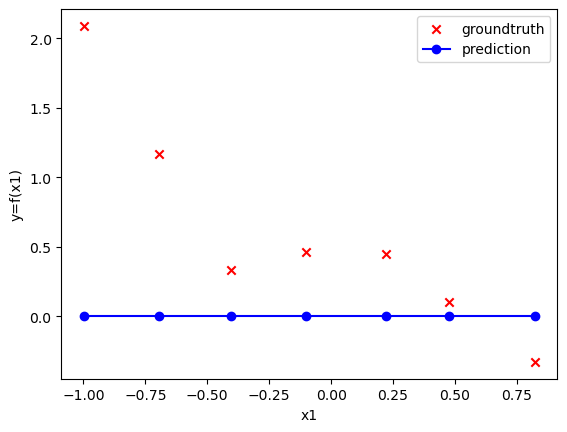

Minimum cost: 0.9081819398062569
Testing model with LR 1e-14 and weight decay: 1e-12
tensor([[2.4482e-12],
        [1.3580e-12],
        [8.8885e-13],
        [6.5965e-13],
        [5.2203e-13],
        [4.3934e-13],
        [2.8204e-13]])


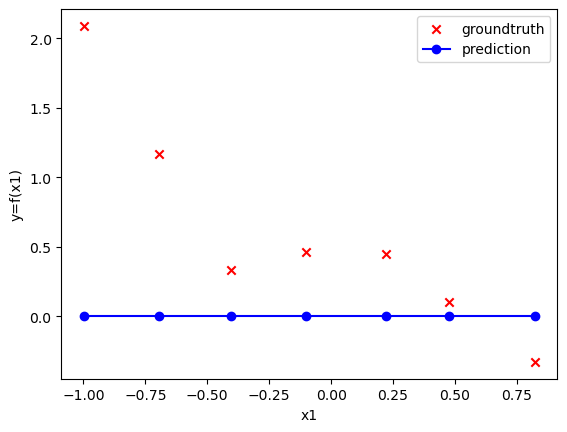

Minimum cost: 0.9081819398062569
Testing model with LR 1e-14 and weight decay: 1e-13
tensor([[2.4482e-12],
        [1.3580e-12],
        [8.8885e-13],
        [6.5965e-13],
        [5.2203e-13],
        [4.3934e-13],
        [2.8204e-13]])


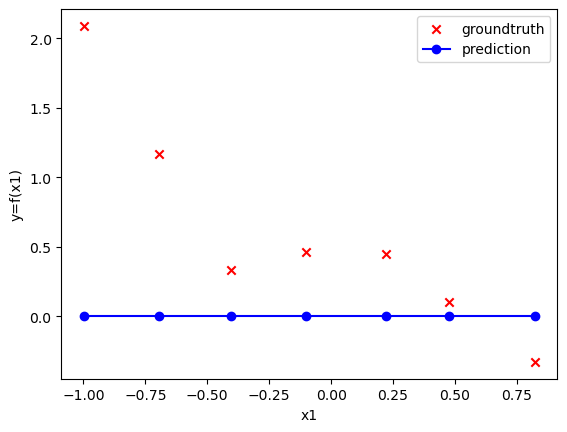

Minimum cost: 0.9081819398062569
Testing model with LR 1e-14 and weight decay: 1e-14
tensor([[2.4482e-12],
        [1.3580e-12],
        [8.8885e-13],
        [6.5965e-13],
        [5.2203e-13],
        [4.3934e-13],
        [2.8204e-13]])


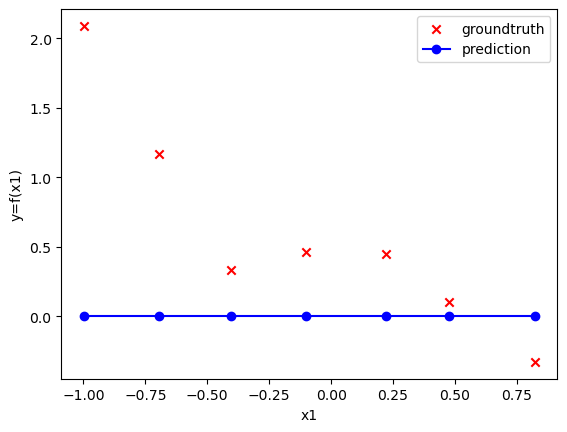

Best pair found, lr: 1, weight-decay : 1e-08


In [206]:
# Question 8 


def non_linear_test(learning_rate=1, lam=weight_decay):
    cost_lst = list()
    model = LinearRegression(x3.shape[1])
    alpha = learning_rate # select an appropriate alpha
    lam = weight_decay # select an appropriate lambda
    # print(x3.shape, "x3 shape")
    for it in range(100):
        prediction = model(x3)
        cost = mean_squared_error(y, prediction, lam, model.weight)
        if not cost:
            print(cost, "cost is none")
        cost_lst.append(cost)
        gradient_descent_step(model, x3, y, prediction, alpha, lam)
    #display.clear_output(wait=True)
    #plt.plot(list(range(it+1)), cost_lst)
    #plt.show()
    # print(model.weight)
    print('Minimum cost: {}'.format(min(cost_lst)))
    
    print(f"Testing model with LR {learning_rate} and weight decay: {weight_decay}") 
    plt.scatter(x[:], y, c='red', marker='x', label='groundtruth')
    outputs = model(x3)
    print(outputs)
    plt.plot(x[:], outputs, c='blue', marker='o', label='prediction')
    plt.xlabel('x1')
    plt.ylabel('y=f(x1)')
    plt.legend()
    plt.show()
    return min(cost_lst)


    
    

print("Testing Linear Test")
best_error = torch.inf
best_pair = None

for i in range(0, 15):   # learning rate range.
    lr = 10**-i
    for j in range(0,15):
        weight_decay = 10**-j
        cost = non_linear_test(lr, weight_decay)
        if cost < best_error:
            best_error = cost
            best_pair = (lr, weight_decay)

print(f"Best pair found, lr: {best_pair[0]}, weight-decay : {best_pair[1]}")
